In [2]:
import numpy as np
from numpy import array
from numpy import hstack
from numpy import vstack

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline

# Load raw pitch data with pybaseball
import pybaseball
from pybaseball import statcast, statcast_pitcher
pybaseball.cache.enable()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Data

In [3]:
df23a = statcast(start_dt='2023-03-30', end_dt='2023-11-01', team='LAA')
df22a = statcast(start_dt='2022-04-07', end_dt='2022-11-05', team='LAA')
#df21a = statcast(start_dt='2021-04-01', end_dt='2021-11-02', team='LAA')

This is a large query, it may take a moment to complete


  1%|▋                                                                                | 2/217 [01:17<1:55:15, 32.17s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version

 18%|██████████████▋                                                                   | 39/217 [02:40<01:25,  2.08it/s]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 19%|███████████████▍                                                                  | 41/217 [02:49<04:32,  1.55s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 20%|████████████████▏                              

 28%|███████████████████████                                                           | 61/217 [04:08<05:46,  2.22s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 29%|███████████████████████▍                                                          | 62/217 [04:36<21:45,  8.42s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 29%|███████████████████████▊                       

 38%|██████████████████████████████▉                                                   | 82/217 [05:55<15:53,  7.06s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 38%|███████████████████████████████▎                                                  | 83/217 [05:59<14:09,  6.34s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 39%|████████████████████████████████               

 49%|███████████████████████████████████████▉                                         | 107/217 [07:56<11:46,  6.42s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|████████████████████████████████████████▋                                        | 109/217 [07:59<06:58,  3.87s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/home/hdlmf/.local/lib/python3.10/site-packages/pyba

 59%|███████████████████████████████████████████████▊                                 | 128/217 [09:15<06:45,  4.56s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 59%|████████████████████████████████████████████████▏                                | 129/217 [09:16<05:23,  3.68s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 60%|███████████████████████████████████████████████

 70%|████████████████████████████████████████████████████████▎                        | 151/217 [10:36<02:29,  2.26s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 71%|█████████████████████████████████████████████████████████                        | 153/217 [10:36<01:27,  1.36s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 71%|███████████████████████████████████████████████

 80%|████████████████████████████████████████████████████████████████▌                | 173/217 [11:55<01:01,  1.40s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 80%|████████████████████████████████████████████████████████████████▉                | 174/217 [11:55<00:45,  1.07s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 81%|███████████████████████████████████████████████

This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████████████████████████████████████████████| 213/213 [13:43<00:00,  3.87s/it]
/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


In [4]:
#dfa = pd.concat([df23a, df22a, df21a], axis=0).convert_dtypes(convert_string=False)
dfa = pd.concat([df23a, df22a], axis=0).convert_dtypes(convert_string=False)
len(dfa)

48263

In [5]:
df23c = statcast(start_dt='2023-03-30', end_dt='2023-11-01', team='CHC')
df22c = statcast(start_dt='2022-04-07', end_dt='2022-11-05', team='CHC')
#df21c = statcast(start_dt='2021-04-01', end_dt='2021-11-02', team='CHC')

This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████████████████████████████████████████████| 217/217 [14:00<00:00,  3.88s/it]
/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████████████████████████████████████████████| 213/213 [13:44<00:00,  3.87s/it]
/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


In [6]:
# dfc = pd.concat([df23c, df22c, df21c], axis=0).convert_dtypes(convert_string=False)
dfc = pd.concat([df23c, df22c], axis=0).convert_dtypes(convert_string=False)
len(dfc)

47638

In [7]:
df23d = statcast(start_dt='2023-03-30', end_dt='2023-11-01', team='LAD')
df22d = statcast(start_dt='2022-04-07', end_dt='2022-11-05', team='LAD')
#df21d = statcast(start_dt='2021-04-01', end_dt='2021-11-02', team='LAD')

This is a large query, it may take a moment to complete


  0%|▎                                                                                | 1/217 [01:16<4:36:59, 76.94s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  1%|▋                                                                                | 2/217 [01:17<1:55:20, 32.19s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  2%|█▌                                             

 19%|███████████████▍                                                                  | 41/217 [02:40<01:15,  2.34it/s]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 20%|████████████████▏                                                                 | 43/217 [03:18<25:31,  8.80s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 20%|████████████████▋                              

 28%|███████████████████████                                                           | 61/217 [04:00<01:44,  1.49it/s]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 29%|███████████████████████▍                                                          | 62/217 [04:14<11:37,  4.50s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 29%|████████████████████████▏                      

 49%|███████████████████████████████████████▉                                         | 107/217 [07:52<14:30,  7.91s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|████████████████████████████████████████▋                                        | 109/217 [07:53<08:06,  4.50s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 51%|█████████████████████████████████████████▍     

 59%|████████████████████████████████████████████████▏                                | 129/217 [09:13<06:29,  4.43s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 60%|████████████████████████████████████████████████▉                                | 131/217 [09:14<03:34,  2.49s/it]/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/home/hdlmf/.local/lib/python3.10/site-packages/pyba

This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████████████████████████████████████████████| 213/213 [14:01<00:00,  3.95s/it]
/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


In [8]:
#dfd = pd.concat([df23d, df22d, df21d], axis=0).convert_dtypes(convert_string=False)
dfd = pd.concat([df23d, df22d], axis=0).convert_dtypes(convert_string=False)
len(dfd)

46876

In [9]:
df23p = statcast(start_dt='2023-03-30', end_dt='2023-11-01', team='SD')
df22p = statcast(start_dt='2022-04-07', end_dt='2022-11-05', team='SD')
#df21p = statcast(start_dt='2021-04-01', end_dt='2021-11-02', team='SD')

This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████████████████████████████████████████████| 217/217 [14:18<00:00,  3.96s/it]
/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████████████████████████████████████████████| 213/213 [14:05<00:00,  3.97s/it]
/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


In [10]:
# dfp = pd.concat([df23p, df22p, df21p], axis=0).convert_dtypes(convert_string=False)
dfp = pd.concat([df23p, df22p], axis=0).convert_dtypes(convert_string=False)
len(dfp)

49735

# REMOVING REDUNDANT DATA

## Angels

### A - C

In [11]:
import pandas as pd

# Assuming `dfa` and `dfc` are your DataFrames

# Step 1: Get the unique 'game_pk' values from both DataFrames
unique_dfa = set(dfa['game_pk'].unique())
unique_dfc = set(dfc['game_pk'].unique())

# Step 2: Find the intersection (common elements) of the two sets
common_games1 = unique_dfa.intersection(unique_dfc)

print("Common game IDs between Angels and Cubs:")
print(common_games1)
print(f"Number of common games: {len(common_games1)}")

# Step 3: Remove these games from `dfa`
dfa_filtereda1 = dfa[~dfa['game_pk'].isin(common_games1)]

# Step 4: Reset index if needed (optional)
dfa_filtereda1.reset_index(drop=True, inplace=True)

# Step 5: Print the number of records before and after filtering
print(f"Original number of rows in dfa: {len(dfa)}")
print(f"Number of rows after filtering: {len(dfa_filtereda1)}")

Common game IDs between Angels and Cubs:
{717861, 717838, 717855}
Number of common games: 3
Original number of rows in dfa: 48263
Number of rows after filtering: 47828


### A - D

In [12]:
import pandas as pd

# Assuming `dfa` and `dfc` are your DataFrames

# Step 1: Get the unique 'game_pk' values from both DataFrames
unique_dfd = set(dfd['game_pk'].unique())
unique_dfa = set(dfa_filtereda1['game_pk'].unique())

# Step 2: Find the intersection (common elements) of the two sets
common_games2 = unique_dfa.intersection(unique_dfd)

print("Common game IDs between Angels and Cubs:")
print(common_games2)
print(f"Number of common games: {len(common_games2)}")

# Step 3: Remove these games from `dfa`
dfa_filtereda2 = dfa_filtereda1[~dfa_filtereda1['game_pk'].isin(common_games2)]

# Step 4: Reset index if needed (optional)
dfa_filtereda2.reset_index(drop=True, inplace=True)

# Step 5: Print the number of records before and after filtering
print(f"Original number of rows in dfa: {len(dfa_filtereda1)}")
print(f"Number of rows after filtering: {len(dfa_filtereda2)}")

Common game IDs between Angels and Cubs:
{662694, 717678, 717456, 662611, 663415, 663385, 717437, 717662}
Number of common games: 8
Original number of rows in dfa: 47828
Number of rows after filtering: 46639


### A - P

In [13]:
import pandas as pd

# Assuming `dfa` and `dfc` are your DataFrames

# Step 1: Get the unique 'game_pk' values from both DataFrames
unique_dfp = set(dfp['game_pk'].unique())
unique_dfa = set(dfa_filtereda2['game_pk'].unique())

# Step 2: Find the intersection (common elements) of the two sets
common_games3 = unique_dfa.intersection(unique_dfp)

print("Common game IDs between Angels and Cubs:")
print(common_games3)
print(f"Number of common games: {len(common_games3)}")

# Step 3: Remove these games from `dfa`
dfa_filtereda3 = dfa_filtereda2[~dfa_filtereda2['game_pk'].isin(common_games3)]

# Step 4: Reset index if needed (optional)
dfa_filtereda3.reset_index(drop=True, inplace=True)

# Step 5: Print the number of records before and after filtering
print(f"Original number of rows in dfa: {len(dfa_filtereda2)}")
print(f"Number of rows after filtering: {len(dfa_filtereda3)}")

Common game IDs between Angels and Cubs:
{717497, 717505, 717478}
Number of common games: 3
Original number of rows in dfa: 46639
Number of rows after filtering: 46164


## Cubs

### C - D

In [14]:
import pandas as pd

# Assuming `dfa` and `dfc` are your DataFrames

# Step 1: Get the unique 'game_pk' values from both DataFrames
unique_dfd = set(dfd['game_pk'].unique())
unique_dfc = set(dfc['game_pk'].unique())

# Step 2: Find the intersection (common elements) of the two sets
common_games4 = unique_dfd.intersection(unique_dfc)

print("Common game IDs between Dodgers and Cubs:")
print(common_games4)
print(f"Number of common games: {len(common_games4)}")

# Step 3: Remove these games from `dfa`
dfc_filteredc1 = dfc[~dfc['game_pk'].isin(common_games4)]

# Step 4: Reset index if needed (optional)
dfc_filteredc1.reset_index(drop=True, inplace=True)

# Step 5: Print the number of records before and after filtering
print(f"Original number of rows in dfa: {len(dfc)}")
print(f"Number of rows after filtering: {len(dfc_filteredc1)}")

Common game IDs between Dodgers and Cubs:
{718499, 718564, 663142, 662729, 662730, 718479, 718575, 662610, 718451, 718547, 663161, 663162, 662683, 718491}
Number of common games: 14
Original number of rows in dfa: 47638
Number of rows after filtering: 45483


### C - P

In [15]:
import pandas as pd

# Assuming `dfa` and `dfc` are your DataFrames

# Step 1: Get the unique 'game_pk' values from both DataFrames
unique_dfp = set(dfp['game_pk'].unique())
unique_dfc = set(dfc_filteredc1['game_pk'].unique())

# Step 2: Find the intersection (common elements) of the two sets
common_games5 = unique_dfp.intersection(unique_dfc)

print("Common game IDs between Dodgers and Cubs:")
print(common_games5)
print(f"Number of common games: {len(common_games5)}")

# Step 3: Remove these games from `dfa`
dfc_filteredc2 = dfc_filteredc1[~dfc_filteredc1['game_pk'].isin(common_games5)]

# Step 4: Reset index if needed (optional)
dfc_filteredc2.reset_index(drop=True, inplace=True)

# Step 5: Print the number of records before and after filtering
print(f"Original number of rows in dfa: {len(dfc_filteredc1)}")
print(f"Number of rows after filtering: {len(dfc_filteredc2)}")

Common game IDs between Dodgers and Cubs:
{662273, 717889, 717921, 718406, 718407, 663182, 717903, 663183, 662258, 662259, 663155, 663125, 717880, 718426}
Number of common games: 14
Original number of rows in dfa: 45483
Number of rows after filtering: 43442


## Dodgers

### D - P

In [16]:
import pandas as pd

# Assuming `dfa` and `dfc` are your DataFrames

# Step 1: Get the unique 'game_pk' values from both DataFrames
unique_dfd = set(dfd['game_pk'].unique())
unique_dfp = set(dfp['game_pk'].unique())

# Step 2: Find the intersection (common elements) of the two sets
common_games6 = unique_dfd.intersection(unique_dfp)

print("Common game IDs between Angels and Cubs:")
print(common_games6)
print(f"Number of common games: {len(common_games6)}")

# Step 3: Remove these games from `dfa`
dfd_filtered1 = dfd[~dfd['game_pk'].isin(common_games6)]

# Step 4: Reset index if needed (optional)
dfd_filtered1.reset_index(drop=True, inplace=True)

# Step 5: Print the number of records before and after filtering
print(f"Original number of rows in dfa: {len(dfd)}")
print(f"Number of rows after filtering: {len(dfd_filtered1)}")

Common game IDs between Angels and Cubs:
{662274, 662276, 662684, 662563, 662564, 717093, 717094, 716589, 717112, 718266, 662718, 716608, 662209, 662210, 662597, 662214, 662599, 718279, 717129, 662603, 662733, 716622, 662609, 662230, 718295, 661848, 661849, 661850, 718168, 715745, 715746, 715747, 715748, 718185, 718201, 662654}
Number of common games: 36
Original number of rows in dfa: 46876
Number of rows after filtering: 41741


# CONCAT PROCESS

In [17]:
df = pd.concat([dfd_filtered1, dfc_filteredc2, dfa_filtereda3, dfp], axis=0).convert_dtypes(convert_string=False)
#df = pd.concat([dfc_filtered, dfa_filtered, dfp], axis=0).convert_dtypes(convert_string=False)
#df = pd.concat([dfd_filtered, dfc_filtered, dfp], axis=0).convert_dtypes(convert_string=False)
len(df)

181082

# Data Understanding (use DF)

## How many Pitchers, Pitch Types, Zone, Events

### Pitchers, sorted by Number of Games and Pitches Thrown

In [18]:
import pandas as pd

# Assuming your DataFrame is named df
unique_pitcher_ids = df['pitcher'].nunique()
null_pitcher = df['pitcher'].isnull().sum()

print("Null Picthers? = ", null_pitcher,"\n=======")
unique_pitcher_ids

Null Picthers? =  0 


201

In [19]:
# Group by pitcher to get the number of games and pitches
pitcher_stats = df.groupby('pitcher').apply(lambda x: pd.Series({
    'number_of_games': x['game_pk'].nunique(),
    'number_of_pitches': x['pitch_number'].count()
})).reset_index()

# Sort by number of games
sorted_by_games = pitcher_stats.sort_values(by='number_of_games', ascending=False)

# Sort by number of pitches
sorted_by_pitches = pitcher_stats.sort_values(by='number_of_pitches', ascending=False)

# Display the stats for each pitcher sorted by number of games
print("Sorted by Number of Games:")
for _, row in sorted_by_games.iterrows():
    print(f"Pitcher_id: {row['pitcher']} [Number of games played in: {row['number_of_games']}] [Total number of pitches: {row['number_of_pitches']}]")

print("\n\n\n\n\nSorted by Number of Pitches:")
# Display the stats for each pitcher sorted by number of pitches
for _, row in sorted_by_pitches.iterrows():
    print(f"Pitcher_id: {row['pitcher']} [Number of games played in: {row['number_of_games']}] [Total number of pitches: {row['number_of_pitches']}]")


Sorted by Number of Games:
Pitcher_id: 472610 [Number of games played in: 129] [Total number of pitches: 2044]
Pitcher_id: 607259 [Number of games played in: 117] [Total number of pitches: 3620]
Pitcher_id: 571901 [Number of games played in: 114] [Total number of pitches: 1736]
Pitcher_id: 623465 [Number of games played in: 113] [Total number of pitches: 1664]
Pitcher_id: 681911 [Number of games played in: 109] [Total number of pitches: 1647]
Pitcher_id: 660813 [Number of games played in: 108] [Total number of pitches: 1521]
Pitcher_id: 621051 [Number of games played in: 106] [Total number of pitches: 1886]
Pitcher_id: 657612 [Number of games played in: 106] [Total number of pitches: 1493]
Pitcher_id: 657571 [Number of games played in: 96] [Total number of pitches: 1506]
Pitcher_id: 643410 [Number of games played in: 96] [Total number of pitches: 1937]
Pitcher_id: 641360 [Number of games played in: 88] [Total number of pitches: 1631]
Pitcher_id: 623352 [Number of games played in: 85] [

/tmp/ipykernel_206006/66691355.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pitcher_stats = df.groupby('pitcher').apply(lambda x: pd.Series({


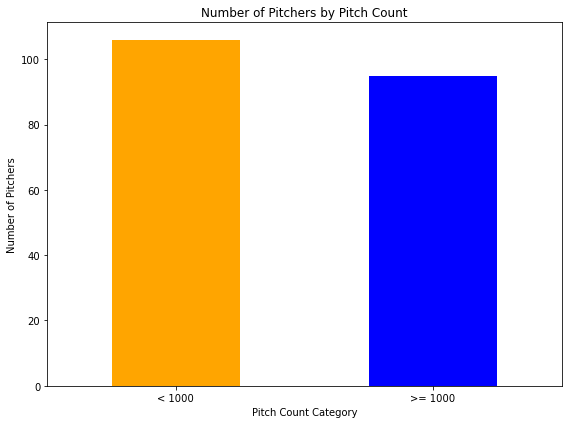

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by pitcher to get the number of pitches
pitcher_stats = df.groupby('pitcher')['pitch_number'].count().reset_index()
pitcher_stats.columns = ['pitcher', 'number_of_pitches']

# Categorize pitchers based on the number of pitches
pitcher_stats['category'] = pitcher_stats['number_of_pitches'].apply(lambda x: '< 1000' if x < 500 else '>= 1000')

# Count the number of pitchers in each category
pitcher_category_counts = pitcher_stats['category'].value_counts()

# Plotting the results
plt.figure(figsize=(8, 6))
pitcher_category_counts.plot(kind='bar', color=['orange', 'blue'])
plt.title('Number of Pitchers by Pitch Count')
plt.xlabel('Pitch Count Category')
plt.ylabel('Number of Pitchers')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


## Pitch Types

In [21]:
pitch_counts = df['pitch_type'].value_counts()
null_pitch_counts = df['pitch_type'].isnull().sum()
print(null_pitch_counts,"\n=======")
print(pitch_counts)
pitch_counts.index

294 
pitch_type
FF    61276
SL    27077
SI    24458
CH    19269
FC    14170
CU    13221
ST    11023
KC     3672
FS     3625
SV     2317
FA      257
KN      187
EP      145
SC       64
PO       23
CS        4
Name: count, dtype: int64


Index(['FF', 'SL', 'SI', 'CH', 'FC', 'CU', 'ST', 'KC', 'FS', 'SV', 'FA', 'KN',
       'EP', 'SC', 'PO', 'CS'],
      dtype='object', name='pitch_type')

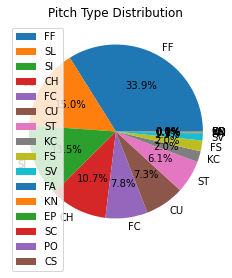

In [22]:
# Create a pie chart
plt.pie(pitch_counts, labels=pitch_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Pitch Type Distribution')

# Add legends
plt.legend(pitch_counts.index)

# Display the chart
plt.show()

## Events

In [23]:
events_counts = df['events'].value_counts()
null_events = df['events'].isnull().sum()
print("Null Events? = ", null_events,"\n=======")

# Get the total number of unique event types
total_unique_events = df['events'].nunique()

# Get all unique values of the 'events' feature
unique_events = df['events'].unique()

# Get the number of occurrences of each unique value in 'events'
event_occurrences = df['events'].value_counts()

# Print the results
print(f"Total unique event types: {total_unique_events}\n")
print("Unique event values:")
print(unique_events)
print("\nNumber of occurrences of each event type:")
print(event_occurrences)

Null Events? =  134802 
Total unique event types: 27

Unique event values:
['field_out' None 'single' 'field_error' 'strikeout'
 'grounded_into_double_play' 'walk' 'home_run' 'sac_bunt' 'hit_by_pitch'
 'caught_stealing_2b' 'sac_fly' 'double' 'force_out' 'fielders_choice'
 'triple' 'fielders_choice_out' 'wild_pitch' 'catcher_interf'
 'double_play' nan 'sac_fly_double_play' 'other_out'
 'pickoff_caught_stealing_home' 'caught_stealing_home'
 'strikeout_double_play' 'caught_stealing_3b' 'pickoff_2b' 'pickoff_1b']

Number of occurrences of each event type:
events
field_out                       18521
strikeout                       10814
single                           6304
walk                             3758
double                           1926
home_run                         1400
force_out                         921
grounded_into_double_play         864
hit_by_pitch                      579
field_error                       288
sac_fly                           282
triple           

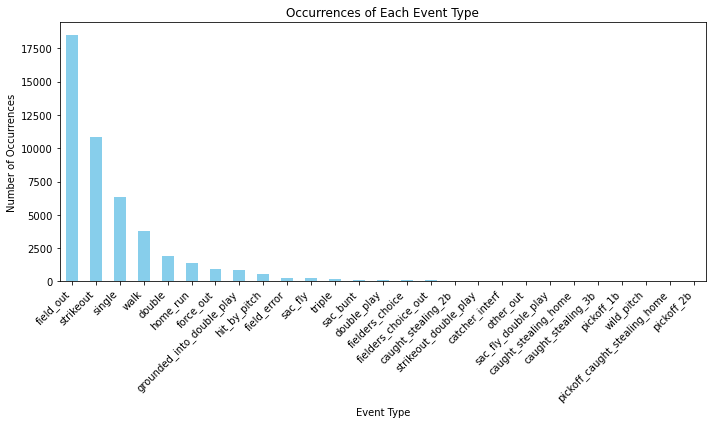

In [24]:
import matplotlib.pyplot as plt

# Assuming `event_occurrences` is calculated as follows:
event_occurrences = df['events'].value_counts()

# Plotting the event occurrences as a bar chart
plt.figure(figsize=(10, 6))
event_occurrences.plot(kind='bar', color='skyblue')
plt.title('Occurrences of Each Event Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


# Data Pre-Processing (use DF_rsorted)

# Filter some unused features

In [25]:
# Calculate the total number of rows
total_rows = df.shape[0]

# Create a DataFrame to store columns with null values and their counts
null_features = df.isnull().sum()
null_features = null_features[null_features > 0]

# Create a DataFrame with null counts and proportion
null_features_df = pd.DataFrame({
    'Feature': null_features.index,
    'Null Count': null_features.values,
    'Proportion of Nulls': null_features.values / total_rows
})

# Display the DataFrame
null_features_df.reset_index(drop=True, inplace=True)
null_features_df

,Feature,Null Count,Proportion of Nulls
0,pitch_type,294,0.001624
1,release_speed,308,0.001701
2,release_pos_x,308,0.001701
3,release_pos_z,308,0.001701
4,events,134802,0.744425
5,spin_dir,181082,1.000000
6,spin_rate_deprecated,181082,1.000000
7,break_angle_deprecated,181082,1.000000
8,break_length_deprecated,181082,1.000000
9,zone,308,0.001701


In [26]:
# Remove columns that include 'fielder' and 'deprecated'
filtered_df = df.loc[:, ~df.columns.str.contains('fielder|deprecated|spin_dir|umpire|sv_id|bat_speed|swing_length', case=False)]

In [27]:
# Create unique ID for every plate appearance in every game
filtered_df['pa_id'] = filtered_df['game_pk'].astype(str)+"-"+filtered_df['at_bat_number'].astype(str)
df_sorted = filtered_df[['pa_id', 'game_date', 'pitch_type', 'pitch_name', 'release_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'release_spin_rate', 'spin_axis', 'batter', 'stand', 'p_throws', 'pitcher', 'events', 'type', 'balls', 'strikes', 'outs_when_up', 'zone', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'inning', 'inning_topbot', 'at_bat_number', 'pitch_number', 'fld_score', 'bat_score']]
df_sorted.tail()

/tmp/ipykernel_206006/4142747083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pa_id'] = filtered_df['game_pk'].astype(str)+"-"+filtered_df['at_bat_number'].astype(str)


,pa_id,game_date,pitch_type,pitch_name,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,spin_axis,batter,stand,p_throws,pitcher,events,type,balls,strikes,outs_when_up,zone,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score
124,663418-5,2022-04-07,FF,4-Seam Fastball,96.4,-1.74,53.84,5.76,2466,207,606466,L,R,506433,None,B,0,1,1,11,-0.9,3.18,<NA>,<NA>,<NA>,1,Bot,5,2,0,0
128,663418-5,2022-04-07,FF,4-Seam Fastball,94.6,-1.91,53.76,5.69,2415,198,606466,L,R,506433,None,S,0,0,1,5,-0.06,2.87,<NA>,<NA>,<NA>,1,Bot,5,1,0,0
131,663418-4,2022-04-07,FF,4-Seam Fastball,93.5,-1.75,53.81,5.79,2321,207,662139,L,R,506433,field_out,X,1,1,0,2,-0.21,3.13,<NA>,<NA>,<NA>,1,Bot,4,3,0,0
135,663418-4,2022-04-07,SL,Slider,87.0,-1.68,54.02,5.81,2707,91,662139,L,R,506433,None,B,0,1,0,14,1.11,1.89,<NA>,<NA>,<NA>,1,Bot,4,2,0,0
141,663418-4,2022-04-07,FF,4-Seam Fastball,93.4,-1.69,53.89,5.84,2241,204,662139,L,R,506433,None,S,0,0,0,4,-0.54,2.3,<NA>,<NA>,<NA>,1,Bot,4,1,0,0


# Remove Pa-Id where zone = null

In [28]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181082 entries, 0 to 141
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pa_id              181082 non-null  object        
 1   game_date          181082 non-null  datetime64[ns]
 2   pitch_type         180788 non-null  object        
 3   pitch_name         180788 non-null  object        
 4   release_speed      180774 non-null  Float64       
 5   release_pos_x      180774 non-null  Float64       
 6   release_pos_y      180774 non-null  Float64       
 7   release_pos_z      180774 non-null  Float64       
 8   release_spin_rate  179511 non-null  Int64         
 9   spin_axis          179498 non-null  Int64         
 10  batter             181082 non-null  Int64         
 11  stand              181082 non-null  object        
 12  p_throws           181082 non-null  object        
 13  pitcher            181082 non-null  Int64         
 

In [29]:
# Identify all pa_id where pitch_type is null
pa_ids_to_remove_null = df_sorted[df_sorted['pitch_type'].isnull()]['pa_id'].unique()
npa_ids_to_remove_null = df_sorted[df_sorted['pitch_type'].isnull()]['pa_id'].nunique()
print(pa_ids_to_remove_null)
print(npa_ids_to_remove_null)

# Remove all records of those pa_id from df_sorted
df_sorted = df_sorted[~df_sorted['pa_id'].isin(pa_ids_to_remove_null)].copy()

# Reset index after removal
df_sorted.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
df_sorted.info()

['718624-4' '663023-78' '663023-77' '663023-76' '663023-70' '663023-69'
 '663023-68' '663023-63' '663023-62' '663023-61' '663023-60' '663023-59'
 '663023-58' '663023-54' '663023-53' '663023-52' '663023-47' '663023-46'
 '663023-45' '663023-44' '663023-38' '663023-37' '663023-36' '663023-30'
 '663023-29' '663023-28' '663023-27' '663023-26' '663023-20' '663023-19'
 '663023-18' '663023-17' '663023-16' '663023-12' '663023-11' '663023-10'
 '663023-9' '663023-8' '661284-65' '661284-58' '661284-57' '661284-56'
 '661284-51' '661284-32' '663165-54' '717265-65' '717265-64' '717265-60'
 '717265-59' '717265-58' '717265-54' '717265-53' '717265-52' '717265-47'
 '717265-46' '717265-45' '717265-44' '717265-43' '717265-34' '717265-33'
 '717265-32' '717265-31' '717265-30' '717265-24' '717265-23' '717265-22'
 '717265-18' '717265-17' '717265-16' '717265-15' '717265-14' '717265-10'
 '717265-9' '717265-8' '717265-7' '662985-56' '663067-7']
77
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180761 entries, 

In [30]:
# Identify all pa_id where pitch_type is null
pa_ids_to_remove_null = df_sorted[df_sorted['zone'].isnull()]['pa_id'].unique()
npa_ids_to_remove_null = df_sorted[df_sorted['zone'].isnull()]['pa_id'].nunique()
print(pa_ids_to_remove_null)
print(npa_ids_to_remove_null)

# Remove all records of those pa_id from df_sorted
df_sorted = df_sorted[~df_sorted['pa_id'].isin(pa_ids_to_remove_null)].copy()

# Reset index after removal
df_sorted.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
df_sorted.info()

['661284-79' '661284-73' '661284-67' '661284-64' '661284-63' '661284-49'
 '661284-35' '661284-26' '661284-25' '661284-24' '661284-22' '661284-21']
12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180712 entries, 0 to 180711
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pa_id              180712 non-null  object        
 1   game_date          180712 non-null  datetime64[ns]
 2   pitch_type         180712 non-null  object        
 3   pitch_name         180712 non-null  object        
 4   release_speed      180712 non-null  Float64       
 5   release_pos_x      180712 non-null  Float64       
 6   release_pos_y      180712 non-null  Float64       
 7   release_pos_z      180712 non-null  Float64       
 8   release_spin_rate  179440 non-null  Int64         
 9   spin_axis          179441 non-null  Int64         
 10  batter             180712 non-null  Int64         
 11  stand 

In [31]:
# Identify all pa_id where pitch_type is null
pa_ids_to_remove_null = df_sorted[df_sorted['release_spin_rate'].isnull()]['pa_id'].unique()
npa_ids_to_remove_null = df_sorted[df_sorted['release_spin_rate'].isnull()]['pa_id'].nunique()
print(npa_ids_to_remove_null)

# Remove all records of those pa_id from df_sorted
df_sorted = df_sorted[~df_sorted['pa_id'].isin(pa_ids_to_remove_null)].copy()

# Reset index after removal
df_sorted.reset_index(drop=True, inplace=True)

# Display the first few rows to verifyam
df_sorted.info()

590
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178135 entries, 0 to 178134
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pa_id              178135 non-null  object        
 1   game_date          178135 non-null  datetime64[ns]
 2   pitch_type         178135 non-null  object        
 3   pitch_name         178135 non-null  object        
 4   release_speed      178135 non-null  Float64       
 5   release_pos_x      178135 non-null  Float64       
 6   release_pos_y      178135 non-null  Float64       
 7   release_pos_z      178135 non-null  Float64       
 8   release_spin_rate  178135 non-null  Int64         
 9   spin_axis          178135 non-null  Int64         
 10  batter             178135 non-null  Int64         
 11  stand              178135 non-null  object        
 12  p_throws           178135 non-null  object        
 13  pitcher            178135 non-null  Int6

## Events

In [32]:
# Fill null values in the 'events' column with 'no events' using .loc[]
df_sorted.loc[:, 'events'] = df_sorted['events'].fillna('no events')

# Get the total number of unique event types
total_unique_events = df_sorted['events'].nunique()

# Get all unique values of the 'events' feature
unique_events = df_sorted['events'].unique()

# Get the number of occurrences of each unique value in 'events'
event_occurrences = df_sorted['events'].value_counts()

# Print the results
print(f"Total unique event types: {total_unique_events}\n")
print("Unique event values:")
print(unique_events)
print("\nNumber of occurrences of each event type:")
print(event_occurrences)

Total unique event types: 28

Unique event values:
['field_out' 'no events' 'single' 'field_error' 'strikeout'
 'grounded_into_double_play' 'walk' 'home_run' 'sac_bunt' 'hit_by_pitch'
 'caught_stealing_2b' 'sac_fly' 'double' 'force_out' 'fielders_choice'
 'triple' 'fielders_choice_out' 'wild_pitch' 'catcher_interf'
 'double_play' 'sac_fly_double_play' 'other_out'
 'pickoff_caught_stealing_home' 'caught_stealing_home'
 'strikeout_double_play' 'caught_stealing_3b' 'pickoff_2b' 'pickoff_1b']

Number of occurrences of each event type:
events
no events                       132534
field_out                        18276
strikeout                        10620
single                            6207
walk                              3694
double                            1906
home_run                          1391
force_out                          908
grounded_into_double_play          851
hit_by_pitch                       572
field_error                        282
sac_fly                    

In [33]:
# Fill NA in on_x and make player_id into 1 if on base.
df_sorted[['on_3b', 'on_2b', 'on_1b']] = df_sorted[['on_3b', 'on_2b', 'on_1b']].fillna(0)
df_sorted[['on_3b', 'on_2b', 'on_1b']] = np.where(df_sorted[['on_3b', 'on_2b', 'on_1b']] > 0, 1, df_sorted[['on_3b', 'on_2b', 'on_1b']])
df_sorted[['on_3b', 'on_2b', 'on_1b']] = df_sorted[['on_3b', 'on_2b', 'on_1b']].astype('int64')
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178135 entries, 0 to 178134
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pa_id              178135 non-null  object        
 1   game_date          178135 non-null  datetime64[ns]
 2   pitch_type         178135 non-null  object        
 3   pitch_name         178135 non-null  object        
 4   release_speed      178135 non-null  Float64       
 5   release_pos_x      178135 non-null  Float64       
 6   release_pos_y      178135 non-null  Float64       
 7   release_pos_z      178135 non-null  Float64       
 8   release_spin_rate  178135 non-null  Int64         
 9   spin_axis          178135 non-null  Int64         
 10  batter             178135 non-null  Int64         
 11  stand              178135 non-null  object        
 12  p_throws           178135 non-null  object        
 13  pitcher            178135 non-null  Int64   

# Pitch Types

0 
pitch_type
FF    60288
SL    26624
SI    24143
CH    19078
FC    13940
CU    13109
ST    10793
KC     3625
FS     3571
SV     2285
FA      257
KN      187
EP      145
SC       63
PO       23
CS        4
Name: count, dtype: int64


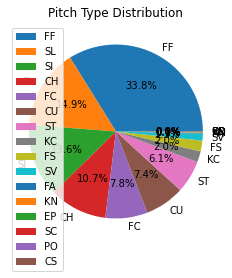

In [34]:
pitch_counts = df_sorted['pitch_type'].value_counts()
null_pitch_counts = df_sorted['pitch_type'].isnull().sum()
print(null_pitch_counts,"\n=======")

# Create a pie chart
plt.pie(pitch_counts, labels=pitch_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Pitch Type Distribution')

# Add legends
plt.legend(pitch_counts.index)

# Display the chart
print(pitch_counts)
plt.show()


In [35]:
# # Create dictionary to re-group pitch types
# pitch_dict3 = {'FF':0, # Fastballs
#               'FT':1, 'SI':1, # Sinkers
#               'FC':2, # Cutters
#               'CU':3,'KC':3,'CS':3, # Curveballs
#               'SL':4, 'ST':4, 'SV':4, #Sliders
#               'CH':5,'FS':6,'FO':6,'EP':7 ,'SC':5, # ChangeUps/Offspeeds
#               'KN':8, # Knuckleballs
#               'PO':10,'FA':9 #Pitchouts
#             }   

# # Create dictionary to re-group pitch types
# pitch_dict3 = {'FF':0, # Fastballs
#               'FT':1, 'SI':1, # Sinkers
#               'FC':2, # Cutters
#               'CU':3,'KC':3,'CS':3, # Curveballs
#               'SL':4, 'ST':4, 'SV':4, #Sliders
#               'CH':5,'FS':6,'FO':6,'EP':7 ,'SC':5, # ChangeUps/Offspeeds
#               'KN':6, # Knuckleballs
#               'PO':10,'FA':9 #Pitchouts
#             }   

# Create dictionary to re-group pitch types
pitch_dict3 = {'FF':0, # Fastballs
              'FT':1, 'SI':1, # Sinkers
              'FC':2, # Cutters
              'CU':3,'KC':3,'CS':3, # Curveballs
              'SL':4, 'ST':4, 'SV':4, #Sliders
              'CH':5,'FS':6,'FO':6,'EP':6 ,'SC':5, # ChangeUps/Offspeeds
              'KN':6, # Knuckleballs
              'PO':10,'FA':9 #Pitchouts
            }   

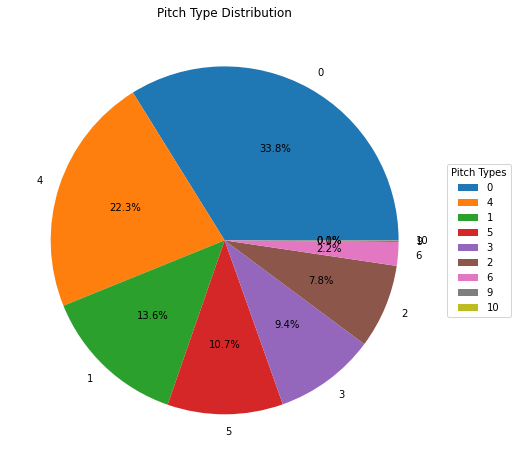

In [36]:
import matplotlib.pyplot as plt

# Map old pitch types to new mapping
df_sorted['pitch_type_map'] = df_sorted['pitch_type'].map(pitch_dict3)

# Count the pitch types
pitch_counts2 = df_sorted['pitch_type_map'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: set figure size
patches, texts, autotexts = plt.pie(pitch_counts2, labels=pitch_counts2.index, autopct='%1.1f%%')

# Add a title
plt.title('Pitch Type Distribution')

# Create a legend
plt.legend(patches, pitch_counts2.index, title="Pitch Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the chart
plt.show()



## min max avg release speed

In [128]:
# Filter the DataFrame where pitch_type is 0
filtered_df = df_sorted[df_sorted['pitch_type_map'] == 0]

# Sort the DataFrame by release_speed
sorted_df = filtered_df.sort_values(by='release_speed')

# Calculate the minimum, maximum, and average (mean) of release_speed
min_release_speed = filtered_df['release_speed'].min()
max_release_speed = filtered_df['release_speed'].max()
avg_release_speed = filtered_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed: {min_release_speed:.2f}")
print(f"Maximum release speed: {max_release_speed:.2f}")
print(f"Average release speed: {avg_release_speed:.2f}")

# Calculate the index that represents the lowest 20%
cutoff_index = int(len(sorted_df) * 0.2)

# Select the lowest 20% of the release_speed values
lowest_20_percent_df = sorted_df.iloc[:cutoff_index]

# Calculate the minimum, maximum, and average (mean) of release_speed for the lowest 20%
min_release_speed = lowest_20_percent_df['release_speed'].min()
max_release_speed = lowest_20_percent_df['release_speed'].max()
avg_release_speed = lowest_20_percent_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed (lowest 20%): {min_release_speed:.2f}")
print(f"Maximum release speed (lowest 20%): {max_release_speed:.2f}")
print(f"Average release speed (lowest 20%): {avg_release_speed:.2f}")


# Select the 10 lowest release_speed values
lowest_10_df = sorted_df.head(10)

# Display the results
print("The 10 lowest release speeds where pitch_type: 0")
print(lowest_10_df[['release_speed', 'pa_id', 'game_date','pitch_name']])

KeyError: 'pitch_type_map'

In [ ]:
# Filter the DataFrame where pitch_type is 0
filtered_df = df_sorted[df_sorted['pitch_type_map'] == 1]

# Sort the DataFrame by release_speed
sorted_df = filtered_df.sort_values(by='release_speed')

# Calculate the minimum, maximum, and average (mean) of release_speed
min_release_speed = filtered_df['release_speed'].min()
max_release_speed = filtered_df['release_speed'].max()
avg_release_speed = filtered_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed: {min_release_speed:.2f}")
print(f"Maximum release speed: {max_release_speed:.2f}")
print(f"Average release speed: {avg_release_speed:.2f}")

# Calculate the index that represents the lowest 20%
cutoff_index = int(len(sorted_df) * 0.2)

# Select the lowest 20% of the release_speed values
lowest_20_percent_df = sorted_df.iloc[:cutoff_index]

# Calculate the minimum, maximum, and average (mean) of release_speed for the lowest 20%
min_release_speed = lowest_20_percent_df['release_speed'].min()
max_release_speed = lowest_20_percent_df['release_speed'].max()
avg_release_speed = lowest_20_percent_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed (lowest 20%): {min_release_speed:.2f}")
print(f"Maximum release speed (lowest 20%): {max_release_speed:.2f}")
print(f"Average release speed (lowest 20%): {avg_release_speed:.2f}")

# Select the 10 lowest release_speed values
lowest_10_df = sorted_df.head(10)

# Display the results
print("The 10 lowest release speeds where pitch_type: 1")
print(lowest_10_df[['release_speed', 'pa_id', 'game_date','pitch_name']])

In [ ]:
# Filter the DataFrame where pitch_type is 0
filtered_df = df_sorted[df_sorted['pitch_type_map'] == 2]

# Sort the DataFrame by release_speed
sorted_df = filtered_df.sort_values(by='release_speed')

# Calculate the minimum, maximum, and average (mean) of release_speed
min_release_speed = filtered_df['release_speed'].min()
max_release_speed = filtered_df['release_speed'].max()
avg_release_speed = filtered_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed: {min_release_speed:.2f}")
print(f"Maximum release speed: {max_release_speed:.2f}")
print(f"Average release speed: {avg_release_speed:.2f}")

# Calculate the index that represents the lowest 20%
cutoff_index = int(len(sorted_df) * 0.2)

# Select the lowest 20% of the release_speed values
lowest_20_percent_df = sorted_df.iloc[:cutoff_index]

# Calculate the minimum, maximum, and average (mean) of release_speed for the lowest 20%
min_release_speed = lowest_20_percent_df['release_speed'].min()
max_release_speed = lowest_20_percent_df['release_speed'].max()
avg_release_speed = lowest_20_percent_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed (lowest 20%): {min_release_speed:.2f}")
print(f"Maximum release speed (lowest 20%): {max_release_speed:.2f}")
print(f"Average release speed (lowest 20%): {avg_release_speed:.2f}")

# Select the 10 lowest release_speed values
lowest_10_df = sorted_df.head(10)

# Display the results
print("The 10 lowest release speeds where pitch_type: 2")
print(lowest_10_df[['release_speed', 'pa_id', 'game_date','pitch_name']])

In [ ]:
# Filter the DataFrame where pitch_type is 0
filtered_df = df_sorted[df_sorted['pitch_type_map'] == 3]

# Sort the DataFrame by release_speed
sorted_df = filtered_df.sort_values(by='release_speed')

# Calculate the minimum, maximum, and average (mean) of release_speed
min_release_speed = filtered_df['release_speed'].min()
max_release_speed = filtered_df['release_speed'].max()
avg_release_speed = filtered_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed: {min_release_speed:.2f}")
print(f"Maximum release speed: {max_release_speed:.2f}")
print(f"Average release speed: {avg_release_speed:.2f}")

# Calculate the index that represents the lowest 20%
cutoff_index = int(len(sorted_df) * 0.2)

# Select the lowest 20% of the release_speed values
lowest_20_percent_df = sorted_df.iloc[:cutoff_index]

# Calculate the minimum, maximum, and average (mean) of release_speed for the lowest 20%
min_release_speed = lowest_20_percent_df['release_speed'].min()
max_release_speed = lowest_20_percent_df['release_speed'].max()
avg_release_speed = lowest_20_percent_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed (lowest 20%): {min_release_speed:.2f}")
print(f"Maximum release speed (lowest 20%): {max_release_speed:.2f}")
print(f"Average release speed (lowest 20%): {avg_release_speed:.2f}")

# Select the 10 lowest release_speed values
lowest_10_df = sorted_df.head(10)

# Display the results
print("The 10 lowest release speeds where pitch_type: 3")
print(lowest_10_df[['release_speed', 'pa_id', 'game_date','pitch_name']])

In [ ]:
# Filter the DataFrame where pitch_type is 0
filtered_df = df_sorted[df_sorted['pitch_type_map'] == 4]

# Sort the DataFrame by release_speed
sorted_df = filtered_df.sort_values(by='release_speed')

# Calculate the minimum, maximum, and average (mean) of release_speed
min_release_speed = filtered_df['release_speed'].min()
max_release_speed = filtered_df['release_speed'].max()
avg_release_speed = filtered_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed: {min_release_speed:.2f}")
print(f"Maximum release speed: {max_release_speed:.2f}")
print(f"Average release speed: {avg_release_speed:.2f}")

# Calculate the index that represents the lowest 20%
cutoff_index = int(len(sorted_df) * 0.2)

# Select the lowest 20% of the release_speed values
lowest_20_percent_df = sorted_df.iloc[:cutoff_index]

# Calculate the minimum, maximum, and average (mean) of release_speed for the lowest 20%
min_release_speed = lowest_20_percent_df['release_speed'].min()
max_release_speed = lowest_20_percent_df['release_speed'].max()
avg_release_speed = lowest_20_percent_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed (lowest 20%): {min_release_speed:.2f}")
print(f"Maximum release speed (lowest 20%): {max_release_speed:.2f}")
print(f"Average release speed (lowest 20%): {avg_release_speed:.2f}")

# Select the 10 lowest release_speed values
lowest_10_df = sorted_df.head(10)

# Display the results
print("The 10 lowest release speeds where pitch_type: 4
print(lowest_10_df[['release_speed', 'pa_id', 'game_date','pitch_name']])

In [ ]:
# Filter the DataFrame where pitch_type is 0
filtered_df = df_sorted[df_sorted['pitch_type_map'] == 5]

# Sort the DataFrame by release_speed
sorted_df = filtered_df.sort_values(by='release_speed')

# Calculate the minimum, maximum, and average (mean) of release_speed
min_release_speed = filtered_df['release_speed'].min()
max_release_speed = filtered_df['release_speed'].max()
avg_release_speed = filtered_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed: {min_release_speed:.2f}")
print(f"Maximum release speed: {max_release_speed:.2f}")
print(f"Average release speed: {avg_release_speed:.2f}")

# Calculate the index that represents the lowest 20%
cutoff_index = int(len(sorted_df) * 0.2)

# Select the lowest 20% of the release_speed values
lowest_20_percent_df = sorted_df.iloc[:cutoff_index]

# Calculate the minimum, maximum, and average (mean) of release_speed for the lowest 20%
min_release_speed = lowest_20_percent_df['release_speed'].min()
max_release_speed = lowest_20_percent_df['release_speed'].max()
avg_release_speed = lowest_20_percent_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed (lowest 20%): {min_release_speed:.2f}")
print(f"Maximum release speed (lowest 20%): {max_release_speed:.2f}")
print(f"Average release speed (lowest 20%): {avg_release_speed:.2f}")

# Select the 10 lowest release_speed values
lowest_10_df = sorted_df.head(10)

# Display the results
print("The 10 lowest release speeds where pitch_type: 5")
print(lowest_10_df[['release_speed', 'pa_id', 'game_date','pitch_name']])

In [ ]:
# Filter the DataFrame where pitch_type is 0
filtered_df = df_sorted[df_sorted['pitch_type_map'] == 6]

# Sort the DataFrame by release_speed
sorted_df = filtered_df.sort_values(by='release_speed')

# Calculate the minimum, maximum, and average (mean) of release_speed
min_release_speed = filtered_df['release_speed'].min()
max_release_speed = filtered_df['release_speed'].max()
avg_release_speed = filtered_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed: {min_release_speed:.2f}")
print(f"Maximum release speed: {max_release_speed:.2f}")
print(f"Average release speed: {avg_release_speed:.2f}")

# Calculate the index that represents the lowest 20%
cutoff_index = int(len(sorted_df) * 0.2)

# Select the lowest 20% of the release_speed values
lowest_20_percent_df = sorted_df.iloc[:cutoff_index]

# Calculate the minimum, maximum, and average (mean) of release_speed for the lowest 20%
min_release_speed = lowest_20_percent_df['release_speed'].min()
max_release_speed = lowest_20_percent_df['release_speed'].max()
avg_release_speed = lowest_20_percent_df['release_speed'].mean()

# Display the results
print(f"Minimum release speed (lowest 20%): {min_release_speed:.2f}")
print(f"Maximum release speed (lowest 20%): {max_release_speed:.2f}")
print(f"Average release speed (lowest 20%): {avg_release_speed:.2f}")

# Select the 10 lowest release_speed values
lowest_10_df = sorted_df.head(10)

# Display the results
print("The 10 lowest release speeds where pitch_type: 6")
print(lowest_10_df[['release_speed', 'pa_id', 'game_date','pitch_name']])

## Filter Unwanted Pitch Types

In [39]:
# PO is pitchout when a pitcher will try to catch a runner, what if we remove any ab with PO
# Identify the pa_ids where 'PO' appears in the pitch_type column
pa_ids_to_remove_po = df_sorted[df_sorted['pitch_type_map'] == 10]['pa_id'].unique()
npa_ids_to_remove_po = df_sorted[df_sorted['pitch_type_map'] == 10]['pa_id'].nunique()
print(pa_ids_to_remove_po)
print(npa_ids_to_remove_po)

# Ep is Eephus when a pitcher will try to catch a batter offguard similarly to changeups, but it is far too rare and the value discrepency is too high between different pitches. the model 
# Identify the pa_ids where 'PO' appears in the pitch_type column
pa_ids_to_remove_ep = df_sorted[df_sorted['pitch_type_map'] == 9]['pa_id'].unique()
npa_ids_to_remove_ep = df_sorted[df_sorted['pitch_type_map'] == 9]['pa_id'].nunique()
print(pa_ids_to_remove_ep)
print(npa_ids_to_remove_ep)

# Remove all records of those pa_id from df_sorted
df_sorted = df_sorted[~df_sorted['pa_id'].isin(pa_ids_to_remove_po)].copy()
df_sorted = df_sorted[~df_sorted['pa_id'].isin(pa_ids_to_remove_ep)].copy()

# Reset index after removal
df_sorted.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
df_sorted.info()

['717336-21' '717950-57' '718191-73' '661859-59' '663369-70' '662655-41'
 '663402-2' '661379-27' '663440-51' '663443-29' '663400-37' '661034-20'
 '661037-49' '716857-21' '717557-55' '717732-68' '717750-62' '718107-48'
 '718519-47' '718560-25' '662118-17' '661358-25' '663395-20']
23
['716405-78' '716405-76' '716405-75' '716946-78' '716946-77' '716946-76'
 '717194-71' '717194-70' '717194-69' '717194-67' '717527-78' '717527-77'
 '717527-75' '718671-37' '662596-77' '662596-76' '662596-75' '662596-74'
 '662585-72' '662585-71' '662585-70' '662585-66' '662585-65' '662585-64'
 '662585-63' '662604-84' '662604-83' '662604-82' '662604-81' '662604-80'
 '662605-74' '662605-73' '662605-72' '662670-86' '662670-85' '662670-84'
 '662670-83' '662670-82' '661077-82' '661077-81' '661077-80' '661077-79'
 '661077-78' '663338-90' '663338-89' '663338-88' '663338-87' '662697-77'
 '662697-76' '662697-75' '662697-74' '662697-73' '717376-76' '718175-78'
 '718175-77' '718175-76' '718175-75' '718175-74' '661270-82'

In [40]:
# Replace pitch_type with the mapped
df_sorted['pitch_type'] = df_sorted['pitch_type_map']
df_sorted.drop('pitch_type_map', axis=1, inplace=True)

In [42]:
# Step 1: Identify 'pa_id' values that should be dropped
pa_ids_to_drop = df_sorted[(df_sorted['pitch_type'] == 0) & (df_sorted['release_speed'] < 80)]['pa_id'].unique()

# Step 2: Drop all rows with those 'pa_id' values
cutt_df = df_sorted[~df_sorted['pa_id'].isin(pa_ids_to_drop)].copy()

# Display the resulting DataFrame
print(f"Number of rows after filtering: {len(cutt_df)}")

#==============================
# Step 1: Identify 'pa_id' values that should be dropped
pa_ids_to_drop = cutt_df[(cutt_df['pitch_type'] == 2) & (cutt_df['release_speed'] < 70)]['pa_id'].unique()

# Step 2: Drop all rows with those 'pa_id' values
cutt_df2 = cutt_df[~cutt_df['pa_id'].isin(pa_ids_to_drop)].copy()

# Display the resulting DataFrame
print(f"Number of rows after filtering: {len(cutt_df2)}")

#==============================
# Step 1: Identify 'pa_id' values that should be dropped
pa_ids_to_drop = cutt_df2[(cutt_df2['pitch_type'] == 3) & (cutt_df2['release_speed'] < 75)]['pa_id'].unique()

# Step 2: Drop all rows with those 'pa_id' values
cutt_df3 = cutt_df2[~cutt_df2['pa_id'].isin(pa_ids_to_drop)].copy()

# Display the resulting DataFrame
print(f"Number of rows after filtering: {len(cutt_df3)}")


Number of rows after filtering: 177686
Number of rows after filtering: 177686
Number of rows after filtering: 166613


In [43]:
cutt_df_pitch_counts = cutt_df3['pitch_type'].value_counts()
print(cutt_df_pitch_counts ,"\n=======")
# cutt_df_pitchmap_counts = cutt_df['pitch_type_map'].value_counts()
# print(cutt_df_pitchmap_counts ,"\n=======")

pitch_type
0    57394
4    37675
1    23311
5    17920
2    13525
3    13322
6     3466
Name: count, dtype: int64 


## Normalising the data (eg. make strings into categorical int)

# Normalise

In [44]:
df_try1 = cutt_df3

In [45]:
# Invert, sort from oldest to newest
df_try1 = df_try1.iloc[::-1]
df_try1.head()

,pa_id,game_date,pitch_type,pitch_name,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,spin_axis,batter,stand,p_throws,pitcher,events,type,balls,strikes,outs_when_up,zone,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score
177697,663418-4,2022-04-07,0,4-Seam Fastball,93.4,-1.69,53.89,5.84,2241,204,662139,L,R,506433,no events,S,0,0,0,4,-0.54,2.3,0,0,0,1,Bot,4,1,0,0
177696,663418-4,2022-04-07,4,Slider,87.0,-1.68,54.02,5.81,2707,91,662139,L,R,506433,no events,B,0,1,0,14,1.11,1.89,0,0,0,1,Bot,4,2,0,0
177695,663418-4,2022-04-07,0,4-Seam Fastball,93.5,-1.75,53.81,5.79,2321,207,662139,L,R,506433,field_out,X,1,1,0,2,-0.21,3.13,0,0,0,1,Bot,4,3,0,0
177694,663418-5,2022-04-07,0,4-Seam Fastball,94.6,-1.91,53.76,5.69,2415,198,606466,L,R,506433,no events,S,0,0,1,5,-0.06,2.87,0,0,0,1,Bot,5,1,0,0
177693,663418-5,2022-04-07,0,4-Seam Fastball,96.4,-1.74,53.84,5.76,2466,207,606466,L,R,506433,no events,B,0,1,1,11,-0.9,3.18,0,0,0,1,Bot,5,2,0,0


In [47]:
filtered_df_try1 = df_try1

In [49]:
pd.set_option('future.no_silent_downcasting', True)
filtered_df_try1['stand'] = filtered_df_try1['stand'].replace({'R': 1, 'L': 0}).infer_objects(copy=False)
filtered_df_try1['p_throws'] = filtered_df_try1['p_throws'].replace({'R': 1, 'L': 0}).infer_objects(copy=False)
filtered_df_try1['type'] = filtered_df_try1['type'].replace({'S': 1, 'B': 0, 'X': 2}).infer_objects(copy=False)
filtered_df_try1['inning_topbot'] = filtered_df_try1['inning_topbot'].replace({'Top': 0, 'Bot': 1}).infer_objects(copy=False)

In [50]:
filtered_df_try1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166613 entries, 177697 to 0
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pa_id              166613 non-null  object        
 1   game_date          166613 non-null  datetime64[ns]
 2   pitch_type         166613 non-null  int64         
 3   pitch_name         166613 non-null  object        
 4   release_speed      166613 non-null  Float64       
 5   release_pos_x      166613 non-null  Float64       
 6   release_pos_y      166613 non-null  Float64       
 7   release_pos_z      166613 non-null  Float64       
 8   release_spin_rate  166613 non-null  Int64         
 9   spin_axis          166613 non-null  Int64         
 10  batter             166613 non-null  Int64         
 11  stand              166613 non-null  int64         
 12  p_throws           166613 non-null  int64         
 13  pitcher            166613 non-null  Int64        

In [51]:
filtered_df_try1.head()

,pa_id,game_date,pitch_type,pitch_name,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,spin_axis,batter,stand,p_throws,pitcher,events,type,balls,strikes,outs_when_up,zone,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score
177697,663418-4,2022-04-07,0,4-Seam Fastball,93.4,-1.69,53.89,5.84,2241,204,662139,0,1,506433,no events,1,0,0,0,4,-0.54,2.3,0,0,0,1,1,4,1,0,0
177696,663418-4,2022-04-07,4,Slider,87.0,-1.68,54.02,5.81,2707,91,662139,0,1,506433,no events,0,0,1,0,14,1.11,1.89,0,0,0,1,1,4,2,0,0
177695,663418-4,2022-04-07,0,4-Seam Fastball,93.5,-1.75,53.81,5.79,2321,207,662139,0,1,506433,field_out,2,1,1,0,2,-0.21,3.13,0,0,0,1,1,4,3,0,0
177694,663418-5,2022-04-07,0,4-Seam Fastball,94.6,-1.91,53.76,5.69,2415,198,606466,0,1,506433,no events,1,0,0,1,5,-0.06,2.87,0,0,0,1,1,5,1,0,0
177693,663418-5,2022-04-07,0,4-Seam Fastball,96.4,-1.74,53.84,5.76,2466,207,606466,0,1,506433,no events,0,0,1,1,11,-0.9,3.18,0,0,0,1,1,5,2,0,0


## ZONE

In [52]:
filtered_df_try2= filtered_df_try1

In [53]:
# Assuming the data is in a DataFrame called df
# Map the zones to Horizontal and Vertical zones
horizontal_mapping = {
    1: 1, 2: 1, 3: 1,
    4: 2, 5: 2, 6: 2,
    7: 3, 8: 3, 9: 3,
    11: 4, 12: 4,
    13: 5, 14: 5
}

vertical_mapping = {
    1: 1, 2: 2, 3: 3,
    4: 1, 5: 2, 6: 3,
    7: 1, 8: 2, 9: 3,
    11: 4, 12: 5,
    13: 4, 14: 5
}


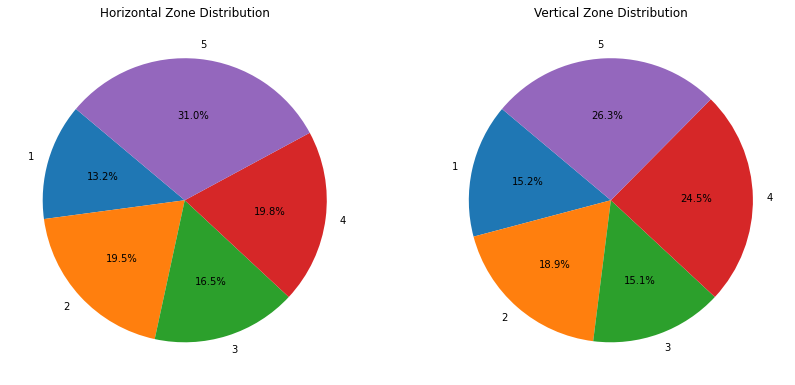

In [54]:
# Create the new columns based on the mappings
filtered_df_try2['Horizontal Zone'] = filtered_df_try2['zone'].map(horizontal_mapping)
filtered_df_try2['Vertical Zone'] = filtered_df_try2['zone'].map(vertical_mapping)

# Pie chart for Horizontal Zone
horizontal_counts = filtered_df_try2['Horizontal Zone'].value_counts().sort_index()
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(horizontal_counts, labels=horizontal_counts.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Horizontal Zone Distribution')

# Pie chart for Vertical Zone
vertical_counts = filtered_df_try2['Vertical Zone'].value_counts().sort_index()
ax[1].pie(vertical_counts, labels=vertical_counts.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Vertical Zone Distribution')

plt.show()

In [55]:
filtered_df_try2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166613 entries, 177697 to 0
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pa_id              166613 non-null  object        
 1   game_date          166613 non-null  datetime64[ns]
 2   pitch_type         166613 non-null  int64         
 3   pitch_name         166613 non-null  object        
 4   release_speed      166613 non-null  Float64       
 5   release_pos_x      166613 non-null  Float64       
 6   release_pos_y      166613 non-null  Float64       
 7   release_pos_z      166613 non-null  Float64       
 8   release_spin_rate  166613 non-null  Int64         
 9   spin_axis          166613 non-null  Int64         
 10  batter             166613 non-null  Int64         
 11  stand              166613 non-null  int64         
 12  p_throws           166613 non-null  int64         
 13  pitcher            166613 non-null  Int64        

In [56]:
import pandas as pd

# Create a copy of df_sorted1
df_epoop = filtered_df_try2.copy()

# Create a column that identifies the last pitch in each at-bat
df_epoop['is_last_pitch'] = df_epoop['pitch_number'] == df_epoop.groupby('pa_id')['pitch_number'].transform('max')

# Extract the events of the last pitch in each at-bat
last_at_bat_outcome = df_epoop.loc[df_epoop['is_last_pitch'], ['pa_id', 'events']].copy()

# Shift the events column to align with the next at-bat
last_at_bat_outcome['previous_at_bat_outcome'] = last_at_bat_outcome['events'].shift()

# Merge this with df_epoop
df_epoop = pd.merge(df_epoop, last_at_bat_outcome[['pa_id', 'previous_at_bat_outcome']], on='pa_id', how='left')

# Forward fill the 'previous_at_bat_outcome' so that it fills all rows of the current at-bat
df_epoop['previous_at_bat_outcome'] = df_epoop['previous_at_bat_outcome'].ffill()

# Drop the 'is_last_pitch' column as it's no longer needed
df_epoop.drop(columns=['is_last_pitch'], inplace=True)

# Display the first few rows of the result to check
print(df_epoop[['pa_id', 'pitch_number', 'events', 'previous_at_bat_outcome']].head())


      pa_id  pitch_number     events previous_at_bat_outcome
0  663418-4             1  no events                    None
1  663418-4             2  no events                    None
2  663418-4             3  field_out                    None
3  663418-5             1  no events               field_out
4  663418-5             2  no events               field_out


In [59]:
# df_zone_sorted= filtered_df_try2
df_zone_sorted= df_epoop

df_zone_sorted = df_zone_sorted.iloc[::-1]
df_zone_sorted['prev_pitch_type'] = df_zone_sorted['pitch_type'].shift(-1)
df_zone_sorted['prev_type'] = df_zone_sorted['type'].shift(-1)
df_zone_sorted['prev_release_speed'] = df_zone_sorted['release_speed'].shift(-1)
df_zone_sorted['prev_Vzone'] = df_zone_sorted['Vertical Zone'].shift(-1)
df_zone_sorted['prev_Hzone'] = df_zone_sorted['Horizontal Zone'].shift(-1)
df_zone_sorted['prev_zone'] = df_zone_sorted['zone'].shift(-1)

#================
df_zone_sorted['prev_balls'] = df_zone_sorted['balls'].shift(-1)
df_zone_sorted['prev_strikes'] = df_zone_sorted['strikes'].shift(-1)

df_zone_sorted['prev_plate_x'] = df_zone_sorted['plate_x'].shift(-1)
df_zone_sorted['prev_plate_z'] = df_zone_sorted['plate_z'].shift(-1)

df_zone_sorted['prev_release_pos_x'] = df_zone_sorted['release_pos_x'].shift(-1)
df_zone_sorted['prev_release_pos_y'] = df_zone_sorted['release_pos_y'].shift(-1)
df_zone_sorted['prev_release_pos_z'] = df_zone_sorted['release_pos_z'].shift(-1)
df_zone_sorted['prev_release_spin_rate'] = df_zone_sorted['release_spin_rate'].shift(-1)
df_zone_sorted['prev_spin_axis'] = df_zone_sorted['spin_axis'].shift(-1)

df_zone_sorted['prev_events'] = df_zone_sorted['events'].shift(-1)

#df_zone_sorted['prev_events'] = df_zone_sorted['events'].shift(-1)
#df_sorted_labelled.drop(['events'], axis=1, inplace=True)
#df_sorted_labelled = df_sorted_labelled.iloc[:-1, :]
df_zone_sorted = df_zone_sorted.iloc[::-1]

df_zone_sorted.head()

/tmp/ipykernel_206006/1685451063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zone_sorted['prev_pitch_type'] = df_zone_sorted['pitch_type'].shift(-1)
/tmp/ipykernel_206006/1685451063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zone_sorted['prev_type'] = df_zone_sorted['type'].shift(-1)
/tmp/ipykernel_206006/1685451063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,pa_id,game_date,pitch_type,pitch_name,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,spin_axis,batter,stand,p_throws,pitcher,events,type,balls,strikes,outs_when_up,zone,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score,Horizontal Zone,Vertical Zone,previous_at_bat_outcome,prev_pitch_type,prev_type,prev_release_speed,prev_Vzone,prev_Hzone,prev_zone,prev_balls,prev_strikes,prev_plate_x,prev_plate_z,prev_release_pos_x,prev_release_pos_y,prev_release_pos_z,prev_release_spin_rate,prev_spin_axis,prev_events
0,663418-4,2022-04-07,0,4-Seam Fastball,93.4,-1.69,53.89,5.84,2241,204,662139,0,1,506433,no events,1,0,0,0,4,-0.54,2.3,0,0,0,1,1,4,1,0,0,2,1,None,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None
1,663418-4,2022-04-07,4,Slider,87.0,-1.68,54.02,5.81,2707,91,662139,0,1,506433,no events,0,0,1,0,14,1.11,1.89,0,0,0,1,1,4,2,0,0,5,5,None,0.0,1.0,93.4,1.0,2.0,4,0,0,-0.54,2.3,-1.69,53.89,5.84,2241,204,no events
2,663418-4,2022-04-07,0,4-Seam Fastball,93.5,-1.75,53.81,5.79,2321,207,662139,0,1,506433,field_out,2,1,1,0,2,-0.21,3.13,0,0,0,1,1,4,3,0,0,1,2,None,4.0,0.0,87.0,5.0,5.0,14,0,1,1.11,1.89,-1.68,54.02,5.81,2707,91,no events
3,663418-5,2022-04-07,0,4-Seam Fastball,94.6,-1.91,53.76,5.69,2415,198,606466,0,1,506433,no events,1,0,0,1,5,-0.06,2.87,0,0,0,1,1,5,1,0,0,2,2,field_out,0.0,2.0,93.5,2.0,1.0,2,1,1,-0.21,3.13,-1.75,53.81,5.79,2321,207,field_out
4,663418-5,2022-04-07,0,4-Seam Fastball,96.4,-1.74,53.84,5.76,2466,207,606466,0,1,506433,no events,0,0,1,1,11,-0.9,3.18,0,0,0,1,1,5,2,0,0,4,4,field_out,0.0,1.0,94.6,2.0,2.0,5,0,0,-0.06,2.87,-1.91,53.76,5.69,2415,198,no events


In [60]:
df_zone_sorted.head()

,pa_id,game_date,pitch_type,pitch_name,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,spin_axis,batter,stand,p_throws,pitcher,events,type,balls,strikes,outs_when_up,zone,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score,Horizontal Zone,Vertical Zone,previous_at_bat_outcome,prev_pitch_type,prev_type,prev_release_speed,prev_Vzone,prev_Hzone,prev_zone,prev_balls,prev_strikes,prev_plate_x,prev_plate_z,prev_release_pos_x,prev_release_pos_y,prev_release_pos_z,prev_release_spin_rate,prev_spin_axis,prev_events
0,663418-4,2022-04-07,0,4-Seam Fastball,93.4,-1.69,53.89,5.84,2241,204,662139,0,1,506433,no events,1,0,0,0,4,-0.54,2.3,0,0,0,1,1,4,1,0,0,2,1,None,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None
1,663418-4,2022-04-07,4,Slider,87.0,-1.68,54.02,5.81,2707,91,662139,0,1,506433,no events,0,0,1,0,14,1.11,1.89,0,0,0,1,1,4,2,0,0,5,5,None,0.0,1.0,93.4,1.0,2.0,4,0,0,-0.54,2.3,-1.69,53.89,5.84,2241,204,no events
2,663418-4,2022-04-07,0,4-Seam Fastball,93.5,-1.75,53.81,5.79,2321,207,662139,0,1,506433,field_out,2,1,1,0,2,-0.21,3.13,0,0,0,1,1,4,3,0,0,1,2,None,4.0,0.0,87.0,5.0,5.0,14,0,1,1.11,1.89,-1.68,54.02,5.81,2707,91,no events
3,663418-5,2022-04-07,0,4-Seam Fastball,94.6,-1.91,53.76,5.69,2415,198,606466,0,1,506433,no events,1,0,0,1,5,-0.06,2.87,0,0,0,1,1,5,1,0,0,2,2,field_out,0.0,2.0,93.5,2.0,1.0,2,1,1,-0.21,3.13,-1.75,53.81,5.79,2321,207,field_out
4,663418-5,2022-04-07,0,4-Seam Fastball,96.4,-1.74,53.84,5.76,2466,207,606466,0,1,506433,no events,0,0,1,1,11,-0.9,3.18,0,0,0,1,1,5,2,0,0,4,4,field_out,0.0,1.0,94.6,2.0,2.0,5,0,0,-0.06,2.87,-1.91,53.76,5.69,2415,198,no events


In [61]:
df_zone_sorted1 = df_zone_sorted

In [62]:
df_zone_sorted_pitch_counts = df_zone_sorted['pitch_type'].value_counts()
print(df_zone_sorted_pitch_counts ,"\n=======")

pitch_type
0    57394
4    37675
1    23311
5    17920
2    13525
3    13322
6     3466
Name: count, dtype: int64 


In [63]:
# Step 1: Calculate total pitches by pitcher for each year
total_pitches_by_pitcher_year = df_zone_sorted1.groupby(['pitcher', df_zone_sorted1['game_date'].dt.year]).size().reset_index(name='total_pitches')

# Step 2: Filter out pitchers who have thrown at least 500 pitches each year
pitchers_meeting_criteria = total_pitches_by_pitcher_year[total_pitches_by_pitcher_year['total_pitches'] >= 500]

# Step 3: Get the list of pitchers who meet the criteria for every year they appear in the dataset
valid_pitchers = pitchers_meeting_criteria.groupby('pitcher').filter(lambda x: len(x) == len(df_zone_sorted1['game_date'].dt.year.unique()))

# Step 4: Extract the list of valid pitchers
valid_pitcher_ids = valid_pitchers['pitcher'].unique()

# Step 5: Filter the original DataFrame to keep only the valid pitchers
df_zone_sorted1 = df_zone_sorted1[df_zone_sorted1['pitcher'].isin(valid_pitcher_ids)]

In [64]:
cutt_df_pitch_counts = cutt_df3['pitch_type'].value_counts()
print(cutt_df_pitch_counts ,"\n=======")
cutt_df_pitch_counts = df_zone_sorted1['pitch_type'].value_counts()
print(cutt_df_pitch_counts ,"\n=======")

pitch_type
0    57394
4    37675
1    23311
5    17920
2    13525
3    13322
6     3466
Name: count, dtype: int64 
pitch_type
0    28341
4    20776
1    12153
5     9015
2     7348
3     6884
6     2535
Name: count, dtype: int64 


In [65]:
# Get PA with at least 3 pitches
df_zone_sorted1 = df_zone_sorted1[df_zone_sorted1.groupby('pa_id')['pa_id'].transform('size') >= 3].copy()

In [66]:
# Remove the first instance of each pa_id
df_zone_sorted1 = df_zone_sorted1[df_zone_sorted1.duplicated(subset=['pa_id'], keep='first')]

In [67]:
df_zone_sorted1_pitch_counts = df_zone_sorted1['pitch_type'].value_counts()
print(df_zone_sorted1_pitch_counts ,"\n=======")

pitch_type
0    19450
4    14888
1     7690
5     7370
2     4797
3     4497
6     2236
Name: count, dtype: int64 


In [68]:
lb_event = LabelEncoder()
lb_event_lab = LabelEncoder()
lb_pevent = LabelEncoder()

df_zone_sorted1['events'] = lb_event.fit_transform(df_zone_sorted1['events'])
df_zone_sorted1['previous_at_bat_outcome'] = lb_event_lab.fit_transform(df_zone_sorted1['previous_at_bat_outcome'])
df_zone_sorted1['prev_events'] = lb_pevent.fit_transform(df_zone_sorted1['prev_events'])

# klin

In [69]:
df_klin = df_zone_sorted1.drop(['release_speed', 'zone', 'pitch_name', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'release_spin_rate', 'spin_axis', 'events', 'type', 'plate_x', 'plate_z'], axis = 1)

In [70]:
import time
import pandas as pd

# Start the timer
start_time = time.time()

# Sort the DataFrame by pa_id, pitcher, at_bat_number, inning, and outs_when_up
df_klin = df_klin.sort_values(by=['pa_id', 'pitcher', 'at_bat_number', 'inning', 'outs_when_up']).reset_index(drop=True)

# One-hot encode the categorical variables
one_hot_encoded_pitch_type = pd.get_dummies(df_klin['pitch_type'], prefix='pitch_type')
one_hot_encoded_H_zone = pd.get_dummies(df_klin['Horizontal Zone'], prefix='H_zone')
one_hot_encoded_V_zone = pd.get_dummies(df_klin['Vertical Zone'], prefix='V_zone')

# Add the one-hot encoded columns to the original DataFrame
df_klin = pd.concat([df_klin, one_hot_encoded_pitch_type, one_hot_encoded_H_zone, one_hot_encoded_V_zone], axis=1)

# Function to calculate rolling proportions for one-hot encoded columns
def calculate_rolling_proportion(group, window_size, category_cols):
    return group[category_cols].rolling(window=window_size, min_periods=1).mean()

# Apply the function to create new columns for different window sizes and categorical variables
for category in ['pitch_type', 'H_zone', 'V_zone']:
    category_cols = [col for col in df_klin.columns if col.startswith(category)]
    for window_size in [5, 10]:
        rolling_proportion_df = df_klin.groupby(['pa_id', 'pitcher']).apply(
            lambda x: calculate_rolling_proportion(x, window_size, category_cols)
        ).reset_index(level=[0, 1], drop=True)
        
        # Rename the columns to reflect the window size
        rolling_proportion_df.columns = [f'prev_{window_size}_' + col + '_tendency' for col in rolling_proportion_df.columns]
        
        # Merge the rolling proportion dataframe back to the original dataframe
        df_klin = pd.concat([df_klin, rolling_proportion_df], axis=1)

# End the timer
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time
print(f"Time taken: {time_taken:.2f} seconds")

pd.options.display.max_columns = None
df_klin.head(50)

/tmp/ipykernel_206006/1289642283.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_proportion_df = df_klin.groupby(['pa_id', 'pitcher']).apply(
/tmp/ipykernel_206006/1289642283.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_proportion_df = df_klin.groupby(['pa_id', 'pitcher']).apply(
/tmp/ipykernel_206006/1289642283.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the g

Time taken: 198.50 seconds


/tmp/ipykernel_206006/1289642283.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_proportion_df = df_klin.groupby(['pa_id', 'pitcher']).apply(


,pa_id,game_date,pitch_type,batter,stand,p_throws,pitcher,balls,strikes,outs_when_up,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score,Horizontal Zone,Vertical Zone,previous_at_bat_outcome,prev_pitch_type,prev_type,prev_release_speed,prev_Vzone,prev_Hzone,prev_zone,prev_balls,prev_strikes,prev_plate_x,prev_plate_z,prev_release_pos_x,prev_release_pos_y,prev_release_pos_z,prev_release_spin_rate,prev_spin_axis,prev_events,pitch_type_0,pitch_type_1,pitch_type_2,pitch_type_3,pitch_type_4,pitch_type_5,pitch_type_6,H_zone_1,H_zone_2,H_zone_3,H_zone_4,H_zone_5,V_zone_1,V_zone_2,V_zone_3,V_zone_4,V_zone_5,prev_5_pitch_type_tendency,prev_5_pitch_type_0_tendency,prev_5_pitch_type_1_tendency,prev_5_pitch_type_2_tendency,prev_5_pitch_type_3_tendency,prev_5_pitch_type_4_tendency,prev_5_pitch_type_5_tendency,prev_5_pitch_type_6_tendency,prev_10_pitch_type_tendency,prev_10_pitch_type_0_tendency,prev_10_pitch_type_1_tendency,prev_10_pitch_type_2_tendency,prev_10_pitch_type_3_tendency,prev_10_pitch_type_4_tendency,prev_10_pitch_type_5_tendency,prev_10_pitch_type_6_tendency,prev_5_H_zone_1_tendency,prev_5_H_zone_2_tendency,prev_5_H_zone_3_tendency,prev_5_H_zone_4_tendency,prev_5_H_zone_5_tendency,prev_10_H_zone_1_tendency,prev_10_H_zone_2_tendency,prev_10_H_zone_3_tendency,prev_10_H_zone_4_tendency,prev_10_H_zone_5_tendency,prev_5_V_zone_1_tendency,prev_5_V_zone_2_tendency,prev_5_V_zone_3_tendency,prev_5_V_zone_4_tendency,prev_5_V_zone_5_tendency,prev_10_V_zone_1_tendency,prev_10_V_zone_2_tendency,prev_10_V_zone_3_tendency,prev_10_V_zone_4_tendency,prev_10_V_zone_5_tendency
0,661032-1,2022-04-26,0,664702,1,0,663776,1,0,0,0,0,0,1,0,1,2,0,0,4,5,7,0.0,0.0,94.7,5.0,5.0,14,0,0,2.07,2.34,1.92,54.37,6.24,2105,146,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,661032-1,2022-04-26,3,664702,1,0,663776,1,1,0,0,0,0,1,0,1,3,0,0,2,2,7,0.0,1.0,94.6,5.0,4.0,12,1,0,0.84,2.97,1.77,54.42,6.15,2131,155,0,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,1.500000,0.500000,0.000000,0.0,0.500000,0.000000,0.000000,0.0,1.500000,0.500000,0.000000,0.0,0.500000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.500000
2,661032-1,2022-04-26,5,664702,1,0,663776,1,2,0,0,0,0,1,0,1,4,0,0,5,5,7,3.0,1.0,83.3,2.0,2.0,5,1,1,0.16,2.8,1.69,54.4,6.21,2894,331,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,2.666667,0.333333,0.000000,0.0,0.333333,0.000000,0.333333,0.0,2.666667,0.333333,0.000000,0.0,0.333333,0.000000,0.333333,0.0,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,0.666667
3,661032-15,2022-04-26,0,676391,1,0,663776,1,0,0,0,0,0,3,0,15,2,1,0,5,4,7,1.0,0.0,93.0,5.0,5.0,14,0,0,1.26,2.48,1.73,54.35,6.31,1879,152,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,661032-15,2022-04-26,0,676391,1,0,663776,2,0,0,0,0,0,3,0,15,3,1,0,3,3,7,0.0,0.0,93.2,4.0,5.0,13,1,0,-0.52,0.39,1.82,54.25,6.1,2042,140,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,Tr

## Correlation

In [71]:
#df_prep2 = df_klin2.drop(['H_zone_1', 'H_zone_2', 'H_zone_3', 'H_zone_4', 'H_zone_5', 'V_zone_1', 'V_zone_2', 'V_zone_3', 'V_zone_4', 'V_zone_5','pitch_type_0', 'pitch_type_1', 'pitch_type_2', 'pitch_type_3', 'pitch_type_4', 'pitch_type_5', 'pitch_type_6', 'pa_id', 'game_date'], axis=1)
# df_prep2.info()
df_prep2 = df_klin.drop(['H_zone_1', 'H_zone_2', 'H_zone_3', 'H_zone_4', 'H_zone_5', 'V_zone_1', 'V_zone_2', 'V_zone_3', 'V_zone_4', 'V_zone_5','pitch_type_0', 'pitch_type_1', 'pitch_type_2', 'pitch_type_3', 'pitch_type_4', 'pitch_type_5', 'pitch_type_6', 'pa_id', 'game_date'], axis=1)
df_prep2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60928 entries, 0 to 60927
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pitch_type                     60928 non-null  int64  
 1   batter                         60928 non-null  Int64  
 2   stand                          60928 non-null  int64  
 3   p_throws                       60928 non-null  int64  
 4   pitcher                        60928 non-null  Int64  
 5   balls                          60928 non-null  Int64  
 6   strikes                        60928 non-null  Int64  
 7   outs_when_up                   60928 non-null  Int64  
 8   on_3b                          60928 non-null  int64  
 9   on_2b                          60928 non-null  int64  
 10  on_1b                          60928 non-null  int64  
 11  inning                         60928 non-null  Int64  
 12  inning_topbot                  60928 non-null 

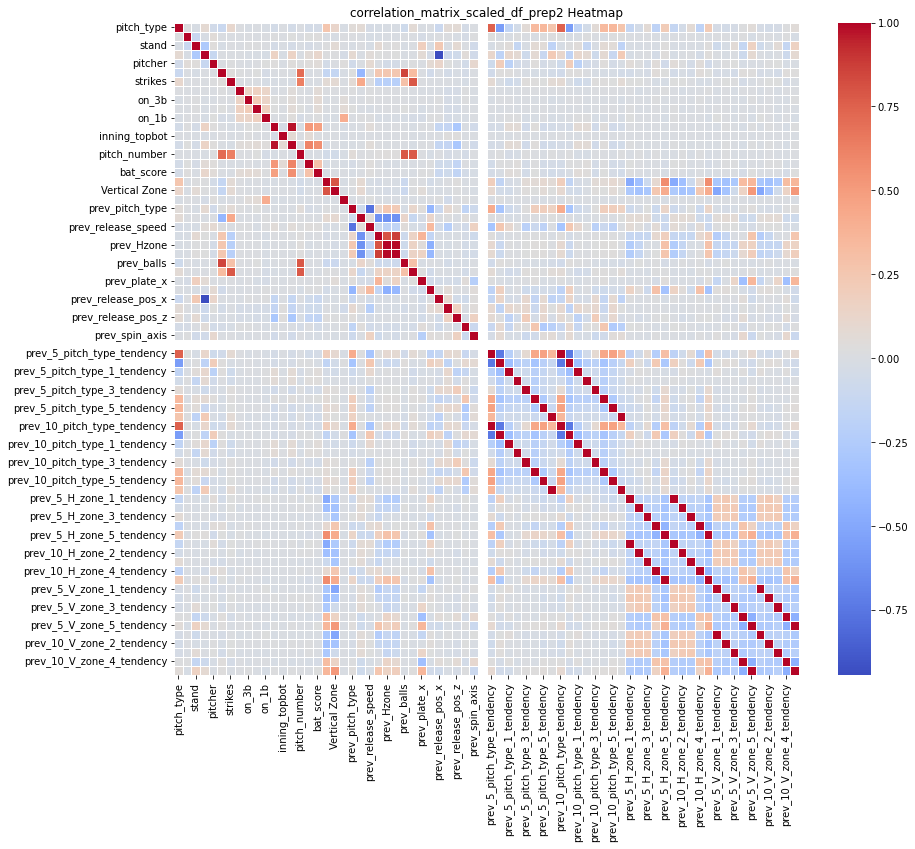

                               pitch_type    batter     stand  p_throws  \
pitch_type                       1.000000  0.015721 -0.010238  0.086090   
batter                           0.015721  1.000000 -0.111085 -0.011045   
stand                           -0.010238 -0.111085  1.000000 -0.264387   
p_throws                         0.086090 -0.011045 -0.264387  1.000000   
pitcher                         -0.055575  0.051167  0.036694 -0.117480   
balls                           -0.102039  0.002306 -0.019180 -0.001728   
strikes                          0.111070  0.004554  0.006658  0.003958   
outs_when_up                     0.007470 -0.001828  0.001163  0.004209   
on_3b                           -0.011954  0.006655  0.013963 -0.010078   
on_2b                            0.001283 -0.000249  0.016143 -0.015471   
on_1b                           -0.010877  0.007835  0.012816 -0.021830   
inning                          -0.040772  0.014965 -0.033106  0.149655   
inning_topbot            

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler4 = StandardScaler()
scaled_df_prep2 = scaler4.fit_transform(df_prep2)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df_prep2 = pd.DataFrame(scaled_df_prep2 , columns=df_prep2.columns)

# Step 2: Compute the correlation matrix using the scaled data
correlation_matrix_scaled_df_prep2 = scaled_df_prep2.corr()

# Plot the heatmap without annotating the correlation values
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_scaled_df_prep2, cmap="coolwarm", annot=False, linewidths=1)
plt.title("correlation_matrix_scaled_df_prep2 Heatmap")
plt.show()

# Display the correlation values separately
print(correlation_matrix_scaled_df_prep2)

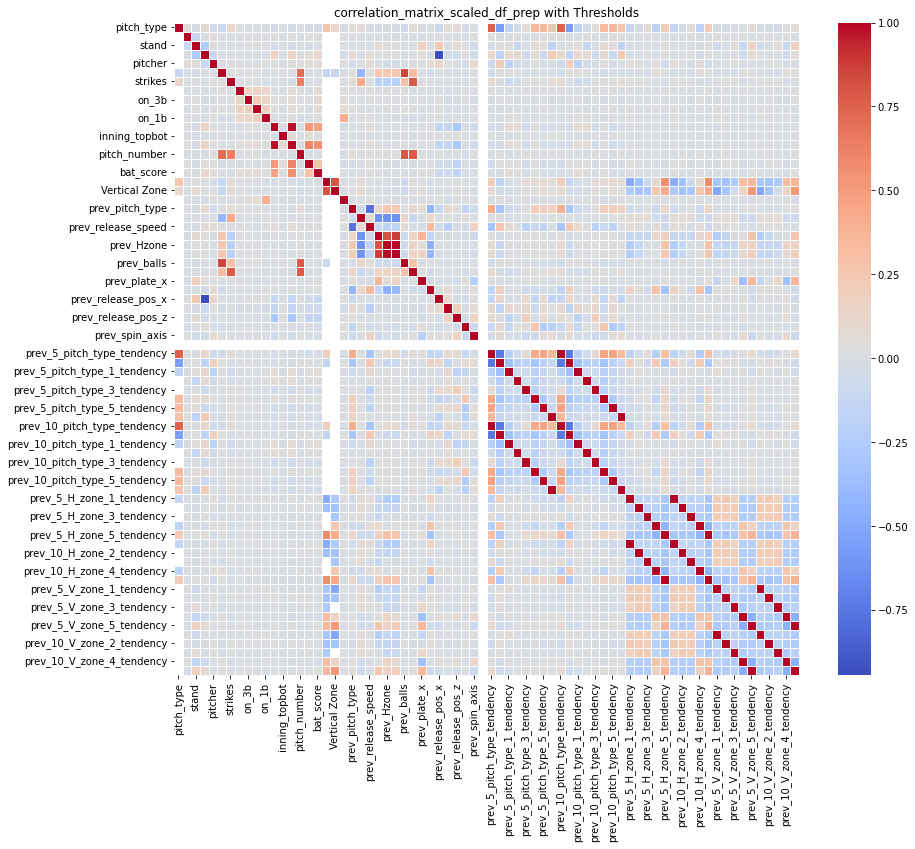

                               pitch_type    batter     stand  p_throws  \
pitch_type                       1.000000  0.015721 -0.010238  0.086090   
batter                           0.015721  1.000000 -0.111085 -0.011045   
stand                           -0.010238 -0.111085  1.000000 -0.264387   
p_throws                         0.086090 -0.011045 -0.264387  1.000000   
pitcher                         -0.055575  0.051167  0.036694 -0.117480   
balls                           -0.102039  0.002306 -0.019180 -0.001728   
strikes                          0.111070  0.004554  0.006658  0.003958   
outs_when_up                     0.007470 -0.001828  0.001163  0.004209   
on_3b                           -0.011954  0.006655  0.013963 -0.010078   
on_2b                            0.001283 -0.000249  0.016143 -0.015471   
on_1b                           -0.010877  0.007835  0.012816 -0.021830   
inning                          -0.040772  0.014965 -0.033106  0.149655   
inning_topbot            

In [73]:

# Define thresholds for specific columns
thresholds = {
    'pitch_type': 0.1,
    'Vertical Zone': 0.1,
    'Horizontal Zone': 0.1
}

# Apply thresholds to specific columns
filtered_correlation_matrix_scaled_df_prep2 = correlation_matrix_scaled_df_prep2.copy()

for column, threshold in thresholds.items():
    filtered_correlation_matrix_scaled_df_prep2[column] = filtered_correlation_matrix_scaled_df_prep2[column].apply(lambda x: x if abs(x) >= threshold else np.nan)

# Plot the heatmap without annotating the correlation values
plt.figure(figsize=(14, 12))
sns.heatmap(filtered_correlation_matrix_scaled_df_prep2, cmap="coolwarm", annot=False, linewidths=0.5, mask=filtered_correlation_matrix_scaled_df_prep2.isnull())
plt.title("correlation_matrix_scaled_df_prep with Thresholds")
plt.show()

# Display the filtered correlation values separately
print(correlation_matrix_scaled_df_prep2)

## Modelling

In [75]:
from sklearn.metrics import log_loss
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_squared_error, mean_absolute_error
import time
import numpy as np
from sklearn.pipeline import Pipeline

def evaluate_model3(pipeline, X_train, y_train, X_test, y_test):
    # Measure the time taken to fit the pipeline
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # Measure the time taken to make predictions
    start_time = time.time()
    y_pred = pipeline.predict(X_test)
    predict_time = time.time() - start_time

    # Measure the time taken to evaluate the model
    start_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    avg_f1_score = f1_score(y_test, y_pred, average='macro')
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate log_loss
    if hasattr(pipeline, "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)
        log_loss_value = log_loss(y_test, y_pred_proba)
    else:
        log_loss_value = None  # log_loss can't be computed if predict_proba is not available
    
    eval_time = time.time() - start_time
    
    # Calculate Bias (using test data)
    bias = np.mean(y_pred - y_test)

    # Calculate variance
    if hasattr(pipeline, "predict_proba"):
        variance = np.var(y_pred_proba, axis=0).mean()
    else:
        variance = np.var(y_pred)

    # Print the results
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Average F1 Score: {avg_f1_score:.2f}')
    if log_loss_value is not None:
        print(f'Log Loss: {log_loss_value:.4f}')
    else:
        print('Log Loss: Not applicable')
    print(f"Bias: {bias}")
    print(f'Variance: {variance:.4f}')
    #print(f'Root Mean Squared Error: {rmse:.4f}')
    #print(f'Mean Absoulute Error: {mae:.4f}')
    print(f'Time taken to fit the pipeline: {fit_time:.2f} seconds')
    print(f'Time taken to make predictions: {predict_time:.2f} seconds')
    print(f'Time taken to evaluate the model: {eval_time:.2f} seconds')
    print(classification_report(y_test, y_pred))

# Example usage with the best model found from GridSearchCV:
# evaluate_model3(best_model_Bprf10, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

In [76]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_auc_confusion_matrix(model, X_train, y_train, X_test, y_test):

    # Binarize the output labels for AUC calculation
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Compute AUC for each class
    n_classes = y_test_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Print AUC scores
    for i in range(n_classes):
        print(f'AUC for class {i}: {roc_auc[i]:.2f}')

    # Generate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()


In [77]:
df_prep3 = df_prep2
df_pitch = df_prep3.drop(['Horizontal Zone', 'Vertical Zone'], axis=1)
df_vzone = df_prep3.drop(['Horizontal Zone', 'pitch_type'], axis=1)
df_hzone = df_prep3.drop(['pitch_type', 'Vertical Zone'], axis=1)

from sklearn.model_selection import train_test_split

# Split the data into a training and test set.
# For Pitch Type
X_train_pitch, X_test_pitch, y_train_pitch, y_test_pitch = train_test_split(df_pitch.drop('pitch_type', axis=1), df_pitch['pitch_type'], test_size=0.2, random_state=42)

# For VZone
X_train_vzone, X_test_vzone, y_train_vzone, y_test_vzone = train_test_split(df_vzone.drop('Vertical Zone', axis=1), df_vzone['Vertical Zone'], test_size=0.2, random_state=42)

# For HZone
X_train_hzone, X_test_hzone, y_train_hzone, y_test_hzone = train_test_split(df_hzone.drop('Horizontal Zone', axis=1), df_hzone['Horizontal Zone'], test_size=0.2, random_state=42)

# Pitch Type

## Decision Tree

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [130]:
# Create the pipeline for Decision Tree
pipeline_pdtree10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree10, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 5.9363
Bias: 0.0050878056786476285
Variance: 0.1132
Mean Absoulute Error: 0.5101
Time taken to fit the pipeline: 1.77 seconds
Time taken to make predictions: 0.09 seconds
Time taken to evaluate the model: 0.05 seconds
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4011
           1       0.83      0.84      0.84      1469
           2       0.81      0.81      0.81       983
           3       0.81      0.80      0.81       898
           4       0.84      0.83      0.83      2939
           5       0.81      0.82      0.82      1469
           6       0.80      0.84      0.82       417

    accuracy                           0.84     12186
   macro avg       0.82      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



### criterion = 'gini'

In [196]:
# Create the pipeline for Decision Tree
pipeline_pdtree101 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree101, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 5.7618
Bias: 0.006482849171180043
Variance: 0.1133
Mean Absoulute Error: 0.4890
Time taken to fit the pipeline: 0.77 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4011
           1       0.84      0.86      0.85      1469
           2       0.80      0.82      0.81       983
           3       0.81      0.79      0.80       898
           4       0.84      0.84      0.84      2939
           5       0.82      0.82      0.82      1469
           6       0.80      0.82      0.81       417

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [197]:
# Create the pipeline for Decision Tree
pipeline_pdtree102 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(criterion = 'entropy', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree102, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 5.7618
Bias: 0.006482849171180043
Variance: 0.1133
Mean Absoulute Error: 0.4890
Time taken to fit the pipeline: 0.76 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4011
           1       0.84      0.86      0.85      1469
           2       0.80      0.82      0.81       983
           3       0.81      0.79      0.80       898
           4       0.84      0.84      0.84      2939
           5       0.82      0.82      0.82      1469
           6       0.80      0.82      0.81       417

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



### max-depth = default

In [198]:
# Create the pipeline for Decision Tree
pipeline_pdtree11 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 5, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree11, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.76
Average F1 Score: 0.61
Log Loss: 0.5959
Bias: -0.11726571475463647
Variance: 0.0683
Mean Absoulute Error: 0.7260
Time taken to fit the pipeline: 0.42 seconds
Time taken to make predictions: 0.02 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      4011
           1       0.75      0.79      0.77      1469
           2       1.00      0.40      0.58       983
           3       0.64      0.46      0.53       898
           4       0.76      0.84      0.80      2939
           5       0.70      0.86      0.78      1469
           6       0.00      0.00      0.00       417

    accuracy                           0.76     12186
   macro avg       0.66      0.61      0.61     12186
weighted avg       0.74      0.76      0.74     12186



/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [199]:
# Create the pipeline for Decision Tree
pipeline_pdtree12 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 10, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree12, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.7259
Bias: 0.009601181683899557
Variance: 0.0914
Mean Absoulute Error: 0.4672
Time taken to fit the pipeline: 0.62 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4011
           1       0.84      0.87      0.85      1469
           2       0.85      0.80      0.82       983
           3       0.82      0.77      0.79       898
           4       0.85      0.86      0.86      2939
           5       0.84      0.83      0.84      1469
           6       0.80      0.86      0.83       417

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



In [203]:
# Create the pipeline for Decision Tree
pipeline_pdtree13 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 9, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree13, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.4817
Bias: 0.03438371902182833
Variance: 0.0890
Mean Absoulute Error: 0.4749
Time taken to fit the pipeline: 0.57 seconds
Time taken to make predictions: 0.02 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4011
           1       0.86      0.84      0.85      1469
           2       0.87      0.75      0.81       983
           3       0.78      0.81      0.80       898
           4       0.86      0.83      0.84      2939
           5       0.80      0.88      0.84      1469
           6       0.74      0.86      0.80       417

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.85      0.84      0.84     12186



In [204]:
# Create the pipeline for Decision Tree
pipeline_pdtree14 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree14, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.84
Average F1 Score: 0.82
Log Loss: 0.3833
Bias: 0.00041030690956835714
Variance: 0.0854
Mean Absoulute Error: 0.5051
Time taken to fit the pipeline: 0.55 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.82      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.86      0.82      0.84      2939
           5       0.81      0.87      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.84     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.84      0.83     12186



### min_samples_leaf = 1

In [205]:
# Create the pipeline for Decision Tree
pipeline_pdtree20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 2, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree20, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.84
Average F1 Score: 0.82
Log Loss: 0.3806
Bias: 0.00041030690956835714
Variance: 0.0854
Mean Absoulute Error: 0.5051
Time taken to fit the pipeline: 0.55 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.82      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.86      0.82      0.84      2939
           5       0.81      0.87      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.84     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.84      0.83     12186



In [206]:
# Create the pipeline for Decision Tree
pipeline_pdtree21 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 4, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree21, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.84
Average F1 Score: 0.82
Log Loss: 0.3806
Bias: 0.00041030690956835714
Variance: 0.0854
Mean Absoulute Error: 0.5051
Time taken to fit the pipeline: 0.53 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.82      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.86      0.82      0.84      2939
           5       0.81      0.87      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.84     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.84      0.83     12186



In [208]:
# Create the pipeline for Decision Tree
pipeline_pdtree22 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 10, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree22, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3808
Bias: -0.0026259642212374855
Variance: 0.0854
Mean Absoulute Error: 0.5060
Time taken to fit the pipeline: 0.55 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.82      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.87      0.82      0.84      2939
           5       0.81      0.87      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.83      0.83     12186



In [217]:
# Create the pipeline for Decision Tree
pipeline_pdtree23 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree23, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3741
Bias: -0.003118332512719514
Variance: 0.0854
Mean Absoulute Error: 0.5066
Time taken to fit the pipeline: 3.60 seconds
Time taken to make predictions: 0.12 seconds
Time taken to evaluate the model: 0.12 seconds
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.83      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.86      0.82      0.84      2939
           5       0.81      0.87      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.83      0.83     12186



In [216]:
# Create the pipeline for Decision Tree
pipeline_pdtree24 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 23, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree24, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.84
Average F1 Score: 0.82
Log Loss: 0.3750
Bias: 0.0008206138191367143
Variance: 0.0854
Mean Absoulute Error: 0.5057
Time taken to fit the pipeline: 0.59 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.84      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.87      0.82      0.84      2939
           5       0.80      0.88      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.84     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.84      0.84     12186



### min_samples_split=2

In [218]:
# Create the pipeline for Decision Tree
pipeline_pdtree30 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_split=4,min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree30, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3741
Bias: -0.003118332512719514
Variance: 0.0854
Mean Absoulute Error: 0.5066
Time taken to fit the pipeline: 0.58 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.83      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.86      0.82      0.84      2939
           5       0.81      0.87      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.83      0.83     12186



In [219]:
# Create the pipeline for Decision Tree
pipeline_pdtree31 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_split=10,min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree31, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3741
Bias: -0.003118332512719514
Variance: 0.0854
Mean Absoulute Error: 0.5066
Time taken to fit the pipeline: 0.55 seconds
Time taken to make predictions: 0.04 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.83      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.86      0.82      0.84      2939
           5       0.81      0.87      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.83      0.83     12186



### max_leaf_nodes  = None

In [220]:
# Create the pipeline for Decision Tree
pipeline_pdtree40 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 50, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree40, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.81
Average F1 Score: 0.77
Log Loss: 0.4443
Bias: -0.020269161332676842
Variance: 0.0791
Mean Absoulute Error: 0.5890
Time taken to fit the pipeline: 0.52 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4011
           1       0.85      0.73      0.79      1469
           2       0.94      0.54      0.68       983
           3       0.71      0.78      0.74       898
           4       0.82      0.82      0.82      2939
           5       0.84      0.79      0.81      1469
           6       0.58      0.83      0.69       417

    accuracy                           0.81     12186
   macro avg       0.79      0.77      0.77     12186
weighted avg       0.82      0.81      0.80     12186



In [221]:
# Create the pipeline for Decision Tree
pipeline_pdtree41 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 100, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree41, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3785
Bias: 0.07147546364680782
Variance: 0.0845
Mean Absoulute Error: 0.5005
Time taken to fit the pipeline: 0.55 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4011
           1       0.83      0.82      0.83      1469
           2       0.83      0.73      0.78       983
           3       0.83      0.74      0.78       898
           4       0.86      0.82      0.84      2939
           5       0.77      0.91      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.83     12186
   macro avg       0.81      0.82      0.82     12186
weighted avg       0.84      0.83      0.83     12186



In [222]:
# Create the pipeline for Decision Tree
pipeline_pdtree42 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 150, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree42, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3741
Bias: -0.003118332512719514
Variance: 0.0854
Mean Absoulute Error: 0.5066
Time taken to fit the pipeline: 0.57 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.83      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.86      0.82      0.84      2939
           5       0.81      0.87      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.83      0.83     12186



In [232]:
# Create the pipeline for Decision Tree
pipeline_pdtree43 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 130, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree43, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.84
Average F1 Score: 0.82
Log Loss: 0.3703
Bias: 0.005498112588215986
Variance: 0.0852
Mean Absoulute Error: 0.5041
Time taken to fit the pipeline: 0.54 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.03 seconds
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4011
           1       0.84      0.82      0.83      1469
           2       0.83      0.72      0.77       983
           3       0.83      0.74      0.78       898
           4       0.86      0.82      0.84      2939
           5       0.81      0.87      0.84      1469
           6       0.71      0.89      0.79       417

    accuracy                           0.84     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.84      0.84      0.84     12186



### max_features = None

In [233]:
# Create the pipeline for Decision Tree
pipeline_pdtree50 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, max_features='log2', max_leaf_nodes = 130, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree50, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.76
Average F1 Score: 0.71
Log Loss: 0.5960
Bias: -0.19998358772361727
Variance: 0.0710
Mean Absoulute Error: 0.6979
Time taken to fit the pipeline: 0.18 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.06 seconds
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4011
           1       0.68      0.82      0.74      1469
           2       0.66      0.63      0.65       983
           3       0.76      0.75      0.76       898
           4       0.80      0.74      0.77      2939
           5       0.77      0.65      0.71      1469
           6       0.56      0.45      0.50       417

    accuracy                           0.76     12186
   macro avg       0.72      0.70      0.71     12186
weighted avg       0.76      0.76      0.76     12186



In [234]:
# Create the pipeline for Decision Tree
pipeline_pdtree51 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, max_features='sqrt', max_leaf_nodes = 130, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_pdtree51, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Decision Tree Pitch Classifier:
Accuracy: 0.81
Average F1 Score: 0.77
Log Loss: 0.4809
Bias: 0.017232890201871
Variance: 0.0772
Mean Absoulute Error: 0.5618
Time taken to fit the pipeline: 0.18 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4011
           1       0.81      0.74      0.77      1469
           2       0.82      0.58      0.68       983
           3       0.71      0.79      0.75       898
           4       0.78      0.89      0.83      2939
           5       0.82      0.72      0.77      1469
           6       0.79      0.75      0.77       417

    accuracy                           0.81     12186
   macro avg       0.80      0.76      0.77     12186
weighted avg       0.81      0.81      0.80     12186



## Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Create the pipeline for Decision Tree
pipeline_prf10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf10, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2927
Bias: 0.0045954373871656
Variance: 0.0838
Mean Absoulute Error: 0.4101
Time taken to fit the pipeline: 11.21 seconds
Time taken to make predictions: 0.23 seconds
Time taken to evaluate the model: 0.25 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.86      0.83      0.84       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.85      0.85      1469
           6       0.82      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



### max_features

In [111]:
# Create the pipeline for Decision Tree
pipeline_prf11 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features= None, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf11, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2965
Bias: 0.006482849171180043
Variance: 0.0889
Mean Absoulute Error: 0.4094
Time taken to fit the pipeline: 54.63 seconds
Time taken to make predictions: 0.15 seconds
Time taken to evaluate the model: 0.17 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.87      0.83      0.85       983
           3       0.85      0.85      0.85       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.85      0.85      1469
           6       0.82      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [110]:
# Create the pipeline for Decision Tree
pipeline_prf12 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features= 'log2', random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf12, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.3067
Bias: 0.004923682914820286
Variance: 0.0814
Mean Absoulute Error: 0.4154
Time taken to fit the pipeline: 8.99 seconds
Time taken to make predictions: 0.28 seconds
Time taken to evaluate the model: 0.32 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.85      0.84      0.84       898
           4       0.86      0.87      0.86      2939
           5       0.85      0.86      0.86      1469
           6       0.82      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



## max-depth = None

In [104]:
# Create the pipeline for Decision Tree
pipeline_prf20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth=5, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf20, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.80
Average F1 Score: 0.76
Log Loss: 0.6839
Bias: -0.13129821106187428
Variance: 0.0362
Mean Absoulute Error: 0.5889
Time taken to fit the pipeline: 4.57 seconds
Time taken to make predictions: 0.24 seconds
Time taken to evaluate the model: 0.17 seconds
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4011
           1       0.80      0.83      0.81      1469
           2       0.84      0.57      0.68       983
           3       0.86      0.58      0.69       898
           4       0.80      0.84      0.82      2939
           5       0.78      0.82      0.80      1469
           6       0.87      0.53      0.66       417

    accuracy                           0.80     12186
   macro avg       0.82      0.72      0.76     12186
weighted avg       0.81      0.80      0.80     12186



In [105]:
# Create the pipeline for Decision Tree
pipeline_prf21 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf21, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.86
Average F1 Score: 0.85
Log Loss: 0.3671
Bias: 0.0069752174626620716
Variance: 0.0717
Mean Absoulute Error: 0.4316
Time taken to fit the pipeline: 9.71 seconds
Time taken to make predictions: 0.16 seconds
Time taken to evaluate the model: 0.19 seconds
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4011
           1       0.87      0.85      0.86      1469
           2       0.89      0.79      0.83       983
           3       0.86      0.80      0.83       898
           4       0.85      0.87      0.86      2939
           5       0.85      0.84      0.85      1469
           6       0.78      0.87      0.83       417

    accuracy                           0.86     12186
   macro avg       0.85      0.85      0.85     12186
weighted avg       0.86      0.86      0.86     12186



In [106]:
# Create the pipeline for Decision Tree
pipeline_prf22 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth=15, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf22, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2981
Bias: 0.016330215000820613
Variance: 0.0824
Mean Absoulute Error: 0.4063
Time taken to fit the pipeline: 8.95 seconds
Time taken to make predictions: 0.20 seconds
Time taken to evaluate the model: 0.18 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.88      0.86      0.87      1469
           2       0.89      0.82      0.85       983
           3       0.86      0.84      0.85       898
           4       0.86      0.88      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.82      0.88      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [107]:
# Create the pipeline for Decision Tree
pipeline_prf23 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf23, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2928
Bias: 0.02018709995076317
Variance: 0.0835
Mean Absoulute Error: 0.4049
Time taken to fit the pipeline: 11.25 seconds
Time taken to make predictions: 0.29 seconds
Time taken to evaluate the model: 0.30 seconds
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.84      0.86       983
           3       0.86      0.82      0.84       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.81      0.88      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [113]:
# Create the pipeline for Decision Tree
pipeline_prf231 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf231, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2894
Bias: 0.0074675857541441
Variance: 0.0890
Mean Absoulute Error: 0.4112
Time taken to fit the pipeline: 52.88 seconds
Time taken to make predictions: 0.14 seconds
Time taken to evaluate the model: 0.15 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.83      0.85       983
           3       0.85      0.84      0.85       898
           4       0.86      0.87      0.87      2939
           5       0.85      0.85      0.85      1469
           6       0.83      0.88      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [114]:
# Create the pipeline for Decision Tree
pipeline_prf232 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='log2', max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf232, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.3068
Bias: 0.018545872312489744
Variance: 0.0811
Mean Absoulute Error: 0.4110
Time taken to fit the pipeline: 7.90 seconds
Time taken to make predictions: 0.19 seconds
Time taken to evaluate the model: 0.19 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.86      0.83      0.84       898
           4       0.85      0.87      0.86      2939
           5       0.85      0.85      0.85      1469
           6       0.81      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [108]:
# Create the pipeline for Decision Tree
pipeline_prf24 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth=25, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf24, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2923
Bias: 0.011160347940259314
Variance: 0.0838
Mean Absoulute Error: 0.4088
Time taken to fit the pipeline: 10.08 seconds
Time taken to make predictions: 0.19 seconds
Time taken to evaluate the model: 0.25 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.86      0.87      1469
           2       0.87      0.82      0.85       983
           3       0.86      0.83      0.84       898
           4       0.86      0.88      0.87      2939
           5       0.86      0.85      0.86      1469
           6       0.81      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [112]:
# Create the pipeline for Decision Tree
pipeline_prf25 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth=30, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf25, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2928
Bias: 0.007877892663712457
Variance: 0.0837
Mean Absoulute Error: 0.4103
Time taken to fit the pipeline: 9.61 seconds
Time taken to make predictions: 0.19 seconds
Time taken to evaluate the model: 0.20 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.86      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.85      0.83      0.84       898
           4       0.86      0.88      0.87      2939
           5       0.86      0.85      0.86      1469
           6       0.81      0.86      0.83       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



### min sample leaf default 1

In [118]:
# Create the pipeline for Decision Tree
pipeline_prf30 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 2,
                                          max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf30, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2947
Bias: 0.011160347940259314
Variance: 0.0832
Mean Absoulute Error: 0.4090
Time taken to fit the pipeline: 9.34 seconds
Time taken to make predictions: 0.17 seconds
Time taken to evaluate the model: 0.19 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.86      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.87      0.83      0.85       898
           4       0.86      0.87      0.86      2939
           5       0.85      0.86      0.86      1469
           6       0.82      0.87      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [120]:
# Create the pipeline for Decision Tree
pipeline_prf301 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 4,
                                          max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf301, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2981
Bias: 0.010175611357295257
Variance: 0.0822
Mean Absoulute Error: 0.4029
Time taken to fit the pipeline: 9.26 seconds
Time taken to make predictions: 0.16 seconds
Time taken to evaluate the model: 0.19 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.88      0.86      0.87      1469
           2       0.89      0.83      0.86       983
           3       0.86      0.84      0.85       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.81      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [123]:
# Create the pipeline for Decision Tree
pipeline_prf302 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 6,
                                          max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf302, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.3032
Bias: 0.01903824060397177
Variance: 0.0816
Mean Absoulute Error: 0.4203
Time taken to fit the pipeline: 9.07 seconds
Time taken to make predictions: 0.20 seconds
Time taken to evaluate the model: 0.19 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4011
           1       0.88      0.86      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.86      0.82      0.84       898
           4       0.86      0.87      0.86      2939
           5       0.85      0.86      0.85      1469
           6       0.81      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [119]:
# Create the pipeline for Decision Tree
pipeline_prf31 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, min_samples_leaf= 2
                                          , max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf31, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2905
Bias: 0.003282455276546857
Variance: 0.0888
Mean Absoulute Error: 0.4095
Time taken to fit the pipeline: 52.79 seconds
Time taken to make predictions: 0.17 seconds
Time taken to evaluate the model: 0.18 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.85      0.85      0.85       898
           4       0.86      0.87      0.87      2939
           5       0.85      0.85      0.85      1469
           6       0.83      0.87      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [122]:
# Create the pipeline for Decision Tree
pipeline_prf311 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, min_samples_leaf= 4
                                          , max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf311, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2832
Bias: 0.009026752010503857
Variance: 0.0886
Mean Absoulute Error: 0.4097
Time taken to fit the pipeline: 52.38 seconds
Time taken to make predictions: 0.19 seconds
Time taken to evaluate the model: 0.17 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.83      0.85       983
           3       0.85      0.83      0.84       898
           4       0.86      0.87      0.86      2939
           5       0.85      0.85      0.85      1469
           6       0.82      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [124]:
# Create the pipeline for Decision Tree
pipeline_prf312 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, min_samples_leaf= 6
                                          , max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf312, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2807
Bias: 0.005580173970129657
Variance: 0.0883
Mean Absoulute Error: 0.4052
Time taken to fit the pipeline: 47.15 seconds
Time taken to make predictions: 0.14 seconds
Time taken to evaluate the model: 0.15 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.84      0.84      0.84       898
           4       0.86      0.87      0.86      2939
           5       0.86      0.85      0.85      1469
           6       0.82      0.86      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



### min_samples_split=5

In [125]:
# Create the pipeline for Decision Tree
pipeline_prf40 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 4
                                          , max_depth=20, min_samples_split=7, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf40, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2981
Bias: 0.010175611357295257
Variance: 0.0822
Mean Absoulute Error: 0.4029
Time taken to fit the pipeline: 8.74 seconds
Time taken to make predictions: 0.20 seconds
Time taken to evaluate the model: 0.20 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.88      0.86      0.87      1469
           2       0.89      0.83      0.86       983
           3       0.86      0.84      0.85       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.81      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [126]:
# Create the pipeline for Decision Tree
pipeline_prf401 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 4
                                          , max_depth=20, min_samples_split=3, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf401, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2981
Bias: 0.010175611357295257
Variance: 0.0822
Mean Absoulute Error: 0.4029
Time taken to fit the pipeline: 9.15 seconds
Time taken to make predictions: 0.17 seconds
Time taken to evaluate the model: 0.19 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.88      0.86      0.87      1469
           2       0.89      0.83      0.86       983
           3       0.86      0.84      0.85       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.81      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [156]:
# Create the pipeline for Decision Tree
pipeline_prf41 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, min_samples_leaf= 6
                                          , max_depth=20, min_samples_split=7, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf41, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2807
Bias: 0.005580173970129657
Variance: 0.0883
Mean Absoulute Error: 0.4052
Time taken to fit the pipeline: 37.80 seconds
Time taken to make predictions: 0.11 seconds
Time taken to evaluate the model: 0.12 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.84      0.84      0.84       898
           4       0.86      0.87      0.86      2939
           5       0.86      0.85      0.85      1469
           6       0.82      0.86      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [157]:
# Create the pipeline for Decision Tree
pipeline_prf411 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, min_samples_leaf= 6
                                          , max_depth=20, min_samples_split=3, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf411, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2807
Bias: 0.005580173970129657
Variance: 0.0883
Mean Absoulute Error: 0.4052
Time taken to fit the pipeline: 38.39 seconds
Time taken to make predictions: 0.12 seconds
Time taken to evaluate the model: 0.12 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.84      0.84      0.84       898
           4       0.86      0.87      0.86      2939
           5       0.86      0.85      0.85      1469
           6       0.82      0.86      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



### max_leaf_nodes=None

In [133]:
# Create the pipeline for Decision Tree
pipeline_prf50 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 4
                                          , max_depth=20, max_leaf_nodes=2, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf50, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.50
Average F1 Score: 0.19
Log Loss: 1.3847
Bias: -0.15099294272115543
Variance: 0.0031
Mean Absoulute Error: 1.3127
Time taken to fit the pipeline: 1.94 seconds
Time taken to make predictions: 0.05 seconds
Time taken to evaluate the model: 0.06 seconds
              precision    recall  f1-score   support

           0       0.67      0.94      0.78      4011
           1       0.45      0.05      0.10      1469
           2       0.00      0.00      0.00       983
           3       0.00      0.00      0.00       898
           4       0.35      0.76      0.48      2939
           5       0.00      0.00      0.00      1469
           6       0.00      0.00      0.00       417

    accuracy                           0.50     12186
   macro avg       0.21      0.25      0.19     12186
weighted avg       0.36      0.50      0.39     12186



/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [139]:
# Create the pipeline for Decision Tree
pipeline_prf501 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 4
                                          , max_depth=20, max_leaf_nodes=15, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf501, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.80
Average F1 Score: 0.75
Log Loss: 0.6485
Bias: -0.06868537666174299
Variance: 0.0413
Mean Absoulute Error: 0.6082
Time taken to fit the pipeline: 4.30 seconds
Time taken to make predictions: 0.07 seconds
Time taken to evaluate the model: 0.08 seconds
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      4011
           1       0.80      0.80      0.80      1469
           2       0.84      0.54      0.65       983
           3       0.80      0.60      0.68       898
           4       0.82      0.82      0.82      2939
           5       0.76      0.83      0.79      1469
           6       0.70      0.64      0.67       417

    accuracy                           0.80     12186
   macro avg       0.79      0.73      0.75     12186
weighted avg       0.80      0.80      0.79     12186



In [142]:
# Create the pipeline for Decision Tree
pipeline_prf503 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 4
                                          , max_depth=20, max_leaf_nodes=100, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf503, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.86
Average F1 Score: 0.85
Log Loss: 0.4012
Bias: -0.017561135729525685
Variance: 0.0678
Mean Absoulute Error: 0.4369
Time taken to fit the pipeline: 6.05 seconds
Time taken to make predictions: 0.10 seconds
Time taken to evaluate the model: 0.10 seconds
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4011
           1       0.87      0.85      0.86      1469
           2       0.89      0.79      0.83       983
           3       0.85      0.81      0.83       898
           4       0.86      0.85      0.85      2939
           5       0.85      0.84      0.84      1469
           6       0.77      0.88      0.82       417

    accuracy                           0.86     12186
   macro avg       0.85      0.85      0.85     12186
weighted avg       0.86      0.86      0.86     12186



In [144]:
# Create the pipeline for Decision Tree
pipeline_prf504 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 4
                                          , max_depth=20, max_leaf_nodes=500, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf504, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.3222
Bias: 0.005662235352043328
Variance: 0.0783
Mean Absoulute Error: 0.4125
Time taken to fit the pipeline: 7.73 seconds
Time taken to make predictions: 0.12 seconds
Time taken to evaluate the model: 0.13 seconds
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4011
           1       0.89      0.86      0.87      1469
           2       0.88      0.81      0.84       983
           3       0.86      0.82      0.84       898
           4       0.86      0.86      0.86      2939
           5       0.85      0.86      0.85      1469
           6       0.79      0.88      0.83       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [145]:
# Create the pipeline for Decision Tree
pipeline_prf505 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 4
                                          , max_depth=20, max_leaf_nodes=1000, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf505, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.3062
Bias: 0.005990480879698014
Variance: 0.0809
Mean Absoulute Error: 0.4081
Time taken to fit the pipeline: 8.28 seconds
Time taken to make predictions: 0.14 seconds
Time taken to evaluate the model: 0.14 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.88      0.87      0.88      1469
           2       0.88      0.82      0.85       983
           3       0.86      0.82      0.84       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.80      0.87      0.83       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [147]:
# Create the pipeline for Decision Tree
pipeline_prf507 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', min_samples_leaf= 4
                                          , max_depth=20, max_leaf_nodes=3000, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf507, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2972
Bias: 0.009847365829640572
Variance: 0.0824
Mean Absoulute Error: 0.4042
Time taken to fit the pipeline: 9.36 seconds
Time taken to make predictions: 0.19 seconds
Time taken to evaluate the model: 0.24 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.88      0.87      0.87      1469
           2       0.88      0.83      0.85       983
           3       0.85      0.83      0.84       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.81      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [135]:
# Create the pipeline for Decision Tree
pipeline_prf51 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, min_samples_leaf= 4
                                          , max_depth=20, max_leaf_nodes=2, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf51, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.48
Average F1 Score: 0.18
Log Loss: 1.4315
Bias: 0.12965698342360085
Variance: 0.0163
Mean Absoulute Error: 1.2826
Time taken to fit the pipeline: 10.79 seconds
Time taken to make predictions: 0.05 seconds
Time taken to evaluate the model: 0.07 seconds
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      4011
           1       0.00      0.00      0.00      1469
           2       0.00      0.00      0.00       983
           3       0.00      0.00      0.00       898
           4       0.32      0.79      0.45      2939
           5       0.00      0.00      0.00      1469
           6       0.00      0.00      0.00       417

    accuracy                           0.48     12186
   macro avg       0.15      0.24      0.18     12186
weighted avg       0.32      0.48      0.37     12186



/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [148]:
# Create the pipeline for Decision Tree
pipeline_prf511 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, min_samples_leaf= 4
                                          , max_depth=20, max_leaf_nodes=2000, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf511, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2836
Bias: 0.0109141637945183
Variance: 0.0886
Mean Absoulute Error: 0.4084
Time taken to fit the pipeline: 51.85 seconds
Time taken to make predictions: 0.16 seconds
Time taken to evaluate the model: 0.16 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.83      0.85       983
           3       0.85      0.84      0.84       898
           4       0.86      0.87      0.86      2939
           5       0.85      0.86      0.85      1469
           6       0.82      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [149]:
# Create the pipeline for Decision Tree
pipeline_prf512 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, min_samples_leaf= 4
                                          , max_depth=20, max_leaf_nodes=3000, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf512, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2836
Bias: 0.0109141637945183
Variance: 0.0886
Mean Absoulute Error: 0.4084
Time taken to fit the pipeline: 52.58 seconds
Time taken to make predictions: 0.17 seconds
Time taken to evaluate the model: 0.15 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.83      0.85       983
           3       0.85      0.84      0.84       898
           4       0.86      0.87      0.86      2939
           5       0.85      0.86      0.85      1469
           6       0.82      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



### criterion = 'gini'

In [78]:
# Create the pipeline for Decision Tree
pipeline_prf601 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', criterion='entropy',
                                          min_samples_leaf= 4, max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf601, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2855
Bias: 0.014032496307237814
Variance: 0.0832
Mean Absoulute Error: 0.4050
Time taken to fit the pipeline: 7.61 seconds
Time taken to make predictions: 0.13 seconds
Time taken to evaluate the model: 0.19 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.90      0.80      0.85       983
           3       0.86      0.83      0.85       898
           4       0.86      0.88      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.81      0.88      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [152]:
# Create the pipeline for Decision Tree
pipeline_prf602 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', criterion='log_loss',
                                          min_samples_leaf= 4, max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf602, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2855
Bias: 0.014032496307237814
Variance: 0.0832
Mean Absoulute Error: 0.4050
Time taken to fit the pipeline: 7.42 seconds
Time taken to make predictions: 0.15 seconds
Time taken to evaluate the model: 0.16 seconds
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.90      0.80      0.85       983
           3       0.86      0.83      0.85       898
           4       0.86      0.88      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.81      0.88      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [158]:
# Create the pipeline for Decision Tree
pipeline_prf611 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, criterion='entropy',
                                          min_samples_leaf= 6, max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf611, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.86
Average F1 Score: 0.85
Log Loss: 0.2734
Bias: 0.016822583292302642
Variance: 0.0897
Mean Absoulute Error: 0.4281
Time taken to fit the pipeline: 39.33 seconds
Time taken to make predictions: 0.12 seconds
Time taken to evaluate the model: 0.14 seconds
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4011
           1       0.87      0.86      0.86      1469
           2       0.88      0.82      0.85       983
           3       0.85      0.82      0.83       898
           4       0.86      0.86      0.86      2939
           5       0.85      0.86      0.85      1469
           6       0.79      0.85      0.82       417

    accuracy                           0.86     12186
   macro avg       0.85      0.85      0.85     12186
weighted avg       0.86      0.86      0.86     12186



In [159]:
# Create the pipeline for Decision Tree
pipeline_prf612 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, criterion='log_loss',
                                          min_samples_leaf= 6, max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf612, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.86
Average F1 Score: 0.85
Log Loss: 0.2734
Bias: 0.016822583292302642
Variance: 0.0897
Mean Absoulute Error: 0.4281
Time taken to fit the pipeline: 40.51 seconds
Time taken to make predictions: 0.13 seconds
Time taken to evaluate the model: 0.13 seconds
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4011
           1       0.87      0.86      0.86      1469
           2       0.88      0.82      0.85       983
           3       0.85      0.82      0.83       898
           4       0.86      0.86      0.86      2939
           5       0.85      0.86      0.85      1469
           6       0.79      0.85      0.82       417

    accuracy                           0.86     12186
   macro avg       0.85      0.85      0.85     12186
weighted avg       0.86      0.86      0.86     12186



### class_weight = None

In [155]:
# Create the pipeline for Decision Tree
pipeline_prf70 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', criterion='entropy',
                                          min_samples_leaf= 4, class_weight='balanced', max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf70, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.86
Average F1 Score: 0.85
Log Loss: 0.3007
Bias: 0.13728869194157228
Variance: 0.0847
Mean Absoulute Error: 0.4271
Time taken to fit the pipeline: 7.55 seconds
Time taken to make predictions: 0.14 seconds
Time taken to evaluate the model: 0.15 seconds
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      4011
           1       0.85      0.87      0.86      1469
           2       0.81      0.87      0.84       983
           3       0.77      0.93      0.84       898
           4       0.88      0.84      0.86      2939
           5       0.82      0.90      0.86      1469
           6       0.73      0.94      0.82       417

    accuracy                           0.86     12186
   macro avg       0.83      0.88      0.85     12186
weighted avg       0.87      0.86      0.86     12186



In [236]:
# Create the pipeline for Decision Tree
pipeline_prf71 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', criterion='entropy',
                                          min_samples_leaf= 4, class_weight='balanced_subsample', max_depth=20, random_state=42))
])

print("Random Forest Pitch Classifier:")
evaluate_model3(pipeline_prf71, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Random Forest Pitch Classifier:
Accuracy: 0.86
Average F1 Score: 0.85
Log Loss: 0.3005
Bias: 0.14245855900213358
Variance: 0.0846
Mean Absoulute Error: 0.4282
Time taken to fit the pipeline: 8.76 seconds
Time taken to make predictions: 0.17 seconds
Time taken to evaluate the model: 0.16 seconds
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      4011
           1       0.85      0.87      0.86      1469
           2       0.81      0.87      0.84       983
           3       0.76      0.92      0.83       898
           4       0.88      0.84      0.86      2939
           5       0.82      0.90      0.86      1469
           6       0.73      0.95      0.82       417

    accuracy                           0.86     12186
   macro avg       0.83      0.88      0.85     12186
weighted avg       0.87      0.86      0.86     12186



# ==============

## Support Vector Classifier

In [237]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psvc10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

print("Pitch SVC Classifier:")
evaluate_model3(pipeline_psvc10, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SVC Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.3421
Bias: 0.027818808468734614
Variance: 0.0916
Mean Absoulute Error: 0.4020
Time taken to fit the pipeline: 328.13 seconds
Time taken to make predictions: 13.15 seconds
Time taken to evaluate the model: 12.91 seconds
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4011
           1       0.86      0.86      0.86      1469
           2       0.88      0.80      0.84       983
           3       0.83      0.86      0.84       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.87      0.86      1469
           6       0.80      0.88      0.84       417

    accuracy                           0.87     12186
   macro avg       0.85      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



### Kernel = rbf

In [238]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psvc11 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='linear', random_state=42))
])

print("Pitch SVC Classifier:")
evaluate_model3(pipeline_psvc11, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SVC Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.3582
Bias: 0.0003282455276546857
Variance: 0.0892
Mean Absoulute Error: 0.4374
Time taken to fit the pipeline: 476.37 seconds
Time taken to make predictions: 4.53 seconds
Time taken to evaluate the model: 4.55 seconds
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4011
           1       0.84      0.85      0.85      1469
           2       0.84      0.78      0.81       983
           3       0.83      0.84      0.84       898
           4       0.86      0.85      0.85      2939
           5       0.85      0.86      0.85      1469
           6       0.83      0.86      0.85       417

    accuracy                           0.85     12186
   macro avg       0.84      0.85      0.84     12186
weighted avg       0.85      0.85      0.85     12186



## C=1

In [239]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psvc20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='rbf', gamma='scale', C=2, decision_function_shape='ovr', random_state=42))
])

print("Pitch SVC Classifier:")
evaluate_model3(pipeline_psvc20, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SVC Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.3352
Bias: 0.026752010503856886
Variance: 0.0916
Mean Absoulute Error: 0.3941
Time taken to fit the pipeline: 279.64 seconds
Time taken to make predictions: 12.83 seconds
Time taken to evaluate the model: 12.91 seconds
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.88      0.82      0.85       983
           3       0.83      0.86      0.84       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.87      0.86      1469
           6       0.82      0.88      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [240]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psvc21 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='rbf', gamma='scale', C=3, decision_function_shape='ovr', random_state=42))
])

print("Pitch SVC Classifier:")
evaluate_model3(pipeline_psvc21, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SVC Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.3337
Bias: 0.019940915805022157
Variance: 0.0914
Mean Absoulute Error: 0.3932
Time taken to fit the pipeline: 278.87 seconds
Time taken to make predictions: 13.05 seconds
Time taken to evaluate the model: 12.43 seconds
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.87      0.83      0.85       983
           3       0.83      0.85      0.84       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.83      0.88      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



In [241]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psvc22 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='rbf', gamma='scale', C=5, decision_function_shape='ovr', random_state=42))
])

print("Pitch SVC Classifier:")
evaluate_model3(pipeline_psvc22, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SVC Classifier:
Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.3350
Bias: 0.015919908091252256
Variance: 0.0909
Mean Absoulute Error: 0.4014
Time taken to fit the pipeline: 294.97 seconds
Time taken to make predictions: 12.88 seconds
Time taken to evaluate the model: 12.69 seconds
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4011
           1       0.86      0.87      0.87      1469
           2       0.85      0.83      0.84       983
           3       0.83      0.85      0.84       898
           4       0.87      0.87      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.84      0.88      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



### Class2weight

In [242]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psvc30 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, class_weight='balanced', kernel='rbf', gamma='scale', C=3, decision_function_shape='ovr', random_state=42))
])

print("Pitch SVC Classifier:")
evaluate_model3(pipeline_psvc30, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SVC Classifier:
Accuracy: 0.86
Average F1 Score: 0.85
Log Loss: 0.3510
Bias: 0.14311505005744296
Variance: 0.0904
Mean Absoulute Error: 0.4303
Time taken to fit the pipeline: 323.07 seconds
Time taken to make predictions: 13.33 seconds
Time taken to evaluate the model: 13.37 seconds
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4011
           1       0.84      0.88      0.86      1469
           2       0.78      0.88      0.83       983
           3       0.76      0.93      0.84       898
           4       0.89      0.84      0.86      2939
           5       0.81      0.90      0.85      1469
           6       0.75      0.93      0.83       417

    accuracy                           0.86     12186
   macro avg       0.82      0.88      0.85     12186
weighted avg       0.87      0.86      0.86     12186



## SGD

In [81]:
from sklearn.linear_model import SGDClassifier

In [210]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psgd1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.0001, learning_rate='optimal',
                                eta0=1, max_iter=1000, random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_psgd1, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SGD Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.4019
Bias: -0.014114557689151486
Variance: 0.0826
Mean Absoulute Error: 0.4476
Time taken to fit the pipeline: 2.46 seconds
Time taken to make predictions: 0.07 seconds
Time taken to evaluate the model: 0.09 seconds
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4011
           1       0.84      0.85      0.84      1469
           2       0.80      0.80      0.80       983
           3       0.82      0.83      0.83       898
           4       0.85      0.86      0.85      2939
           5       0.87      0.83      0.85      1469
           6       0.83      0.82      0.82       417

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



In [209]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psgd70 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.0001, learning_rate='invscaling',
                                eta0=1, max_iter=10000, random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_psgd70, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SGD Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.3500
Bias: 0.0189561792220581
Variance: 0.0813
Mean Absoulute Error: 0.4408
Time taken to fit the pipeline: 0.90 seconds
Time taken to make predictions: 0.06 seconds
Time taken to evaluate the model: 0.12 seconds
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4011
           1       0.85      0.85      0.85      1469
           2       0.83      0.79      0.81       983
           3       0.84      0.83      0.83       898
           4       0.85      0.86      0.85      2939
           5       0.85      0.87      0.86      1469
           6       0.82      0.84      0.83       417

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



In [178]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psgd701 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.001, learning_rate='invscaling',
                                eta0=1, max_iter=10000, random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_psgd701, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SGD Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.3540
Bias: 0.011898900377482357
Variance: 0.0796
Mean Absoulute Error: 0.4434
Time taken to fit the pipeline: 0.88 seconds
Time taken to make predictions: 0.05 seconds
Time taken to evaluate the model: 0.08 seconds
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4011
           1       0.85      0.84      0.85      1469
           2       0.83      0.79      0.81       983
           3       0.84      0.83      0.83       898
           4       0.85      0.85      0.85      2939
           5       0.84      0.86      0.85      1469
           6       0.82      0.83      0.83       417

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



In [183]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psgd702 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.001, learning_rate='invscaling',
                                eta0=1, penalty='elasticnet', max_iter=10000, random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_psgd702, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SGD Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.3536
Bias: 0.011160347940259314
Variance: 0.0794
Mean Absoulute Error: 0.4464
Time taken to fit the pipeline: 1.28 seconds
Time taken to make predictions: 0.07 seconds
Time taken to evaluate the model: 0.10 seconds
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4011
           1       0.85      0.84      0.84      1469
           2       0.83      0.79      0.81       983
           3       0.84      0.82      0.83       898
           4       0.85      0.85      0.85      2939
           5       0.84      0.86      0.85      1469
           6       0.83      0.84      0.83       417

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



In [185]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psgd703 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'squared_hinge', alpha=0.001, learning_rate='invscaling',
                                eta0=1, penalty='elasticnet', max_iter=10000, random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_psgd703, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SGD Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: Not applicable
Bias: -0.022074511734777615
Variance: 4.0208
Mean Absoulute Error: 0.4439
Time taken to fit the pipeline: 372.91 seconds
Time taken to make predictions: 0.08 seconds
Time taken to evaluate the model: 0.02 seconds
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4011
           1       0.84      0.85      0.85      1469
           2       0.82      0.78      0.80       983
           3       0.83      0.82      0.82       898
           4       0.85      0.86      0.86      2939
           5       0.85      0.85      0.85      1469
           6       0.83      0.76      0.80       417

    accuracy                           0.85     12186
   macro avg       0.84      0.83      0.84     12186
weighted avg       0.85      0.85      0.85     12186



/home/hdlmf/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [175]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psgd71 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.0001, learning_rate='optimal',
                                eta0=1, max_iter=10000, random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_psgd71, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SGD Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.4019
Bias: -0.014114557689151486
Variance: 0.0826
Mean Absoulute Error: 0.4476
Time taken to fit the pipeline: 2.66 seconds
Time taken to make predictions: 0.05 seconds
Time taken to evaluate the model: 0.08 seconds
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4011
           1       0.84      0.85      0.84      1469
           2       0.80      0.80      0.80       983
           3       0.82      0.83      0.83       898
           4       0.85      0.86      0.85      2939
           5       0.87      0.83      0.85      1469
           6       0.83      0.82      0.82       417

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



In [186]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psgd711 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'modified_huber', alpha=0.001, learning_rate='optimal',
                                eta0=1, max_iter=1000, random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_psgd711, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SGD Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 1.0988
Bias: -0.047595601509929426
Variance: 0.0854
Mean Absoulute Error: 0.4513
Time taken to fit the pipeline: 9.76 seconds
Time taken to make predictions: 0.06 seconds
Time taken to evaluate the model: 0.08 seconds
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4011
           1       0.83      0.86      0.85      1469
           2       0.84      0.78      0.81       983
           3       0.84      0.81      0.83       898
           4       0.87      0.84      0.85      2939
           5       0.85      0.86      0.85      1469
           6       0.83      0.79      0.81       417

    accuracy                           0.85     12186
   macro avg       0.85      0.83      0.84     12186
weighted avg       0.85      0.85      0.85     12186



In [176]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psgd72 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.0001, learning_rate='adaptive',
                                eta0=1, max_iter=10000, random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_psgd72, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SGD Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.3475
Bias: -0.00016412276382734285
Variance: 0.0814
Mean Absoulute Error: 0.4395
Time taken to fit the pipeline: 6.99 seconds
Time taken to make predictions: 0.05 seconds
Time taken to evaluate the model: 0.08 seconds
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4011
           1       0.84      0.85      0.85      1469
           2       0.83      0.79      0.81       983
           3       0.84      0.82      0.83       898
           4       0.85      0.85      0.85      2939
           5       0.85      0.86      0.85      1469
           6       0.82      0.85      0.84       417

    accuracy                           0.85     12186
   macro avg       0.85      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



In [82]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_psgd721 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.0001, learning_rate='adaptive',
                                eta0=2, max_iter=10000, random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_psgd721, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Pitch SGD Classifier:
Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.3476
Bias: 0.0004923682914820286
Variance: 0.0814
Mean Absoulute Error: 0.4408
Time taken to fit the pipeline: 6.78 seconds
Time taken to make predictions: 0.07 seconds
Time taken to evaluate the model: 0.08 seconds
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4011
           1       0.84      0.85      0.85      1469
           2       0.83      0.79      0.81       983
           3       0.84      0.82      0.83       898
           4       0.85      0.85      0.85      2939
           5       0.85      0.86      0.85      1469
           6       0.82      0.85      0.84       417

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



## KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
# Create the pipeline with KNN classifier
pipeline_pknn10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 5))
])

print(" Pitch KNN Classifier:")
evaluate_model3(pipeline_pknn10, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

 Pitch KNN Classifier:
Accuracy: 0.79
Average F1 Score: 0.78
Log Loss: 2.0262
Bias: -0.10676185786968652
Variance: 0.0748
Mean Absoulute Error: 0.6430
Time taken to fit the pipeline: 0.14 seconds
Time taken to make predictions: 0.95 seconds
Time taken to evaluate the model: 0.69 seconds
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      4011
           1       0.78      0.79      0.79      1469
           2       0.78      0.66      0.72       983
           3       0.81      0.70      0.75       898
           4       0.79      0.79      0.79      2939
           5       0.81      0.75      0.78      1469
           6       0.83      0.80      0.81       417

    accuracy                           0.79     12186
   macro avg       0.80      0.76      0.78     12186
weighted avg       0.79      0.79      0.79     12186



In [192]:
# Create the pipeline with KNN classifier
pipeline_pknn11 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 10))
])

print(" Pitch KNN Classifier:")
evaluate_model3(pipeline_pknn11, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

 Pitch KNN Classifier:
Accuracy: 0.81
Average F1 Score: 0.79
Log Loss: 0.8952
Bias: -0.0988019038240604
Variance: 0.0684
Mean Absoulute Error: 0.5900
Time taken to fit the pipeline: 0.15 seconds
Time taken to make predictions: 0.85 seconds
Time taken to evaluate the model: 0.73 seconds
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      4011
           1       0.80      0.79      0.80      1469
           2       0.81      0.66      0.73       983
           3       0.83      0.70      0.76       898
           4       0.81      0.81      0.81      2939
           5       0.82      0.79      0.81      1469
           6       0.80      0.82      0.81       417

    accuracy                           0.81     12186
   macro avg       0.81      0.78      0.79     12186
weighted avg       0.81      0.81      0.80     12186



In [193]:
# Create the pipeline with KNN classifier
pipeline_pknn12 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 15))
])

print(" Pitch KNN Classifier:")
evaluate_model3(pipeline_pknn12, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

 Pitch KNN Classifier:
Accuracy: 0.81
Average F1 Score: 0.80
Log Loss: 0.6695
Bias: -0.061299852289512555
Variance: 0.0655
Mean Absoulute Error: 0.5606
Time taken to fit the pipeline: 0.22 seconds
Time taken to make predictions: 0.87 seconds
Time taken to evaluate the model: 0.71 seconds
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4011
           1       0.82      0.79      0.81      1469
           2       0.82      0.67      0.74       983
           3       0.83      0.72      0.77       898
           4       0.81      0.82      0.82      2939
           5       0.82      0.80      0.81      1469
           6       0.82      0.83      0.83       417

    accuracy                           0.81     12186
   macro avg       0.82      0.79      0.80     12186
weighted avg       0.82      0.81      0.81     12186



In [194]:
# Create the pipeline with KNN classifier
pipeline_pknn13 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 30))
])

print(" Pitch KNN Classifier:")
evaluate_model3(pipeline_pknn13, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

 Pitch KNN Classifier:
Accuracy: 0.82
Average F1 Score: 0.81
Log Loss: 0.5468
Bias: -0.0419333661578861
Variance: 0.0613
Mean Absoulute Error: 0.5466
Time taken to fit the pipeline: 0.14 seconds
Time taken to make predictions: 0.88 seconds
Time taken to evaluate the model: 0.74 seconds
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4011
           1       0.84      0.79      0.82      1469
           2       0.84      0.66      0.74       983
           3       0.84      0.71      0.77       898
           4       0.81      0.84      0.82      2939
           5       0.81      0.81      0.81      1469
           6       0.82      0.85      0.83       417

    accuracy                           0.82     12186
   macro avg       0.83      0.79      0.81     12186
weighted avg       0.82      0.82      0.82     12186



In [197]:
# Create the pipeline with KNN classifier
pipeline_pknn14 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60))
])

print(" Pitch KNN Classifier:")
evaluate_model3(pipeline_pknn14, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

 Pitch KNN Classifier:
Accuracy: 0.82
Average F1 Score: 0.80
Log Loss: 0.5338
Bias: -0.0436566551780732
Variance: 0.0571
Mean Absoulute Error: 0.5400
Time taken to fit the pipeline: 0.13 seconds
Time taken to make predictions: 0.91 seconds
Time taken to evaluate the model: 0.77 seconds
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4011
           1       0.85      0.78      0.81      1469
           2       0.84      0.64      0.73       983
           3       0.85      0.69      0.76       898
           4       0.81      0.84      0.82      2939
           5       0.82      0.82      0.82      1469
           6       0.82      0.84      0.83       417

    accuracy                           0.82     12186
   macro avg       0.83      0.79      0.80     12186
weighted avg       0.82      0.82      0.82     12186



In [198]:
# Create the pipeline with KNN classifier
pipeline_pknn141 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60, weights='distance'))
])

print(" Pitch KNN Classifier:")
evaluate_model3(pipeline_pknn141, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

 Pitch KNN Classifier:
Accuracy: 0.82
Average F1 Score: 0.80
Log Loss: 0.5302
Bias: -0.02420810766453307
Variance: 0.0575
Mean Absoulute Error: 0.5368
Time taken to fit the pipeline: 0.15 seconds
Time taken to make predictions: 0.76 seconds
Time taken to evaluate the model: 0.82 seconds
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4011
           1       0.85      0.78      0.81      1469
           2       0.84      0.64      0.73       983
           3       0.85      0.69      0.76       898
           4       0.80      0.84      0.82      2939
           5       0.81      0.83      0.82      1469
           6       0.81      0.85      0.83       417

    accuracy                           0.82     12186
   macro avg       0.83      0.79      0.80     12186
weighted avg       0.82      0.82      0.82     12186



In [199]:
# Create the pipeline with KNN classifier
pipeline_pknn1411 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60, weights='distance', leaf_size=15))
])

print(" Pitch KNN Classifier:")
evaluate_model3(pipeline_pknn1411, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

 Pitch KNN Classifier:
Accuracy: 0.82
Average F1 Score: 0.80
Log Loss: 0.5302
Bias: -0.02420810766453307
Variance: 0.0575
Mean Absoulute Error: 0.5368
Time taken to fit the pipeline: 0.15 seconds
Time taken to make predictions: 0.75 seconds
Time taken to evaluate the model: 0.75 seconds
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4011
           1       0.85      0.78      0.81      1469
           2       0.84      0.64      0.73       983
           3       0.85      0.69      0.76       898
           4       0.80      0.84      0.82      2939
           5       0.81      0.83      0.82      1469
           6       0.81      0.85      0.83       417

    accuracy                           0.82     12186
   macro avg       0.83      0.79      0.80     12186
weighted avg       0.82      0.82      0.82     12186



In [201]:
# Create the pipeline with KNN classifier
pipeline_pknn14111 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60, p=1, weights='distance', leaf_size=15))
])

print(" Pitch KNN Classifier:")
evaluate_model3(pipeline_pknn14111, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

 Pitch KNN Classifier:
Accuracy: 0.82
Average F1 Score: 0.80
Log Loss: 0.4951
Bias: 0.0097653044477269
Variance: 0.0598
Mean Absoulute Error: 0.5305
Time taken to fit the pipeline: 0.32 seconds
Time taken to make predictions: 4.43 seconds
Time taken to evaluate the model: 4.53 seconds
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4011
           1       0.85      0.79      0.82      1469
           2       0.86      0.62      0.72       983
           3       0.84      0.68      0.75       898
           4       0.80      0.86      0.83      2939
           5       0.80      0.84      0.82      1469
           6       0.80      0.81      0.80       417

    accuracy                           0.82     12186
   macro avg       0.83      0.78      0.80     12186
weighted avg       0.82      0.82      0.82     12186



In [200]:
# Create the pipeline with KNN classifier
pipeline_pknn1412 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60, weights='distance', leaf_size=45))
])

print(" Pitch KNN Classifier:")
evaluate_model3(pipeline_pknn1412, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

 Pitch KNN Classifier:
Accuracy: 0.82
Average F1 Score: 0.80
Log Loss: 0.5302
Bias: -0.02420810766453307
Variance: 0.0575
Mean Absoulute Error: 0.5368
Time taken to fit the pipeline: 0.19 seconds
Time taken to make predictions: 0.80 seconds
Time taken to evaluate the model: 0.77 seconds
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4011
           1       0.85      0.78      0.81      1469
           2       0.84      0.64      0.73       983
           3       0.85      0.69      0.76       898
           4       0.80      0.84      0.82      2939
           5       0.81      0.83      0.82      1469
           6       0.81      0.85      0.83       417

    accuracy                           0.82     12186
   macro avg       0.83      0.79      0.80     12186
weighted avg       0.82      0.82      0.82     12186



# V Zone

## Decision tree

In [277]:
# Create the pipeline for Decision Tree
pipeline_vzdtree10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_vzdtree10, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Decision Tree Pitch Classifier:
Accuracy: 0.81
Average F1 Score: 0.80
Log Loss: 0.4064
Bias: -0.13638601674052192
Variance: 0.1133
Mean Absoulute Error: 0.3904
Time taken to fit the pipeline: 0.66 seconds
Time taken to make predictions: 0.05 seconds
Time taken to evaluate the model: 0.05 seconds
              precision    recall  f1-score   support

           1       0.75      0.81      0.78      1783
           2       0.74      0.85      0.79      2078
           3       0.71      0.84      0.77      1722
           4       0.89      0.77      0.83      3210
           5       0.88      0.79      0.83      3393

    accuracy                           0.81     12186
   macro avg       0.79      0.81      0.80     12186
weighted avg       0.82      0.81      0.81     12186



In [278]:
# Create the pipeline for Decision Tree
pipeline_vzdtree11 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 10, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_vzdtree11, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Decision Tree Pitch Classifier:
Accuracy: 0.82
Average F1 Score: 0.82
Log Loss: 0.5078
Bias: 0.03257836861972756
Variance: 0.1198
Mean Absoulute Error: 0.3424
Time taken to fit the pipeline: 0.66 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           1       0.84      0.75      0.79      1783
           2       0.79      0.84      0.81      2078
           3       0.80      0.78      0.79      1722
           4       0.84      0.85      0.84      3210
           5       0.84      0.85      0.84      3393

    accuracy                           0.82     12186
   macro avg       0.82      0.81      0.82     12186
weighted avg       0.82      0.82      0.82     12186



In [279]:
# Create the pipeline for Decision Tree
pipeline_vzdtree12 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 42, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_vzdtree12, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Decision Tree Pitch Classifier:
Accuracy: 0.81
Average F1 Score: 0.80
Log Loss: 0.3711
Bias: -0.12785163302150007
Variance: 0.1132
Mean Absoulute Error: 0.3941
Time taken to fit the pipeline: 0.61 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           1       0.75      0.81      0.78      1783
           2       0.74      0.85      0.79      2078
           3       0.71      0.83      0.77      1722
           4       0.90      0.77      0.83      3210
           5       0.87      0.80      0.83      3393

    accuracy                           0.81     12186
   macro avg       0.79      0.81      0.80     12186
weighted avg       0.81      0.81      0.81     12186



In [281]:
# Create the pipeline for Decision Tree
pipeline_vzdtree13 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 42, criterion = 'gini', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_vzdtree13, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Decision Tree Pitch Classifier:
Accuracy: 0.82
Average F1 Score: 0.81
Log Loss: 0.4212
Bias: -0.12883636960446415
Variance: 0.1116
Mean Absoulute Error: 0.3624
Time taken to fit the pipeline: 0.57 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           1       0.74      0.85      0.79      1783
           2       0.75      0.88      0.81      2078
           3       0.81      0.77      0.79      1722
           4       0.88      0.79      0.83      3210
           5       0.87      0.82      0.84      3393

    accuracy                           0.82     12186
   macro avg       0.81      0.82      0.81     12186
weighted avg       0.83      0.82      0.82     12186



In [282]:
# Create the pipeline for Decision Tree
pipeline_vzdtree14 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 12, min_samples_leaf= 42, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_vzdtree14, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Decision Tree Pitch Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3834
Bias: -0.010093549975381585
Variance: 0.1200
Mean Absoulute Error: 0.3408
Time taken to fit the pipeline: 0.67 seconds
Time taken to make predictions: 0.04 seconds
Time taken to evaluate the model: 0.05 seconds
              precision    recall  f1-score   support

           1       0.81      0.78      0.80      1783
           2       0.78      0.85      0.82      2078
           3       0.79      0.79      0.79      1722
           4       0.87      0.83      0.85      3210
           5       0.84      0.85      0.85      3393

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.83      0.83      0.83     12186



In [284]:
# Create the pipeline for Decision Tree
pipeline_vzdtree15 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 12, min_samples_leaf= 50, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_vzdtree15, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Decision Tree Pitch Classifier:
Accuracy: 0.82
Average F1 Score: 0.82
Log Loss: 0.3594
Bias: -0.017314951583784672
Variance: 0.1189
Mean Absoulute Error: 0.3439
Time taken to fit the pipeline: 0.62 seconds
Time taken to make predictions: 0.04 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           1       0.79      0.79      0.79      1783
           2       0.79      0.84      0.81      2078
           3       0.80      0.78      0.79      1722
           4       0.85      0.83      0.84      3210
           5       0.85      0.84      0.84      3393

    accuracy                           0.82     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.82      0.82      0.82     12186



In [287]:
# Create the pipeline for Decision Tree
pipeline_vzdtree16 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 12, min_samples_leaf= 30, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_vzdtree16, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Decision Tree Pitch Classifier:
Accuracy: 0.82
Average F1 Score: 0.82
Log Loss: 0.4095
Bias: -0.016904644674216315
Variance: 0.1216
Mean Absoulute Error: 0.3438
Time taken to fit the pipeline: 0.65 seconds
Time taken to make predictions: 0.04 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           1       0.79      0.80      0.80      1783
           2       0.79      0.83      0.81      2078
           3       0.79      0.79      0.79      1722
           4       0.86      0.83      0.84      3210
           5       0.85      0.85      0.85      3393

    accuracy                           0.82     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.82      0.82      0.82     12186



## Random Forest

In [202]:
# Create the pipeline for Decision Tree
pipeline_vzrf10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, random_state=42))
])

print("Random Forest Vzone Classifier:")
evaluate_model3(pipeline_vzrf10, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Random Forest Vzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3404
Bias: 0.004677498769079271
Variance: 0.1105
Mean Absoulute Error: 0.3083
Time taken to fit the pipeline: 7.97 seconds
Time taken to make predictions: 0.23 seconds
Time taken to evaluate the model: 0.16 seconds
              precision    recall  f1-score   support

           1       0.84      0.81      0.82      1783
           2       0.80      0.85      0.82      2078
           3       0.82      0.80      0.81      1722
           4       0.87      0.84      0.85      3210
           5       0.85      0.87      0.86      3393

    accuracy                           0.84     12186
   macro avg       0.84      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [215]:
# Create the pipeline for Decision Tree
pipeline_vzrf70 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', criterion='entropy', min_samples_leaf= 4, max_depth=20, random_state=42))
])

print("Random Forest Vzone Classifier:")
evaluate_model3(pipeline_vzrf70, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Random Forest Vzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3339
Bias: -0.007221401608403085
Variance: 0.1099
Mean Absoulute Error: 0.3125
Time taken to fit the pipeline: 7.92 seconds
Time taken to make predictions: 0.16 seconds
Time taken to evaluate the model: 0.15 seconds
              precision    recall  f1-score   support

           1       0.83      0.80      0.82      1783
           2       0.80      0.86      0.83      2078
           3       0.82      0.80      0.81      1722
           4       0.87      0.84      0.86      3210
           5       0.85      0.86      0.85      3393

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [84]:
# Create the pipeline for Decision Tree
pipeline_vzrf701 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', criterion='entropy', min_samples_leaf= 4, max_depth=30, random_state=42))
])

print("Random Forest Vzone Classifier:")
evaluate_model3(pipeline_vzrf701, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Random Forest Vzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3333
Bias: -0.013376005251928443
Variance: 0.1100
Mean Absoulute Error: 0.3085
Time taken to fit the pipeline: 7.38 seconds
Time taken to make predictions: 0.14 seconds
Time taken to evaluate the model: 0.14 seconds
              precision    recall  f1-score   support

           1       0.82      0.81      0.81      1783
           2       0.80      0.86      0.83      2078
           3       0.82      0.80      0.81      1722
           4       0.88      0.84      0.86      3210
           5       0.86      0.86      0.86      3393

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [238]:
# Create the pipeline for Decision Tree
pipeline_vzrf71 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', criterion='gini', min_samples_leaf= 4, max_depth=30, random_state=42))
])

print("Random Forest Vzone Classifier:")
evaluate_model3(pipeline_vzrf71, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Random Forest Vzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3480
Bias: 0.007549647136057771
Variance: 0.1084
Mean Absoulute Error: 0.3130
Time taken to fit the pipeline: 6.76 seconds
Time taken to make predictions: 0.14 seconds
Time taken to evaluate the model: 0.15 seconds
              precision    recall  f1-score   support

           1       0.84      0.80      0.81      1783
           2       0.80      0.85      0.82      2078
           3       0.82      0.80      0.81      1722
           4       0.87      0.84      0.86      3210
           5       0.85      0.87      0.86      3393

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [239]:
# Create the pipeline for Decision Tree
pipeline_vzrf72 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, criterion='entropy', min_samples_leaf= 4, max_depth=30, random_state=42))
])

print("Random Forest Vzone Classifier:")
evaluate_model3(pipeline_vzrf72, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Random Forest Vzone Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3181
Bias: -0.018135565402921387
Variance: 0.1195
Mean Absoulute Error: 0.3277
Time taken to fit the pipeline: 42.45 seconds
Time taken to make predictions: 0.12 seconds
Time taken to evaluate the model: 0.13 seconds
              precision    recall  f1-score   support

           1       0.80      0.80      0.80      1783
           2       0.80      0.83      0.82      2078
           3       0.79      0.80      0.80      1722
           4       0.86      0.84      0.85      3210
           5       0.86      0.85      0.85      3393

    accuracy                           0.83     12186
   macro avg       0.82      0.83      0.82     12186
weighted avg       0.83      0.83      0.83     12186



In [240]:
# Create the pipeline for Decision Tree
pipeline_vzrf721 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, criterion='entropy', min_samples_leaf= 6, max_depth=30, random_state=42))
])

print("Random Forest Vzone Classifier:")
evaluate_model3(pipeline_vzrf721, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Random Forest Vzone Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3170
Bias: -0.01772525849335303
Variance: 0.1192
Mean Absoulute Error: 0.3315
Time taken to fit the pipeline: 41.62 seconds
Time taken to make predictions: 0.12 seconds
Time taken to evaluate the model: 0.12 seconds
              precision    recall  f1-score   support

           1       0.81      0.80      0.80      1783
           2       0.80      0.84      0.82      2078
           3       0.79      0.80      0.79      1722
           4       0.86      0.84      0.85      3210
           5       0.85      0.84      0.85      3393

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.83      0.83      0.83     12186



In [244]:
# Create the pipeline for Decision Tree
pipeline_vzrf722 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, criterion='entropy', class_weight='balanced', min_samples_leaf= 4, max_depth=30, random_state=42))
])

print("Random Forest Vzone Classifier:")
evaluate_model3(pipeline_vzrf722, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Random Forest Vzone Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3254
Bias: -0.06671590349581487
Variance: 0.1206
Mean Absoulute Error: 0.3282
Time taken to fit the pipeline: 43.59 seconds
Time taken to make predictions: 0.12 seconds
Time taken to evaluate the model: 0.13 seconds
              precision    recall  f1-score   support

           1       0.78      0.83      0.80      1783
           2       0.80      0.84      0.82      2078
           3       0.76      0.82      0.79      1722
           4       0.88      0.83      0.85      3210
           5       0.87      0.83      0.85      3393

    accuracy                           0.83     12186
   macro avg       0.82      0.83      0.82     12186
weighted avg       0.83      0.83      0.83     12186



## SVC

In [204]:
pipeline_vzsvc10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

print("SVC Vzone Classifier:")
evaluate_model3(pipeline_vzsvc10, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

SVC Vzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.4047
Bias: -0.0011488593467914
Variance: 0.1189
Mean Absoulute Error: 0.3076
Time taken to fit the pipeline: 473.07 seconds
Time taken to make predictions: 15.53 seconds
Time taken to evaluate the model: 14.70 seconds
              precision    recall  f1-score   support

           1       0.81      0.83      0.82      1783
           2       0.81      0.82      0.81      2078
           3       0.83      0.79      0.81      1722
           4       0.86      0.84      0.85      3210
           5       0.85      0.87      0.86      3393

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



### Kernel

In [244]:
pipeline_vzsvc11 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel ='linear', random_state=42))
])

print("SVC Vzone Classifier:")
evaluate_model3(pipeline_vzsvc11, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

SVC Vzone Classifier:
Accuracy: 0.83
Average F1 Score: 0.83
Log Loss: 0.4095
Bias: 0.027162317413425244
Variance: 0.1155
Mean Absoulute Error: 0.3227
Time taken to fit the pipeline: 573.67 seconds
Time taken to make predictions: 5.51 seconds
Time taken to evaluate the model: 5.41 seconds
              precision    recall  f1-score   support

           1       0.81      0.81      0.81      1783
           2       0.83      0.79      0.81      2078
           3       0.82      0.79      0.80      1722
           4       0.84      0.86      0.85      3210
           5       0.84      0.86      0.85      3393

    accuracy                           0.83     12186
   macro avg       0.83      0.82      0.83     12186
weighted avg       0.83      0.83      0.83     12186



### C =1

In [245]:
# Create the pipeline for Decision Tree
pipeline_vzsvc20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='rbf', gamma='scale', C=3, decision_function_shape='ovr', random_state=42))
])

print("SVC Vzone Classifier:")
evaluate_model3(pipeline_vzsvc20, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

SVC Vzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3981
Bias: -0.0027900869850648285
Variance: 0.1181
Mean Absoulute Error: 0.3049
Time taken to fit the pipeline: 451.65 seconds
Time taken to make predictions: 14.86 seconds
Time taken to evaluate the model: 14.97 seconds
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      1783
           2       0.81      0.83      0.82      2078
           3       0.82      0.81      0.82      1722
           4       0.86      0.85      0.85      3210
           5       0.86      0.87      0.86      3393

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [246]:
# Create the pipeline for Decision Tree
pipeline_vzsvc21 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='rbf', gamma='scale', C=5, decision_function_shape='ovr', random_state=42))
])

print("SVC Vzone Classifier:")
evaluate_model3(pipeline_vzsvc21, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

SVC Vzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3981
Bias: -0.010175611357295257
Variance: 0.1171
Mean Absoulute Error: 0.3066
Time taken to fit the pipeline: 430.65 seconds
Time taken to make predictions: 13.03 seconds
Time taken to evaluate the model: 13.34 seconds
              precision    recall  f1-score   support

           1       0.81      0.82      0.82      1783
           2       0.81      0.83      0.82      2078
           3       0.82      0.81      0.82      1722
           4       0.86      0.85      0.85      3210
           5       0.86      0.86      0.86      3393

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



### gamma = 'scale'

In [248]:
# Create the pipeline for Decision Tree
pipeline_vzsvc30 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='rbf', gamma='auto', C=3, decision_function_shape='ovr', random_state=42))
])

print("SVC Vzone Classifier:")
evaluate_model3(pipeline_vzsvc30, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

SVC Vzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3978
Bias: -0.0019694731659281144
Variance: 0.1181
Mean Absoulute Error: 0.3056
Time taken to fit the pipeline: 388.50 seconds
Time taken to make predictions: 13.45 seconds
Time taken to evaluate the model: 13.02 seconds
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      1783
           2       0.81      0.83      0.82      2078
           3       0.82      0.81      0.82      1722
           4       0.86      0.85      0.85      3210
           5       0.86      0.87      0.86      3393

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



## SGD

In [216]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_vzsgd10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss='log_loss', random_state=42))
])

print("Pitch SGD Classifier:")
evaluate_model3(pipeline_vzsgd10, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Pitch SGD Classifier:
Accuracy: 0.82
Average F1 Score: 0.81
Log Loss: 0.4262
Bias: 0.04070244542918103
Variance: 0.1030
Mean Absoulute Error: 0.3414
Time taken to fit the pipeline: 1.82 seconds
Time taken to make predictions: 0.06 seconds
Time taken to evaluate the model: 0.12 seconds
              precision    recall  f1-score   support

           1       0.80      0.79      0.79      1783
           2       0.81      0.78      0.80      2078
           3       0.82      0.75      0.78      1722
           4       0.82      0.87      0.84      3210
           5       0.84      0.86      0.85      3393

    accuracy                           0.82     12186
   macro avg       0.82      0.81      0.81     12186
weighted avg       0.82      0.82      0.82     12186



In [245]:
# Create the pipeline for Decision Tree
pipeline_vzsgd20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.001, learning_rate='invscaling', eta0=1, max_iter=10000, random_state=42))
])

print("VZone SGD Classifier:")
evaluate_model3(pipeline_vzsgd20, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

VZone SGD Classifier:
Accuracy: 0.82
Average F1 Score: 0.82
Log Loss: 0.4305
Bias: 0.022156573116691284
Variance: 0.0991
Mean Absoulute Error: 0.3396
Time taken to fit the pipeline: 0.65 seconds
Time taken to make predictions: 0.09 seconds
Time taken to evaluate the model: 0.06 seconds
              precision    recall  f1-score   support

           1       0.81      0.79      0.80      1783
           2       0.80      0.79      0.80      2078
           3       0.81      0.77      0.79      1722
           4       0.83      0.86      0.85      3210
           5       0.84      0.85      0.85      3393

    accuracy                           0.82     12186
   macro avg       0.82      0.81      0.82     12186
weighted avg       0.82      0.82      0.82     12186



In [86]:
# Create the pipeline for Decision Tree
pipeline_vzsgd70 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.0001, learning_rate='adaptive', eta0=2, max_iter=10000, random_state=42))
])

print("VZone SGD Classifier:")
evaluate_model3(pipeline_vzsgd70, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

VZone SGD Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.4155
Bias: 0.032660430001641226
Variance: 0.1021
Mean Absoulute Error: 0.3335
Time taken to fit the pipeline: 5.06 seconds
Time taken to make predictions: 0.09 seconds
Time taken to evaluate the model: 0.09 seconds
              precision    recall  f1-score   support

           1       0.82      0.79      0.81      1783
           2       0.82      0.80      0.81      2078
           3       0.81      0.79      0.80      1722
           4       0.84      0.85      0.85      3210
           5       0.84      0.86      0.85      3393

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.83      0.83      0.83     12186



In [248]:
# Create the pipeline for Decision Tree
pipeline_vzsgd701 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.001, learning_rate='adaptive', eta0=2, max_iter=10000, random_state=42))
])

print("VZone SGD Classifier:")
evaluate_model3(pipeline_vzsgd701, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

VZone SGD Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.4281
Bias: 0.03479402593139668
Variance: 0.0991
Mean Absoulute Error: 0.3353
Time taken to fit the pipeline: 5.20 seconds
Time taken to make predictions: 0.06 seconds
Time taken to evaluate the model: 0.09 seconds
              precision    recall  f1-score   support

           1       0.82      0.79      0.80      1783
           2       0.80      0.80      0.80      2078
           3       0.82      0.78      0.80      1722
           4       0.84      0.86      0.85      3210
           5       0.84      0.86      0.85      3393

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.83      0.83      0.83     12186



## KNN

In [206]:
# Create the pipeline with KNN classifier
pipeline_vzknn10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 5))
])

print("VZone KNN Classifier:")
evaluate_model3(pipeline_vzknn10, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

 Pitch KNN Classifier:
Accuracy: 0.72
Average F1 Score: 0.71
Log Loss: 3.0470
Bias: 0.006400787789266372
Variance: 0.0891
Mean Absoulute Error: 0.5286
Time taken to fit the pipeline: 0.15 seconds
Time taken to make predictions: 0.83 seconds
Time taken to evaluate the model: 0.73 seconds
              precision    recall  f1-score   support

           1       0.69      0.68      0.69      1783
           2       0.66      0.68      0.67      2078
           3       0.71      0.63      0.67      1722
           4       0.74      0.77      0.76      3210
           5       0.76      0.76      0.76      3393

    accuracy                           0.72     12186
   macro avg       0.71      0.71      0.71     12186
weighted avg       0.72      0.72      0.72     12186



In [218]:
# Create the pipeline with KNN classifier
pipeline_vzknn20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 30))
])

print("VZone KNN Classifier:")
evaluate_model3(pipeline_vzknn20, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

VZone KNN Classifier:
Accuracy: 0.77
Average F1 Score: 0.75
Log Loss: 0.6571
Bias: 0.19218775644181849
Variance: 0.0676
Mean Absoulute Error: 0.4410
Time taken to fit the pipeline: 0.15 seconds
Time taken to make predictions: 0.87 seconds
Time taken to evaluate the model: 0.72 seconds
              precision    recall  f1-score   support

           1       0.83      0.66      0.73      1783
           2       0.76      0.71      0.73      2078
           3       0.81      0.64      0.71      1722
           4       0.76      0.83      0.79      3210
           5       0.74      0.87      0.80      3393

    accuracy                           0.77     12186
   macro avg       0.78      0.74      0.75     12186
weighted avg       0.77      0.77      0.76     12186



In [219]:
# Create the pipeline with KNN classifier
pipeline_vzknn30 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60))
])

print("VZone KNN Classifier:")
evaluate_model3(pipeline_vzknn30, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

VZone KNN Classifier:
Accuracy: 0.77
Average F1 Score: 0.76
Log Loss: 0.6659
Bias: 0.2466765140324963
Variance: 0.0615
Mean Absoulute Error: 0.4421
Time taken to fit the pipeline: 0.42 seconds
Time taken to make predictions: 0.92 seconds
Time taken to evaluate the model: 0.78 seconds
              precision    recall  f1-score   support

           1       0.85      0.64      0.73      1783
           2       0.79      0.70      0.74      2078
           3       0.85      0.61      0.71      1722
           4       0.75      0.84      0.79      3210
           5       0.73      0.89      0.80      3393

    accuracy                           0.77     12186
   macro avg       0.79      0.74      0.76     12186
weighted avg       0.78      0.77      0.77     12186



In [220]:
# Create the pipeline with KNN classifier
pipeline_vzknn70 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60, p=1, weights='distance', leaf_size=15))
])

print("VZone KNN Classifier:")
evaluate_model3(pipeline_vzknn70, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

VZone KNN Classifier:
Accuracy: 0.78
Average F1 Score: 0.77
Log Loss: 0.6084
Bias: 0.21614967996061055
Variance: 0.0675
Mean Absoulute Error: 0.4177
Time taken to fit the pipeline: 0.30 seconds
Time taken to make predictions: 4.77 seconds
Time taken to evaluate the model: 4.80 seconds
              precision    recall  f1-score   support

           1       0.86      0.66      0.75      1783
           2       0.78      0.72      0.75      2078
           3       0.85      0.65      0.74      1722
           4       0.77      0.85      0.81      3210
           5       0.75      0.89      0.81      3393

    accuracy                           0.78     12186
   macro avg       0.80      0.75      0.77     12186
weighted avg       0.79      0.78      0.78     12186



In [260]:
# Create the pipeline with KNN classifier
pipeline_vzknn701 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60, p=2, weights='distance', leaf_size=15))
])

print("VZone KNN Classifier:")
evaluate_model3(pipeline_vzknn701, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

VZone KNN Classifier:
Accuracy: 0.77
Average F1 Score: 0.75
Log Loss: 0.6619
Bias: 0.2612013786312162
Variance: 0.0621
Mean Absoulute Error: 0.4473
Time taken to fit the pipeline: 0.71 seconds
Time taken to make predictions: 0.80 seconds
Time taken to evaluate the model: 0.76 seconds
              precision    recall  f1-score   support

           1       0.86      0.63      0.72      1783
           2       0.79      0.70      0.74      2078
           3       0.85      0.61      0.71      1722
           4       0.75      0.84      0.80      3210
           5       0.72      0.90      0.80      3393

    accuracy                           0.77     12186
   macro avg       0.79      0.74      0.75     12186
weighted avg       0.78      0.77      0.77     12186



# H Zone

## Decision Tree

In [253]:
# Create the pipeline for Decision Tree
pipeline_hzdtree10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_hzdtree10, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Decision Tree Pitch Classifier:
Accuracy: 0.80
Average F1 Score: 0.80
Log Loss: 0.4038
Bias: -0.16436894797308388
Variance: 0.1111
Mean Absoulute Error: 0.3997
Time taken to fit the pipeline: 0.62 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           1       0.71      0.84      0.77      1528
           2       0.74      0.86      0.79      2079
           3       0.77      0.80      0.78      1976
           4       0.87      0.77      0.81      2489
           5       0.87      0.79      0.83      4114

    accuracy                           0.80     12186
   macro avg       0.79      0.81      0.80     12186
weighted avg       0.81      0.80      0.81     12186



In [259]:
# Create the pipeline for Decision Tree
pipeline_hzdtree11 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 10, min_samples_leaf= 15, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_hzdtree11, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Decision Tree Pitch Classifier:
Accuracy: 0.82
Average F1 Score: 0.81
Log Loss: 0.4622
Bias: 0.019694731659281144
Variance: 0.1173
Mean Absoulute Error: 0.3625
Time taken to fit the pipeline: 0.65 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           1       0.80      0.75      0.77      1528
           2       0.77      0.84      0.80      2079
           3       0.82      0.77      0.79      1976
           4       0.85      0.79      0.82      2489
           5       0.84      0.88      0.86      4114

    accuracy                           0.82     12186
   macro avg       0.81      0.81      0.81     12186
weighted avg       0.82      0.82      0.82     12186



In [275]:
# Create the pipeline for Decision Tree
pipeline_hzdtree12 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 42, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_hzdtree12, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Decision Tree Pitch Classifier:
Accuracy: 0.81
Average F1 Score: 0.80
Log Loss: 0.3844
Bias: -0.16125061546036434
Variance: 0.1108
Mean Absoulute Error: 0.3945
Time taken to fit the pipeline: 0.59 seconds
Time taken to make predictions: 0.03 seconds
Time taken to evaluate the model: 0.04 seconds
              precision    recall  f1-score   support

           1       0.73      0.83      0.77      1528
           2       0.73      0.87      0.80      2079
           3       0.77      0.80      0.79      1976
           4       0.87      0.77      0.82      2489
           5       0.88      0.79      0.83      4114

    accuracy                           0.81     12186
   macro avg       0.79      0.81      0.80     12186
weighted avg       0.81      0.81      0.81     12186



In [276]:
# Create the pipeline for Decision Tree
pipeline_hzdtree13 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 12, min_samples_leaf= 42, criterion = 'log_loss', random_state=42))
])

print("Decision Tree Pitch Classifier:")
evaluate_model3(pipeline_hzdtree13, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Decision Tree Pitch Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.3822
Bias: -0.0005744296733957
Variance: 0.1167
Mean Absoulute Error: 0.3377
Time taken to fit the pipeline: 0.63 seconds
Time taken to make predictions: 0.04 seconds
Time taken to evaluate the model: 0.05 seconds
              precision    recall  f1-score   support

           1       0.82      0.79      0.80      1528
           2       0.77      0.84      0.80      2079
           3       0.82      0.79      0.81      1976
           4       0.86      0.79      0.83      2489
           5       0.84      0.87      0.86      4114

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.83      0.83      0.83     12186



## Random Forest

In [207]:
# Create the pipeline for Decision Tree
pipeline_hzrf10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, random_state=42))
])

print("Random Forest Hzone Classifier:")
evaluate_model3(pipeline_hzrf10, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Random Forest Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3410
Bias: 0.006482849171180043
Variance: 0.1086
Mean Absoulute Error: 0.3086
Time taken to fit the pipeline: 7.78 seconds
Time taken to make predictions: 0.18 seconds
Time taken to evaluate the model: 0.17 seconds
              precision    recall  f1-score   support

           1       0.82      0.80      0.81      1528
           2       0.80      0.84      0.82      2079
           3       0.84      0.81      0.82      1976
           4       0.85      0.83      0.84      2489
           5       0.86      0.88      0.87      4114

    accuracy                           0.84     12186
   macro avg       0.84      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [231]:
# Create the pipeline for Decision Tree
pipeline_hzrf20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=42))
])

print("Random Forest Hzone Classifier:")
evaluate_model3(pipeline_hzrf20, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Random Forest Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.4047
Bias: 0.049318890530116524
Variance: 0.0921
Mean Absoulute Error: 0.3196
Time taken to fit the pipeline: 5.33 seconds
Time taken to make predictions: 0.09 seconds
Time taken to evaluate the model: 0.10 seconds
              precision    recall  f1-score   support

           1       0.87      0.76      0.81      1528
           2       0.79      0.85      0.82      2079
           3       0.84      0.79      0.81      1976
           4       0.86      0.82      0.84      2489
           5       0.84      0.89      0.87      4114

    accuracy                           0.84     12186
   macro avg       0.84      0.82      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [232]:
# Create the pipeline for Decision Tree
pipeline_hzrf21 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth=20, random_state=42))
])

print("Random Forest Hzone Classifier:")
evaluate_model3(pipeline_hzrf21, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Random Forest Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3430
Bias: 0.0160840308550796
Variance: 0.1084
Mean Absoulute Error: 0.3122
Time taken to fit the pipeline: 7.52 seconds
Time taken to make predictions: 0.15 seconds
Time taken to evaluate the model: 0.16 seconds
              precision    recall  f1-score   support

           1       0.83      0.79      0.81      1528
           2       0.80      0.84      0.82      2079
           3       0.83      0.80      0.81      1976
           4       0.85      0.83      0.84      2489
           5       0.86      0.88      0.87      4114

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [233]:
# Create the pipeline for Decision Tree
pipeline_hzrf22 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth=30, random_state=42))
])

print("Random Forest Hzone Classifier:")
evaluate_model3(pipeline_hzrf22, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Random Forest Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3412
Bias: 0.007713769899885114
Variance: 0.1086
Mean Absoulute Error: 0.3105
Time taken to fit the pipeline: 7.91 seconds
Time taken to make predictions: 0.16 seconds
Time taken to evaluate the model: 0.17 seconds
              precision    recall  f1-score   support

           1       0.82      0.80      0.81      1528
           2       0.80      0.84      0.82      2079
           3       0.84      0.81      0.82      1976
           4       0.85      0.83      0.84      2489
           5       0.86      0.88      0.87      4114

    accuracy                           0.84     12186
   macro avg       0.84      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [222]:
# Create the pipeline for Decision Tree
pipeline_hzrf70 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', criterion='entropy', min_samples_leaf= 4, max_depth=20, random_state=42))
])

print("Random Forest Hzone Classifier:")
evaluate_model3(pipeline_hzrf70, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Random Forest Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3336
Bias: 0.0026259642212374855
Variance: 0.1080
Mean Absoulute Error: 0.3076
Time taken to fit the pipeline: 7.51 seconds
Time taken to make predictions: 0.14 seconds
Time taken to evaluate the model: 0.14 seconds
              precision    recall  f1-score   support

           1       0.83      0.79      0.81      1528
           2       0.79      0.85      0.82      2079
           3       0.84      0.81      0.82      1976
           4       0.86      0.82      0.84      2489
           5       0.86      0.88      0.87      4114

    accuracy                           0.84     12186
   macro avg       0.84      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [87]:
# Create the pipeline for Decision Tree
pipeline_hzrf701 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features='sqrt', criterion='entropy', min_samples_leaf= 4, max_depth=30, random_state=42))
])

print("Random Forest Hzone Classifier:")
evaluate_model3(pipeline_hzrf701, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Random Forest Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3331
Bias: 0.005744296733957
Variance: 0.1081
Mean Absoulute Error: 0.3056
Time taken to fit the pipeline: 7.55 seconds
Time taken to make predictions: 0.17 seconds
Time taken to evaluate the model: 0.14 seconds
              precision    recall  f1-score   support

           1       0.84      0.79      0.81      1528
           2       0.79      0.85      0.82      2079
           3       0.82      0.81      0.82      1976
           4       0.87      0.82      0.84      2489
           5       0.87      0.88      0.87      4114

    accuracy                           0.84     12186
   macro avg       0.84      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [234]:
# Create the pipeline for Decision Tree
pipeline_hzrf71 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, criterion='entropy', min_samples_leaf= 6, max_depth=30, random_state=42))
])

print("Random Forest Hzone Classifier:")
evaluate_model3(pipeline_hzrf71, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Random Forest Hzone Classifier:
Accuracy: 0.83
Average F1 Score: 0.83
Log Loss: 0.3111
Bias: -0.0002461841457410143
Variance: 0.1165
Mean Absoulute Error: 0.3188
Time taken to fit the pipeline: 42.28 seconds
Time taken to make predictions: 0.13 seconds
Time taken to evaluate the model: 0.14 seconds
              precision    recall  f1-score   support

           1       0.83      0.79      0.81      1528
           2       0.78      0.84      0.81      2079
           3       0.82      0.80      0.81      1976
           4       0.86      0.82      0.84      2489
           5       0.86      0.87      0.87      4114

    accuracy                           0.83     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.83      0.83     12186



In [236]:
# Create the pipeline for Decision Tree
pipeline_hzrf711 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_features=None, criterion='gini', min_samples_leaf= 4, max_depth=30, random_state=42))
])

print("Random Forest Hzone Classifier:")
evaluate_model3(pipeline_hzrf711, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Random Forest Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3287
Bias: 0.010832102412604629
Variance: 0.1152
Mean Absoulute Error: 0.3099
Time taken to fit the pipeline: 38.63 seconds
Time taken to make predictions: 0.12 seconds
Time taken to evaluate the model: 0.13 seconds
              precision    recall  f1-score   support

           1       0.83      0.80      0.81      1528
           2       0.81      0.83      0.82      2079
           3       0.82      0.80      0.81      1976
           4       0.85      0.83      0.84      2489
           5       0.86      0.88      0.87      4114

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



## SVC

In [255]:
# Create the pipeline for Decision Tree
pipeline_hzsvc10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

print("SVC Hzone Classifier:")
evaluate_model3(pipeline_hzsvc10, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

SVC Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.4012
Bias: 0.011406532086000329
Variance: 0.1169
Mean Absoulute Error: 0.3004
Time taken to fit the pipeline: 503.28 seconds
Time taken to make predictions: 14.69 seconds
Time taken to evaluate the model: 14.94 seconds
              precision    recall  f1-score   support

           1       0.81      0.82      0.82      1528
           2       0.81      0.83      0.82      2079
           3       0.84      0.79      0.82      1976
           4       0.86      0.83      0.84      2489
           5       0.86      0.89      0.88      4114

    accuracy                           0.84     12186
   macro avg       0.84      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



### Kernel

In [252]:
# Create the pipeline for Decision Tree
pipeline_hzsvc11 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='linear', random_state=42))
])

print("SVC Hzone Classifier:")
evaluate_model3(pipeline_hzsvc11, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

SVC Hzone Classifier:
Accuracy: 0.83
Average F1 Score: 0.83
Log Loss: 0.3987
Bias: 0.021746266207122927
Variance: 0.1149
Mean Absoulute Error: 0.3149
Time taken to fit the pipeline: 650.97 seconds
Time taken to make predictions: 4.92 seconds
Time taken to evaluate the model: 4.97 seconds
              precision    recall  f1-score   support

           1       0.79      0.83      0.81      1528
           2       0.84      0.76      0.80      2079
           3       0.80      0.82      0.81      1976
           4       0.85      0.82      0.83      2489
           5       0.85      0.89      0.87      4114

    accuracy                           0.83     12186
   macro avg       0.83      0.82      0.83     12186
weighted avg       0.83      0.83      0.83     12186



### C = 1

In [250]:
# Create the pipeline for Decision Tree
pipeline_hzsvc20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='rbf', gamma='scale', C=3, decision_function_shape='ovr', random_state=42))
])

print("SVC Hzone Classifier:")
evaluate_model3(pipeline_hzsvc20, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

SVC Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.84
Log Loss: 0.3947
Bias: 0.003856884949942557
Variance: 0.1159
Mean Absoulute Error: 0.3011
Time taken to fit the pipeline: 423.78 seconds
Time taken to make predictions: 13.91 seconds
Time taken to evaluate the model: 14.62 seconds
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      1528
           2       0.81      0.83      0.82      2079
           3       0.84      0.81      0.82      1976
           4       0.86      0.83      0.84      2489
           5       0.86      0.89      0.88      4114

    accuracy                           0.84     12186
   macro avg       0.84      0.83      0.84     12186
weighted avg       0.84      0.84      0.84     12186



In [251]:
# Create the pipeline for Decision Tree
pipeline_hzsvc21 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel='rbf', gamma='scale', C=5, decision_function_shape='ovr', random_state=42))
])

print("SVC Hzone Classifier:")
evaluate_model3(pipeline_hzsvc21, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

SVC Hzone Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3944
Bias: -0.0009026752010503857
Variance: 0.1151
Mean Absoulute Error: 0.3055
Time taken to fit the pipeline: 479.01 seconds
Time taken to make predictions: 14.58 seconds
Time taken to evaluate the model: 14.25 seconds
              precision    recall  f1-score   support

           1       0.81      0.82      0.82      1528
           2       0.81      0.82      0.82      2079
           3       0.83      0.81      0.82      1976
           4       0.85      0.83      0.84      2489
           5       0.87      0.88      0.88      4114

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



## SGD

In [224]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_hzsgd10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss='log_loss',random_state=42))
])

print("H Zone SGD Classifier:")
evaluate_model3(pipeline_hzsgd10, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone SGD Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.4110
Bias: 0.018053504021007714
Variance: 0.1029
Mean Absoulute Error: 0.3291
Time taken to fit the pipeline: 1.70 seconds
Time taken to make predictions: 0.08 seconds
Time taken to evaluate the model: 0.08 seconds
              precision    recall  f1-score   support

           1       0.81      0.79      0.80      1528
           2       0.79      0.81      0.80      2079
           3       0.83      0.79      0.81      1976
           4       0.84      0.81      0.82      2489
           5       0.85      0.88      0.87      4114

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.83      0.83      0.83     12186



In [258]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_hzsgd20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.001, learning_rate='invscaling', eta0=1, max_iter=10000, random_state=42))
])

print("H Zone SGD Classifier:")
evaluate_model3(pipeline_hzsgd20, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone SGD Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.4237
Bias: 0.05325783686197275
Variance: 0.0977
Mean Absoulute Error: 0.3300
Time taken to fit the pipeline: 0.66 seconds
Time taken to make predictions: 0.06 seconds
Time taken to evaluate the model: 0.09 seconds
              precision    recall  f1-score   support

           1       0.84      0.77      0.80      1528
           2       0.80      0.82      0.81      2079
           3       0.83      0.76      0.79      1976
           4       0.82      0.83      0.83      2489
           5       0.84      0.89      0.86      4114

    accuracy                           0.83     12186
   macro avg       0.82      0.81      0.82     12186
weighted avg       0.83      0.83      0.83     12186



In [89]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_hzsgd70 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.0001, learning_rate='adaptive', eta0=2, max_iter=10000, random_state=42))
])

print("H Zone SGD Classifier:")
evaluate_model3(pipeline_hzsgd70, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone SGD Classifier:
Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3993
Bias: 0.029706220252749056
Variance: 0.1017
Mean Absoulute Error: 0.3181
Time taken to fit the pipeline: 4.62 seconds
Time taken to make predictions: 0.09 seconds
Time taken to evaluate the model: 0.13 seconds
              precision    recall  f1-score   support

           1       0.83      0.80      0.81      1528
           2       0.80      0.82      0.81      2079
           3       0.84      0.80      0.82      1976
           4       0.84      0.83      0.83      2489
           5       0.85      0.89      0.87      4114

    accuracy                           0.84     12186
   macro avg       0.83      0.82      0.83     12186
weighted avg       0.84      0.84      0.84     12186



In [229]:
from sklearn.svm import SVC
# Create the pipeline for Decision Tree
pipeline_hzsgd71 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss= 'log_loss', alpha=0.0001, learning_rate='optimal', eta0=2, max_iter=10000, random_state=42))
])

print("H Zone SGD Classifier:")
evaluate_model3(pipeline_hzsgd71, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone SGD Classifier:
Accuracy: 0.83
Average F1 Score: 0.82
Log Loss: 0.4110
Bias: 0.018053504021007714
Variance: 0.1029
Mean Absoulute Error: 0.3291
Time taken to fit the pipeline: 1.92 seconds
Time taken to make predictions: 0.07 seconds
Time taken to evaluate the model: 0.08 seconds
              precision    recall  f1-score   support

           1       0.81      0.79      0.80      1528
           2       0.79      0.81      0.80      2079
           3       0.83      0.79      0.81      1976
           4       0.84      0.81      0.82      2489
           5       0.85      0.88      0.87      4114

    accuracy                           0.83     12186
   macro avg       0.82      0.82      0.82     12186
weighted avg       0.83      0.83      0.83     12186



## KNN

In [226]:
# Create the pipeline with KNN classifier
pipeline_hzknn10 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 5))
])

print("H Zone KNN Classifier:")
evaluate_model3(pipeline_hzknn10, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone KNN Classifier:
Accuracy: 0.72
Average F1 Score: 0.71
Log Loss: 2.9331
Bias: 0.023223371081569015
Variance: 0.0879
Mean Absoulute Error: 0.5233
Time taken to fit the pipeline: 0.16 seconds
Time taken to make predictions: 0.85 seconds
Time taken to evaluate the model: 0.71 seconds
              precision    recall  f1-score   support

           1       0.67      0.68      0.68      1528
           2       0.67      0.69      0.68      2079
           3       0.72      0.65      0.68      1976
           4       0.74      0.71      0.72      2489
           5       0.76      0.81      0.78      4114

    accuracy                           0.72     12186
   macro avg       0.71      0.71      0.71     12186
weighted avg       0.72      0.72      0.72     12186



In [227]:
# Create the pipeline with KNN classifier
pipeline_hzknn20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 30))
])

print("H Zone KNN Classifier:")
evaluate_model3(pipeline_hzknn20, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone KNN Classifier:
Accuracy: 0.77
Average F1 Score: 0.76
Log Loss: 0.6471
Bias: 0.23330050878056788
Variance: 0.0669
Mean Absoulute Error: 0.4531
Time taken to fit the pipeline: 0.15 seconds
Time taken to make predictions: 0.87 seconds
Time taken to evaluate the model: 0.75 seconds
              precision    recall  f1-score   support

           1       0.81      0.64      0.72      1528
           2       0.77      0.71      0.74      2079
           3       0.84      0.65      0.73      1976
           4       0.80      0.76      0.78      2489
           5       0.73      0.92      0.81      4114

    accuracy                           0.77     12186
   macro avg       0.79      0.73      0.76     12186
weighted avg       0.78      0.77      0.77     12186



In [250]:
# Create the pipeline with KNN classifier
pipeline_hzknn30 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60))
])

print("H Zone KNN Classifier:")
evaluate_model3(pipeline_hzknn30, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone KNN Classifier:
Accuracy: 0.77
Average F1 Score: 0.76
Log Loss: 0.6559
Bias: 0.29509272936156244
Variance: 0.0605
Mean Absoulute Error: 0.4579
Time taken to fit the pipeline: 0.30 seconds
Time taken to make predictions: 0.96 seconds
Time taken to evaluate the model: 0.77 seconds
              precision    recall  f1-score   support

           1       0.85      0.63      0.73      1528
           2       0.80      0.70      0.75      2079
           3       0.87      0.62      0.72      1976
           4       0.80      0.76      0.78      2489
           5       0.71      0.94      0.81      4114

    accuracy                           0.77     12186
   macro avg       0.81      0.73      0.76     12186
weighted avg       0.79      0.77      0.77     12186



In [251]:
# Create the pipeline with KNN classifier
pipeline_hzknn31 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 30, p=2, weights='distance', leaf_size=30))
])

print("H Zone KNN Classifier:")
evaluate_model3(pipeline_hzknn31, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone KNN Classifier:
Accuracy: 0.77
Average F1 Score: 0.75
Log Loss: 0.6445
Bias: 0.26374528147053994
Variance: 0.0674
Mean Absoulute Error: 0.4582
Time taken to fit the pipeline: 0.20 seconds
Time taken to make predictions: 0.75 seconds
Time taken to evaluate the model: 0.72 seconds
              precision    recall  f1-score   support

           1       0.84      0.64      0.72      1528
           2       0.78      0.69      0.74      2079
           3       0.84      0.65      0.73      1976
           4       0.79      0.75      0.77      2489
           5       0.72      0.92      0.81      4114

    accuracy                           0.77     12186
   macro avg       0.79      0.73      0.75     12186
weighted avg       0.78      0.77      0.76     12186



In [254]:
# Create the pipeline with KNN classifier
pipeline_hzknn32 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 30, p=1, weights='distance', leaf_size=430))
])

print("H Zone KNN Classifier:")
evaluate_model3(pipeline_hzknn32, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone KNN Classifier:
Accuracy: 0.78
Average F1 Score: 0.77
Log Loss: 0.5797
Bias: 0.22903331692105694
Variance: 0.0730
Mean Absoulute Error: 0.4342
Time taken to fit the pipeline: 0.15 seconds
Time taken to make predictions: 4.42 seconds
Time taken to evaluate the model: 4.51 seconds
              precision    recall  f1-score   support

           1       0.84      0.65      0.73      1528
           2       0.78      0.72      0.75      2079
           3       0.84      0.67      0.75      1976
           4       0.80      0.76      0.78      2489
           5       0.74      0.92      0.82      4114

    accuracy                           0.78     12186
   macro avg       0.80      0.74      0.77     12186
weighted avg       0.79      0.78      0.78     12186



In [228]:
# Create the pipeline with KNN classifier
pipeline_hzknn70 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 60, p=1, weights='distance', leaf_size=15))
])

print("H Zone KNN Classifier:")
evaluate_model3(pipeline_hzknn70, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

H Zone KNN Classifier:
Accuracy: 0.79
Average F1 Score: 0.77
Log Loss: 0.5981
Bias: 0.26005251928442474
Variance: 0.0664
Mean Absoulute Error: 0.4311
Time taken to fit the pipeline: 0.16 seconds
Time taken to make predictions: 4.65 seconds
Time taken to evaluate the model: 4.81 seconds
              precision    recall  f1-score   support

           1       0.86      0.65      0.74      1528
           2       0.81      0.73      0.77      2079
           3       0.86      0.66      0.75      1976
           4       0.81      0.77      0.79      2489
           5       0.73      0.94      0.82      4114

    accuracy                           0.79     12186
   macro avg       0.81      0.75      0.77     12186
weighted avg       0.80      0.79      0.78     12186



# Ensemble

## Stacking with SVC

### pitch

In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier

# Define the base models
base_models1 = [
    ('rf', pipeline_prf312),
    ('sgd', pipeline_psgd721),
    ('svc', pipeline_psvc211)
]

# Define the stacking ensemble model
stacking_model1_1 = StackingClassifier(
    estimators=base_models1,
    final_estimator=SVC(probability=True, random_state=42),
    cv=3
)
evaluate_model3(stacking_model1_1, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.4185
Bias: 0.038158542589857215
Variance: 0.0889
Mean Absoulute Error: 0.3897
Time taken to fit the pipeline: 783.51 seconds
Time taken to make predictions: 22.73 seconds
Time taken to evaluate the model: 19.82 seconds
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4011
           1       0.88      0.86      0.87      1469
           2       0.88      0.83      0.86       983
           3       0.83      0.88      0.85       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.86      0.86      1469
           6       0.81      0.88      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.87      0.86     12186
weighted avg       0.87      0.87      0.87     12186



### H zone

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier

# Define the base models
base_models2 = [
    ('rf', pipeline_hzrf701),
    ('svc', pipeline_hzsvc21),
    ('sgd', pipeline_hzsgd70)
]

# Define the stacking ensemble model
stacking_model1_2 = StackingClassifier(
    estimators=base_models2,
    final_estimator=SVC(probability=True, random_state=42),
    cv=3
)
evaluate_model3(stacking_model1_2, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.4804
Bias: 0.03438371902182833
Variance: 0.1111
Mean Absoulute Error: 0.2927
Time taken to fit the pipeline: 1070.98 seconds
Time taken to make predictions: 27.88 seconds
Time taken to evaluate the model: 24.64 seconds
              precision    recall  f1-score   support

           1       0.85      0.80      0.82      1528
           2       0.81      0.84      0.83      2079
           3       0.85      0.80      0.82      1976
           4       0.86      0.84      0.85      2489
           5       0.86      0.90      0.88      4114

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



### V Zone

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier

# Define the base models
base_models3 = [
    ('rf', pipeline_vzrf701),
    ('svc',pipeline_vzsvc30),
    ('dt', pipeline_vzdtree14)
]

# Define the stacking ensemble model
stacking_model1_3 = StackingClassifier(
    estimators=base_models3,
    final_estimator=SVC(probability=True, random_state=42),
    cv=3
)
evaluate_model3(stacking_model1_3, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.4774
Bias: 0.01559166256359757
Variance: 0.1136
Mean Absoulute Error: 0.2931
Time taken to fit the pipeline: 889.57 seconds
Time taken to make predictions: 24.05 seconds
Time taken to evaluate the model: 20.96 seconds
              precision    recall  f1-score   support

           1       0.84      0.80      0.82      1783
           2       0.82      0.85      0.83      2078
           3       0.83      0.80      0.82      1722
           4       0.86      0.86      0.86      3210
           5       0.86      0.88      0.87      3393

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



## Stacking with RF

### pitch

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier

# Define the base models
base_models1 = [
    ('rf', pipeline_prf601),
    ('sgd', pipeline_psgd721),
    ('svc', pipeline_psvc211)
]

# Define the stacking ensemble model
stacking_model2_1 = StackingClassifier(
    estimators=base_models1,
    final_estimator=RandomForestClassifier(random_state=42),
    cv=3
)
evaluate_model3(stacking_model2_1, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2766
Bias: 0.0005744296733957
Variance: 0.0896
Mean Absoulute Error: 0.3830
Time taken to fit the pipeline: 586.40 seconds
Time taken to make predictions: 16.14 seconds
Time taken to evaluate the model: 13.28 seconds
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4011
           1       0.88      0.87      0.88      1469
           2       0.88      0.84      0.86       983
           3       0.83      0.86      0.85       898
           4       0.87      0.87      0.87      2939
           5       0.87      0.86      0.87      1469
           6       0.82      0.87      0.84       417

    accuracy                           0.87     12186
   macro avg       0.86      0.87      0.86     12186
weighted avg       0.87      0.87      0.87     12186



### H Zone

### Decision tree Added

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier

# Define the base models
base_models2 = [
    ('rf', pipeline_hzrf701),
    ('svc', pipeline_hzsvc21),
    ('sgd', pipeline_hzsgd70)
]


# Define the stacking ensemble model
stacking_model2_2 = StackingClassifier(
    estimators=base_models2,
    final_estimator=RandomForestClassifier(random_state=42),
    cv=3
)
evaluate_model3(stacking_model2_2, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3275
Bias: 0.017807319875266698
Variance: 0.1173
Mean Absoulute Error: 0.3081
Time taken to fit the pipeline: 977.31 seconds
Time taken to make predictions: 16.58 seconds
Time taken to evaluate the model: 13.84 seconds
              precision    recall  f1-score   support

           1       0.83      0.79      0.81      1528
           2       0.81      0.84      0.82      2079
           3       0.83      0.80      0.81      1976
           4       0.85      0.84      0.84      2489
           5       0.86      0.88      0.87      4114

    accuracy                           0.84     12186
   macro avg       0.84      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



### V Zone

### Decision tree ADDED

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier

# Define the base models
base_models3 = [
    ('rf', pipeline_vzrf701),
    ('dt', pipeline_vzdtree14),
    ('svc', pipeline_vzsvc30)
]

# Define the stacking ensemble model
stacking_model2_3 = StackingClassifier(
    estimators=base_models3,
    final_estimator=RandomForestClassifier(random_state=42),
    cv=3
)
evaluate_model3(stacking_model2_3, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Accuracy: 0.84
Average F1 Score: 0.83
Log Loss: 0.3135
Bias: 0.010832102412604629
Variance: 0.1197
Mean Absoulute Error: 0.3089
Time taken to fit the pipeline: 733.76 seconds
Time taken to make predictions: 17.03 seconds
Time taken to evaluate the model: 14.48 seconds
              precision    recall  f1-score   support

           1       0.83      0.80      0.82      1783
           2       0.81      0.83      0.82      2078
           3       0.82      0.81      0.81      1722
           4       0.85      0.85      0.85      3210
           5       0.85      0.87      0.86      3393

    accuracy                           0.84     12186
   macro avg       0.83      0.83      0.83     12186
weighted avg       0.84      0.84      0.84     12186



## Voting - pitch

In [212]:
from sklearn.ensemble import VotingClassifier

# Define the base models
base_models1 = [
    ('rf', pipeline_prf601),
    ('sgd', pipeline_psgd721),
    ('svc', pipeline_psvc211)
]

# Create the VotingClassifier
voting_classifier1 = VotingClassifier(estimators=base_models1, voting='soft')

evaluate_model3(voting_classifier1, X_train_pitch, y_train_pitch, X_test_pitch, y_test_pitch)

Accuracy: 0.87
Average F1 Score: 0.86
Log Loss: 0.2936
Bias: 0.014196619071065156
Variance: 0.0832
Mean Absoulute Error: 0.3959
Time taken to fit the pipeline: 375.01 seconds
Time taken to make predictions: 13.56 seconds
Time taken to evaluate the model: 13.31 seconds
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4011
           1       0.87      0.87      0.87      1469
           2       0.87      0.82      0.85       983
           3       0.85      0.84      0.84       898
           4       0.86      0.87      0.87      2939
           5       0.86      0.87      0.86      1469
           6       0.84      0.87      0.85       417

    accuracy                           0.87     12186
   macro avg       0.86      0.86      0.86     12186
weighted avg       0.87      0.87      0.87     12186



## Voting - Hzone

In [302]:
from sklearn.ensemble import VotingClassifier

# Define the base models
base_models2 = [
    ('rf', pipeline_hzrf701),
    ('svc', pipeline_hzsvc21),
    ('sgd', pipeline_hzsgd70)
]
# Create the VotingClassifier
voting_classifier2 = VotingClassifier(estimators=base_models2, voting='soft')

evaluate_model3(voting_classifier2, X_train_hzone, y_train_hzone, X_test_hzone, y_test_hzone)

Accuracy: 0.85
Average F1 Score: 0.84
Log Loss: 0.3474
Bias: 0.023141309699655343
Variance: 0.1051
Mean Absoulute Error: 0.2933
Time taken to fit the pipeline: 459.98 seconds
Time taken to make predictions: 13.79 seconds
Time taken to evaluate the model: 13.82 seconds
              precision    recall  f1-score   support

           1       0.84      0.81      0.82      1528
           2       0.82      0.83      0.82      2079
           3       0.84      0.82      0.83      1976
           4       0.85      0.83      0.84      2489
           5       0.87      0.89      0.88      4114

    accuracy                           0.85     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.85      0.85      0.85     12186



## Voting - V Zone

In [290]:
from sklearn.ensemble import VotingClassifier

# Define the base models
base_models3 = [
    ('rf', pipeline_vzrf701),
    ('svc',pipeline_vzsvc30),
    ('dt', pipeline_vzdtree14)
]

# Create the VotingClassifier
voting_classifier3 = VotingClassifier(estimators=base_models3, voting='soft')

evaluate_model3(voting_classifier3, X_train_vzone, y_train_vzone, X_test_vzone, y_test_vzone)

Accuracy: 0.84
Average F1 Score: 0.84
Log Loss: 0.3230
Bias: 0.0002461841457410143
Variance: 0.1128
Mean Absoulute Error: 0.2970
Time taken to fit the pipeline: 319.23 seconds
Time taken to make predictions: 13.96 seconds
Time taken to evaluate the model: 13.96 seconds
              precision    recall  f1-score   support

           1       0.83      0.81      0.82      1783
           2       0.81      0.85      0.83      2078
           3       0.82      0.81      0.82      1722
           4       0.87      0.85      0.86      3210
           5       0.86      0.87      0.86      3393

    accuracy                           0.84     12186
   macro avg       0.84      0.84      0.84     12186
weighted avg       0.84      0.84      0.84     12186



# Real Data

In [93]:
rf = statcast(start_dt='2024-03-28', end_dt='2024-06-30', team='AZ')

This is a large query, it may take a moment to complete


100%|███████████████████████████████████████████████████████████████████████████████████| 95/95 [06:28<00:00,  4.09s/it]
/home/hdlmf/.local/lib/python3.10/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


In [94]:
# Create unique ID for every plate appearance in every game
rf['pa_id'] = rf['game_pk'].astype(str)+"-"+rf['at_bat_number'].astype(str)

#Filter Features
rf_sorted = rf[['pa_id', 'game_date', 'pitch_type', 'release_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'release_spin_rate', 'spin_axis', 'batter', 'stand', 'p_throws', 'pitcher', 'events', 'type', 'balls', 'strikes', 'outs_when_up', 'zone', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'inning', 'inning_topbot', 'at_bat_number', 'pitch_number', 'fld_score', 'bat_score']]
len(rf_sorted)

12027

In [95]:
# Identify all pa_id where pitch_type is null
rf_pa_ids_to_remove_null = rf_sorted[rf_sorted['pitch_type'].isnull()]['pa_id'].unique()
rf_npa_ids_to_remove_null = rf_sorted[rf_sorted['pitch_type'].isnull()]['pa_id'].nunique()
print(rf_pa_ids_to_remove_null)
print(rf_npa_ids_to_remove_null)

# Remove all records of those pa_id from df_sorted
rf_sorted = rf_sorted[~rf_sorted['pa_id'].isin(rf_pa_ids_to_remove_null)].copy()

# Reset index after removal
rf_sorted.reset_index(drop=True, inplace=True)

#=============Zone===================
# Identify all pa_id where pitch_type is null
rf_pa_ids_to_remove_null = rf_sorted[rf_sorted['zone'].isnull()]['pa_id'].unique()
rf_npa_ids_to_remove_null = rf_sorted[rf_sorted['zone'].isnull()]['pa_id'].nunique()
print(rf_pa_ids_to_remove_null)
print(rf_npa_ids_to_remove_null)

# Remove all records of those pa_id from df_sorted
rf_sorted = rf_sorted[~rf_sorted['pa_id'].isin(rf_pa_ids_to_remove_null)].copy()

# Reset index after removal
rf_sorted.reset_index(drop=True, inplace=True)

#=============Zone===================
# Identify all pa_id where pitch_type is null
rf_pa_ids_to_remove_null = rf_sorted[rf_sorted['release_spin_rate'].isnull()]['pa_id'].unique()
rf_npa_ids_to_remove_null = rf_sorted[rf_sorted['release_spin_rate'].isnull()]['pa_id'].nunique()
print(rf_pa_ids_to_remove_null)
print(rf_npa_ids_to_remove_null)

# Remove all records of those pa_id from df_sorted
rf_sorted = rf_sorted[~rf_sorted['pa_id'].isin(rf_pa_ids_to_remove_null)].copy()

# Reset index after removal
rf_sorted.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
rf_sorted.info()

[]
0
[]
0
['744842-37' '746573-52' '746573-36' '747143-48' '747143-41' '747143-39']
6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11993 entries, 0 to 11992
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pa_id              11993 non-null  object        
 1   game_date          11993 non-null  datetime64[ns]
 2   pitch_type         11993 non-null  object        
 3   release_speed      11993 non-null  Float64       
 4   release_pos_x      11993 non-null  Float64       
 5   release_pos_y      11993 non-null  Float64       
 6   release_pos_z      11993 non-null  Float64       
 7   release_spin_rate  11993 non-null  Int64         
 8   spin_axis          11993 non-null  Int64         
 9   batter             11993 non-null  Int64         
 10  stand              11993 non-null  object        
 11  p_throws           11993 non-null  object        
 12  pitcher            11993 non-n

In [96]:
# Fill null values in the 'events' column with 'no events' using .loc[]
rf_sorted.loc[:, 'events'] = rf_sorted['events'].fillna('no events')

# Get the total number of unique event types
rf_sorted_total_unique_events = rf_sorted['events'].nunique()

# Get the number of occurrences of each unique value in 'events'
rf_sorted_event_occurrences = rf_sorted['events'].value_counts()

# Print the results
print(f"Total unique event types: {rf_sorted_total_unique_events}\n")
print("\nNumber of occurrences of each event type:")
print(rf_sorted_event_occurrences)

Total unique event types: 21


Number of occurrences of each event type:
events
no events                    8820
field_out                    1326
strikeout                     607
single                        474
walk                          237
double                        162
home_run                       97
force_out                      74
grounded_into_double_play      73
hit_by_pitch                   32
triple                         24
sac_fly                        22
field_error                    13
fielders_choice                 7
double_play                     6
fielders_choice_out             5
sac_bunt                        5
catcher_interf                  3
caught_stealing_3b              2
strikeout_double_play           2
caught_stealing_2b              2
Name: count, dtype: int64


In [97]:
rf_pitch_counts = rf_sorted['pitch_type'].value_counts()
rf_null_pitch_counts = rf_sorted['pitch_type'].isnull().sum()
print(rf_null_pitch_counts,"\n=======")
print(rf_pitch_counts)

0 
pitch_type
FF    4008
SI    2129
SL    1564
CH    1223
CU     904
FC     761
ST     710
FS     402
KC     263
FA      17
EP      11
PO       1
Name: count, dtype: int64


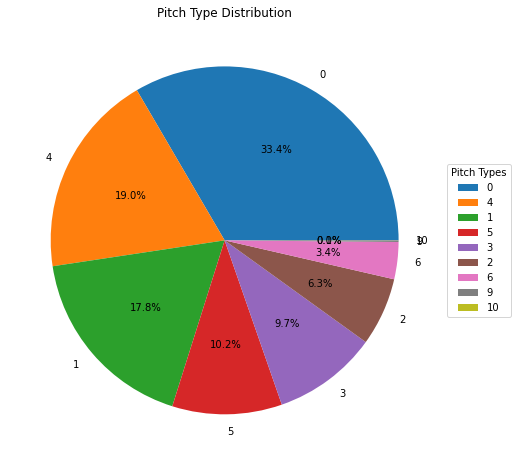

In [98]:
import matplotlib.pyplot as plt

# Map old pitch types to new mapping
rf_sorted['pitch_type_map'] = rf_sorted['pitch_type'].map(pitch_dict3)

# Count the pitch types
rf_pitch_counts = rf_sorted['pitch_type_map'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: set figure size
plt.pie(rf_pitch_counts, labels=rf_pitch_counts.index, autopct='%1.1f%%')

# Create a legend
plt.legend(patches, rf_pitch_counts.index, title="Pitch Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title('Pitch Type Distribution')

# Display the chart
plt.show()

In [99]:
rf_sorted_pitch_counts = rf_sorted['pitch_type_map'].value_counts()
print(rf_sorted_pitch_counts ,"\n=======")

pitch_type_map
0     4008
4     2274
1     2129
5     1223
3     1167
2      761
6      413
9       17
10       1
Name: count, dtype: int64 


In [100]:
# PO is pitchout when a pitcher will try to catch a runner, what if we remove any ab with PO
# Identify the pa_ids where 'PO' appears in the pitch_type column
rf_pa_ids_to_remove_po = rf_sorted[rf_sorted['pitch_type_map'] == 9]['pa_id'].unique()
rf_npa_ids_to_remove_po = rf_sorted[rf_sorted['pitch_type_map'] == 9]['pa_id'].nunique()
print(rf_pa_ids_to_remove_po)
print(rf_npa_ids_to_remove_po)

rf_pa_ids_to_remove_ep = rf_sorted[rf_sorted['pitch_type_map'] == 10]['pa_id'].unique()
rf_npa_ids_to_remove_ep = rf_sorted[rf_sorted['pitch_type_map'] == 20]['pa_id'].nunique()
print(rf_pa_ids_to_remove_ep)
print(rf_npa_ids_to_remove_ep)

# Remove all records of those pa_id from df_sorted
rf_sorted = rf_sorted[~rf_sorted['pa_id'].isin(rf_pa_ids_to_remove_po)].copy()
rf_sorted = rf_sorted[~rf_sorted['pa_id'].isin(rf_pa_ids_to_remove_ep)].copy()

# Reset index after removal
rf_sorted.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
rf_sorted.info()

['745564-70' '745410-77' '745410-76' '745410-75' '745410-74' '745410-73']
6
['746715-30']
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pa_id              11970 non-null  object        
 1   game_date          11970 non-null  datetime64[ns]
 2   pitch_type         11970 non-null  object        
 3   release_speed      11970 non-null  Float64       
 4   release_pos_x      11970 non-null  Float64       
 5   release_pos_y      11970 non-null  Float64       
 6   release_pos_z      11970 non-null  Float64       
 7   release_spin_rate  11970 non-null  Int64         
 8   spin_axis          11970 non-null  Int64         
 9   batter             11970 non-null  Int64         
 10  stand              11970 non-null  object        
 11  p_throws           11970 non-null  object        
 12  pitcher            11970

In [101]:
# Replace pitch_type with the mapped
rf_sorted['pitch_type'] = rf_sorted['pitch_type_map']
rf_sorted.drop('pitch_type_map', axis=1, inplace=True)

In [102]:
rf_sorted_pitch_counts = rf_sorted['pitch_type'].value_counts()
print(rf_sorted_pitch_counts ,"\n=======")

pitch_type
0    4006
4    2274
1    2129
5    1223
3    1167
2     761
6     410
Name: count, dtype: int64 


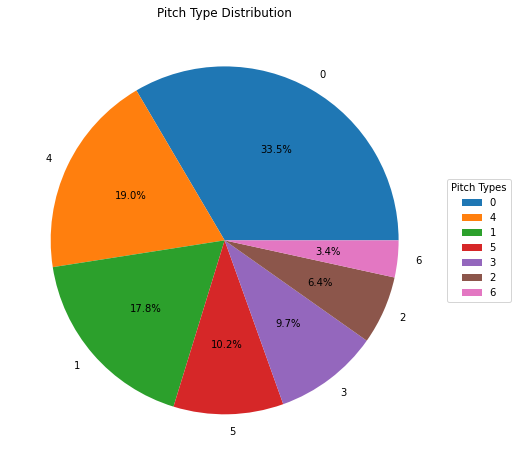

In [103]:
import matplotlib.pyplot as plt

# Count the pitch types
rf_pitch_counts = rf_sorted['pitch_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: set figure size
plt.pie(rf_pitch_counts, labels=rf_pitch_counts.index, autopct='%1.1f%%')

# Create a legend
plt.legend(patches, rf_pitch_counts.index, title="Pitch Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title('Pitch Type Distribution')

# Display the chart
plt.show()

In [104]:
rf_try1 = rf_sorted.iloc[::-1]
rf_try1.head()

,pa_id,game_date,pitch_type,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,spin_axis,batter,stand,p_throws,pitcher,events,type,balls,strikes,outs_when_up,zone,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score
11969,747224-1,2024-03-28,0,92.0,-3.22,54.13,5.9,2320,216,453568,L,R,668678,no events,S,0,0,0,13,-0.89,2.47,<NA>,<NA>,<NA>,1,Top,1,1,0,0
11968,747224-1,2024-03-28,5,85.6,-3.28,54.05,5.76,1611,239,453568,L,R,668678,no events,S,0,1,0,13,-0.15,0.72,<NA>,<NA>,<NA>,1,Top,1,2,0,0
11967,747224-1,2024-03-28,3,78.8,-3.06,54.14,5.83,2486,37,453568,L,R,668678,no events,B,0,2,0,14,1.73,-0.69,<NA>,<NA>,<NA>,1,Top,1,3,0,0
11966,747224-1,2024-03-28,0,91.1,-3.07,54.14,5.9,2216,216,453568,L,R,668678,no events,S,1,2,0,12,0.92,3.99,<NA>,<NA>,<NA>,1,Top,1,4,0,0
11965,747224-1,2024-03-28,5,85.3,-3.24,54.04,5.73,1647,227,453568,L,R,668678,no events,B,1,2,0,13,-0.17,0.86,<NA>,<NA>,<NA>,1,Top,1,5,0,0


In [105]:
# Fill NA in on_x and make player_id into 1 if on base.
rf_try1[['on_3b', 'on_2b', 'on_1b']] = rf_try1[['on_3b', 'on_2b', 'on_1b']].fillna(0)
rf_try1[['on_3b', 'on_2b', 'on_1b']] = np.where(rf_try1[['on_3b', 'on_2b', 'on_1b']] > 0, 1, rf_try1[['on_3b', 'on_2b', 'on_1b']])
rf_try1[['on_3b', 'on_2b', 'on_1b']] = rf_try1[['on_3b', 'on_2b', 'on_1b']].astype('int64')

pd.set_option('future.no_silent_downcasting', True)
rf_try1['stand'] = rf_try1['stand'].replace({'R': 1, 'L': 0}).infer_objects(copy=False)
rf_try1['p_throws'] = rf_try1['p_throws'].replace({'R': 1, 'L': 0}).infer_objects(copy=False)
rf_try1['type'] = rf_try1['type'].replace({'S': 1, 'B': 0, 'X': 2}).infer_objects(copy=False)
rf_try1['inning_topbot'] = rf_try1['inning_topbot'].replace({'Top': 0, 'Bot': 1}).infer_objects(copy=False)

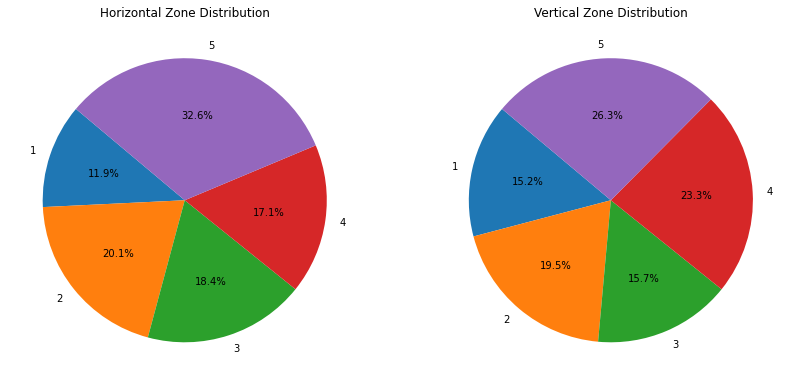

In [106]:
# Create the new columns based on the mappings
rf_try1['Horizontal Zone'] = rf_try1['zone'].map(horizontal_mapping)
rf_try1['Vertical Zone'] = rf_try1['zone'].map(vertical_mapping)

# Pie chart for Horizontal Zone
horizontal_counts = rf_try1['Horizontal Zone'].value_counts().sort_index()
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(horizontal_counts, labels=horizontal_counts.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Horizontal Zone Distribution')

# Pie chart for Vertical Zone
vertical_counts = rf_try1['Vertical Zone'].value_counts().sort_index()
ax[1].pie(vertical_counts, labels=vertical_counts.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Vertical Zone Distribution')

plt.show()

In [107]:
rf_try1.head()

,pa_id,game_date,pitch_type,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,spin_axis,batter,stand,p_throws,pitcher,events,type,balls,strikes,outs_when_up,zone,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score,Horizontal Zone,Vertical Zone
11969,747224-1,2024-03-28,0,92.0,-3.22,54.13,5.9,2320,216,453568,0,1,668678,no events,1,0,0,0,13,-0.89,2.47,0,0,0,1,0,1,1,0,0,5,4
11968,747224-1,2024-03-28,5,85.6,-3.28,54.05,5.76,1611,239,453568,0,1,668678,no events,1,0,1,0,13,-0.15,0.72,0,0,0,1,0,1,2,0,0,5,4
11967,747224-1,2024-03-28,3,78.8,-3.06,54.14,5.83,2486,37,453568,0,1,668678,no events,0,0,2,0,14,1.73,-0.69,0,0,0,1,0,1,3,0,0,5,5
11966,747224-1,2024-03-28,0,91.1,-3.07,54.14,5.9,2216,216,453568,0,1,668678,no events,1,1,2,0,12,0.92,3.99,0,0,0,1,0,1,4,0,0,4,5
11965,747224-1,2024-03-28,5,85.3,-3.24,54.04,5.73,1647,227,453568,0,1,668678,no events,0,1,2,0,13,-0.17,0.86,0,0,0,1,0,1,5,0,0,5,4


In [110]:
# Create a copy of df_sorted1
rf_epoop = rf_try1.iloc[::-1].copy()

# Create a column that identifies the last pitch in each at-bat
rf_epoop['is_last_pitch'] = rf_epoop['pitch_number'] == rf_epoop.groupby('pa_id')['pitch_number'].transform('max')

# Extract the events of the last pitch in each at-bat
last_at_bat_outcome = rf_epoop.loc[rf_epoop['is_last_pitch'], ['pa_id', 'events']].copy()

# Shift the events column to align with the next at-bat
last_at_bat_outcome['previous_at_bat_outcome'] = last_at_bat_outcome['events'].shift()

# Merge this with df_epoop
rf_epoop = pd.merge(rf_epoop, last_at_bat_outcome[['pa_id', 'previous_at_bat_outcome']], on='pa_id', how='left')

# Forward fill the 'previous_at_bat_outcome' so that it fills all rows of the current at-bat
rf_epoop['previous_at_bat_outcome'] = rf_epoop['previous_at_bat_outcome'].ffill()

# Drop the 'is_last_pitch' column as it's no longer needed
rf_epoop.drop(columns=['is_last_pitch'], inplace=True)

# Display the first few rows of the result to check
print(rf_epoop[['pa_id', 'pitch_number', 'events', 'previous_at_bat_outcome']].head())


       pa_id  pitch_number     events previous_at_bat_outcome
0  747182-72             6  strikeout                    None
1  747182-72             5  no events                    None
2  747182-72             4  no events                    None
3  747182-72             3  no events                    None
4  747182-72             2  no events                    None


In [111]:
rf_try2 = rf_epoop

rf_try2['prev_pitch_type'] = rf_try2['pitch_type'].shift(-1)
rf_try2['prev_type'] = rf_try2['type'].shift(-1)
rf_try2['prev_release_speed'] = rf_try2['release_speed'].shift(-1)
rf_try2['prev_Vzone'] = rf_try2['Vertical Zone'].shift(-1)
rf_try2['prev_Hzone'] = rf_try2['Horizontal Zone'].shift(-1)
rf_try2['prev_zone'] = rf_try2['zone'].shift(-1)

#================
rf_try2['prev_balls'] = rf_try2['balls'].shift(-1)
rf_try2['prev_strikes'] = rf_try2['strikes'].shift(-1)

rf_try2['prev_plate_x'] = rf_try2['plate_x'].shift(-1)
rf_try2['prev_plate_z'] = rf_try2['plate_z'].shift(-1)

rf_try2['prev_release_pos_x'] = rf_try2['release_pos_x'].shift(-1)
rf_try2['prev_release_pos_y'] = rf_try2['release_pos_y'].shift(-1)
rf_try2['prev_release_pos_z'] = rf_try2['release_pos_z'].shift(-1)
rf_try2['prev_release_spin_rate'] = rf_try2['release_spin_rate'].shift(-1)
rf_try2['prev_spin_axis'] = rf_try2['spin_axis'].shift(-1)

rf_try2['prev_events'] = rf_try2['events'].shift(-1)

#df_zone_sorted['prev_events'] = df_zone_sorted['events'].shift(-1)
#df_sorted_labelled.drop(['events'], axis=1, inplace=True)
#df_sorted_labelled = df_sorted_labelled.iloc[:-1, :]
rf_try2 = rf_try2.iloc[::-1]


rf_try2.head()

,pa_id,game_date,pitch_type,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,spin_axis,batter,stand,p_throws,pitcher,events,type,balls,strikes,outs_when_up,zone,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score,Horizontal Zone,Vertical Zone,previous_at_bat_outcome,prev_pitch_type,prev_type,prev_release_speed,prev_Vzone,prev_Hzone,prev_zone,prev_balls,prev_strikes,prev_plate_x,prev_plate_z,prev_release_pos_x,prev_release_pos_y,prev_release_pos_z,prev_release_spin_rate,prev_spin_axis,prev_events
11969,747224-1,2024-03-28,0,92.0,-3.22,54.13,5.9,2320,216,453568,0,1,668678,no events,1,0,0,0,13,-0.89,2.47,0,0,0,1,0,1,1,0,0,5,4,field_out,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None
11968,747224-1,2024-03-28,5,85.6,-3.28,54.05,5.76,1611,239,453568,0,1,668678,no events,1,0,1,0,13,-0.15,0.72,0,0,0,1,0,1,2,0,0,5,4,field_out,0.0,1.0,92.0,4.0,5.0,13,0,0,-0.89,2.47,-3.22,54.13,5.9,2320,216,no events
11967,747224-1,2024-03-28,3,78.8,-3.06,54.14,5.83,2486,37,453568,0,1,668678,no events,0,0,2,0,14,1.73,-0.69,0,0,0,1,0,1,3,0,0,5,5,field_out,5.0,1.0,85.6,4.0,5.0,13,0,1,-0.15,0.72,-3.28,54.05,5.76,1611,239,no events
11966,747224-1,2024-03-28,0,91.1,-3.07,54.14,5.9,2216,216,453568,0,1,668678,no events,1,1,2,0,12,0.92,3.99,0,0,0,1,0,1,4,0,0,4,5,field_out,3.0,0.0,78.8,5.0,5.0,14,0,2,1.73,-0.69,-3.06,54.14,5.83,2486,37,no events
11965,747224-1,2024-03-28,5,85.3,-3.24,54.04,5.73,1647,227,453568,0,1,668678,no events,0,1,2,0,13,-0.17,0.86,0,0,0,1,0,1,5,0,0,5,4,field_out,0.0,1.0,91.1,5.0,4.0,12,1,2,0.92,3.99,-3.07,54.14,5.9,2216,216,no events


In [112]:
# Get PA with at least 3 pitches
# rf_try2 = rf_try2[rf_try2.groupby('pa_id')['pa_id'].transform('size') >= 3].copy()

# Remove the first instance of each pa_id
rf_try2 = rf_try2[rf_try2.duplicated(subset=['pa_id'], keep='first')]

rf_try2.head()

,pa_id,game_date,pitch_type,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,spin_axis,batter,stand,p_throws,pitcher,events,type,balls,strikes,outs_when_up,zone,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score,Horizontal Zone,Vertical Zone,previous_at_bat_outcome,prev_pitch_type,prev_type,prev_release_speed,prev_Vzone,prev_Hzone,prev_zone,prev_balls,prev_strikes,prev_plate_x,prev_plate_z,prev_release_pos_x,prev_release_pos_y,prev_release_pos_z,prev_release_spin_rate,prev_spin_axis,prev_events
11968,747224-1,2024-03-28,5,85.6,-3.28,54.05,5.76,1611,239,453568,0,1,668678,no events,1,0,1,0,13,-0.15,0.72,0,0,0,1,0,1,2,0,0,5,4,field_out,0.0,1.0,92.0,4.0,5.0,13,0,0,-0.89,2.47,-3.22,54.13,5.9,2320,216,no events
11967,747224-1,2024-03-28,3,78.8,-3.06,54.14,5.83,2486,37,453568,0,1,668678,no events,0,0,2,0,14,1.73,-0.69,0,0,0,1,0,1,3,0,0,5,5,field_out,5.0,1.0,85.6,4.0,5.0,13,0,1,-0.15,0.72,-3.28,54.05,5.76,1611,239,no events
11966,747224-1,2024-03-28,0,91.1,-3.07,54.14,5.9,2216,216,453568,0,1,668678,no events,1,1,2,0,12,0.92,3.99,0,0,0,1,0,1,4,0,0,4,5,field_out,3.0,0.0,78.8,5.0,5.0,14,0,2,1.73,-0.69,-3.06,54.14,5.83,2486,37,no events
11965,747224-1,2024-03-28,5,85.3,-3.24,54.04,5.73,1647,227,453568,0,1,668678,no events,0,1,2,0,13,-0.17,0.86,0,0,0,1,0,1,5,0,0,5,4,field_out,0.0,1.0,91.1,5.0,4.0,12,1,2,0.92,3.99,-3.07,54.14,5.9,2216,216,no events
11964,747224-1,2024-03-28,0,92.8,-3.21,54.17,5.83,2271,211,453568,0,1,668678,no events,0,2,2,0,11,-1.16,2.67,0,0,0,1,0,1,6,0,0,4,4,field_out,5.0,0.0,85.3,4.0,5.0,13,1,2,-0.17,0.86,-3.24,54.04,5.73,1647,227,no events


In [113]:
rf_prep = rf_try2.drop(['release_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'release_spin_rate', 'spin_axis', 'events', 'type', 'plate_x', 'plate_z'], axis = 1)

In [114]:
rf_prep['previous_at_bat_outcome'] = lb_event_lab.transform(rf_prep['previous_at_bat_outcome'])
rf_prep['prev_events'] = lb_pevent.transform(rf_prep['prev_events'])

In [115]:
rf_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8802 entries, 11968 to 0
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   pa_id                    8802 non-null   object        
 1   game_date                8802 non-null   datetime64[ns]
 2   pitch_type               8802 non-null   int64         
 3   batter                   8802 non-null   Int64         
 4   stand                    8802 non-null   int64         
 5   p_throws                 8802 non-null   int64         
 6   pitcher                  8802 non-null   Int64         
 7   balls                    8802 non-null   Int64         
 8   strikes                  8802 non-null   Int64         
 9   outs_when_up             8802 non-null   Int64         
 10  zone                     8802 non-null   Int64         
 11  on_3b                    8802 non-null   int64         
 12  on_2b                    8802 non-null

In [116]:
rf_klin2 = rf_prep

In [117]:
import time
import pandas as pd

# Start the timer
start_time = time.time()

# Sort the DataFrame by pa_id, pitcher, at_bat_number, inning, and outs_when_up
rf_klin2 = rf_klin2.sort_values(by=['pa_id', 'pitcher', 'at_bat_number', 'inning', 'outs_when_up']).reset_index(drop=True)

# One-hot encode the categorical variables
rf_one_hot_encoded_pitch_type = pd.get_dummies(rf_klin2['pitch_type'], prefix='pitch_type')
rf_one_hot_encoded_H_zone = pd.get_dummies(rf_klin2['Horizontal Zone'], prefix='H_zone')
rf_one_hot_encoded_V_zone = pd.get_dummies(rf_klin2['Vertical Zone'], prefix='V_zone')

# Add the one-hot encoded columns to the original DataFrame
rf_klin2 = pd.concat([rf_klin2, rf_one_hot_encoded_pitch_type, rf_one_hot_encoded_H_zone, rf_one_hot_encoded_V_zone], axis=1)

# Function to calculate rolling proportions for one-hot encoded columns
def calculate_rolling_proportion(group, window_size, category_cols):
    return group[category_cols].rolling(window=window_size, min_periods=1).mean()

# Apply the function to create new columns for different window sizes and categorical variables
for category in ['pitch_type', 'H_zone', 'V_zone']:
    category_cols = [col for col in rf_klin2.columns if col.startswith(category)]
    for window_size in [5, 10]:
        rolling_proportion_rf = rf_klin2.groupby(['pa_id', 'pitcher']).apply(
            lambda x: calculate_rolling_proportion(x, window_size, category_cols)
        ).reset_index(level=[0, 1], drop=True)
        
        # Rename the columns to reflect the window size
        rolling_proportion_rf.columns = [f'prev_{window_size}_' + col + '_tendency' for col in rolling_proportion_rf.columns]
        
        # Merge the rolling proportion dataframe back to the original dataframe
        rf_klin2 = pd.concat([rf_klin2, rolling_proportion_rf], axis=1)

# End the timer
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time
print(f"Time taken: {time_taken:.2f} seconds")

pd.options.display.max_columns = None
rf_klin2.head(10)

/tmp/ipykernel_206006/1985758285.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_proportion_rf = rf_klin2.groupby(['pa_id', 'pitcher']).apply(
/tmp/ipykernel_206006/1985758285.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_proportion_rf = rf_klin2.groupby(['pa_id', 'pitcher']).apply(
/tmp/ipykernel_206006/1985758285.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the

Time taken: 17.25 seconds


/tmp/ipykernel_206006/1985758285.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_proportion_rf = rf_klin2.groupby(['pa_id', 'pitcher']).apply(


,pa_id,game_date,pitch_type,batter,stand,p_throws,pitcher,balls,strikes,outs_when_up,zone,on_3b,on_2b,on_1b,inning,inning_topbot,at_bat_number,pitch_number,fld_score,bat_score,Horizontal Zone,Vertical Zone,previous_at_bat_outcome,prev_pitch_type,prev_type,prev_release_speed,prev_Vzone,prev_Hzone,prev_zone,prev_balls,prev_strikes,prev_plate_x,prev_plate_z,prev_release_pos_x,prev_release_pos_y,prev_release_pos_z,prev_release_spin_rate,prev_spin_axis,prev_events,pitch_type_0,pitch_type_1,pitch_type_2,pitch_type_3,pitch_type_4,pitch_type_5,pitch_type_6,H_zone_1,H_zone_2,H_zone_3,H_zone_4,H_zone_5,V_zone_1,V_zone_2,V_zone_3,V_zone_4,V_zone_5,prev_5_pitch_type_tendency,prev_5_pitch_type_0_tendency,prev_5_pitch_type_1_tendency,prev_5_pitch_type_2_tendency,prev_5_pitch_type_3_tendency,prev_5_pitch_type_4_tendency,prev_5_pitch_type_5_tendency,prev_5_pitch_type_6_tendency,prev_10_pitch_type_tendency,prev_10_pitch_type_0_tendency,prev_10_pitch_type_1_tendency,prev_10_pitch_type_2_tendency,prev_10_pitch_type_3_tendency,prev_10_pitch_type_4_tendency,prev_10_pitch_type_5_tendency,prev_10_pitch_type_6_tendency,prev_5_H_zone_1_tendency,prev_5_H_zone_2_tendency,prev_5_H_zone_3_tendency,prev_5_H_zone_4_tendency,prev_5_H_zone_5_tendency,prev_10_H_zone_1_tendency,prev_10_H_zone_2_tendency,prev_10_H_zone_3_tendency,prev_10_H_zone_4_tendency,prev_10_H_zone_5_tendency,prev_5_V_zone_1_tendency,prev_5_V_zone_2_tendency,prev_5_V_zone_3_tendency,prev_5_V_zone_4_tendency,prev_5_V_zone_5_tendency,prev_10_V_zone_1_tendency,prev_10_V_zone_2_tendency,prev_10_V_zone_3_tendency,prev_10_V_zone_4_tendency,prev_10_V_zone_5_tendency
0,744841-13,2024-06-20,3,660688,0,1,669194,0,1,0,12,0,0,0,2,1,13,2,0,0,4,5,7,0.0,1.0,93.1,2.0,2.0,5,0,0,0.0,2.25,-1.79,53.74,6.21,2164,206,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,3.0,0.00,0.0,0.000000,1.0,0.0,0.000000,0.0,3.0,0.00,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,1.000000,0.000000,0.0,0.00,0.0,1.000000,0.000000,0.0,0.00,0.0,0.000000,1.000000,0.0,0.00,0.0,0.000000,1.000000
1,744841-13,2024-06-20,5,660688,0,1,669194,1,1,0,11,0,0,0,2,1,13,3,0,0,4,4,7,3.0,0.0,76.8,5.0,4.0,12,0,1,0.02,3.36,-1.78,54.0,6.3,2482,47,0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,4.0,0.00,0.0,0.000000,0.5,0.0,0.500000,0.0,4.0,0.00,0.0,0.000000,0.5,0.0,0.500000,0.0,0.0,0.00,0.0,1.000000,0.000000,0.0,0.00,0.0,1.000000,0.000000,0.0,0.00,0.0,0.500000,0.500000,0.0,0.00,0.0,0.500000,0.500000
2,744841-14,2024-06-20,0,671277,0,1,669194,0,1,1,12,0,0,0,2,1,14,2,0,0,4,5,21,0.0,1.0,92.9,2.0,2.0,5,0,0,0.0,2.65,-1.45,53.74,6.21,2167,199,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,0.0,1.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,1.000000,0.000000,0.0,0.00,0.0,1.000000,0.000000,0.0,0.00,0.0,0.000000,1.000000,0.0,0.00,0.0,0.000000,1.000000
3,744841-14,2024-06-20,3,671277,0,1,669194,0,2,1,8,0,0,0,2,1,14,3,0,0,3,2,21,0.0,1.0,93.7,5.0,4.0,12,0,1,0.25,3.99,-1.63,53.74,6.2,2153,203,0,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,1.5,0.50,0.0,0.000000,0.5,0.0,0.000000,0.0,1.5,0.50,0.0,0.000000,0.5,0.0,0.000000,0.0,0.0,0.00,0.5,0.500000,0.000000,0.0,0.00,0.5,0.500000,0.000000,0.0,0.50,0.0,0.000000,0.500000,0.0,0.50,0.0,0.000000,0.500000
4,744841-15,2024-06-20,0,608841,1,1,669194,1,0,2,4,0,0,0,2,1,15,2,0,0,2,1,7,0.0,0.0,94.0,4.0,5.0,13,0,0,-0.3,1.61,-1.47,53.6,6.16,2083,204,0,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0.0,1.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.00,0.0,0.000000,0.000000,0.0,1.00,0.0,0.000000,0.000000,1.0,0.00,0.0,0.000000,0.000000,1.0,0.00,0.0,0.000000,0.000000
5,744841-16,2024-06-20,5,545121,0,1,669194,0,1,2,13,0,0,1,2,1,16,2,0,0,5,4,7,3.0,1.0,77.8,3.0,1.0,3,0,0,0.37,3.15,-1.74,54.01,

In [118]:
rf_klin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8802 entries, 0 to 8801
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   pa_id                          8802 non-null   object        
 1   game_date                      8802 non-null   datetime64[ns]
 2   pitch_type                     8802 non-null   int64         
 3   batter                         8802 non-null   Int64         
 4   stand                          8802 non-null   int64         
 5   p_throws                       8802 non-null   int64         
 6   pitcher                        8802 non-null   Int64         
 7   balls                          8802 non-null   Int64         
 8   strikes                        8802 non-null   Int64         
 9   outs_when_up                   8802 non-null   Int64         
 10  zone                           8802 non-null   Int64         
 11  on_3b            

In [119]:
#rf_prep2 = rf_klin2.drop(['H_zone_1', 'H_zone_2', 'H_zone_3', 'H_zone_4', 'H_zone_5', 'V_zone_1', 'V_zone_2', 'V_zone_3', 'V_zone_4', 'V_zone_5','pitch_type_0', 'pitch_type_1', 'pitch_type_2', 'pitch_type_3', 'pitch_type_4', 'pitch_type_5', 'pitch_type_6', 'pa_id', 'game_date'], axis=1)
rf_prep2 = rf_klin2.drop(['H_zone_1', 'H_zone_2', 'H_zone_3', 'H_zone_4', 'H_zone_5', 'V_zone_1', 'V_zone_2', 'V_zone_3', 'V_zone_4', 'V_zone_5','pitch_type_0', 'pitch_type_1', 'pitch_type_2', 'pitch_type_3', 'pitch_type_4', 'pitch_type_5', 'pitch_type_6', 'pa_id', 'game_date'], axis=1)
rf_prep2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8802 entries, 0 to 8801
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pitch_type                     8802 non-null   int64  
 1   batter                         8802 non-null   Int64  
 2   stand                          8802 non-null   int64  
 3   p_throws                       8802 non-null   int64  
 4   pitcher                        8802 non-null   Int64  
 5   balls                          8802 non-null   Int64  
 6   strikes                        8802 non-null   Int64  
 7   outs_when_up                   8802 non-null   Int64  
 8   zone                           8802 non-null   Int64  
 9   on_3b                          8802 non-null   int64  
 10  on_2b                          8802 non-null   int64  
 11  on_1b                          8802 non-null   int64  
 12  inning                         8802 non-null   I

In [120]:
rf_prep3 = rf_prep2.drop('zone', axis=1)

label_encoder_pevent = LabelEncoder()
rf_prep3['prev_events'] = label_encoder_pevent.fit_transform(rf_prep3['prev_events'])

In [121]:
import pandas as pd

# Assuming valid_set_final is your DataFrame with 1,000,000 rows
random_rows_rf = rf_prep3.sample(n=5000, random_state=42)  # Select 20 random rows

# If you want to reset the index of the selected rows to start from 0
random_rows_rf.reset_index(drop=True, inplace=True)


In [122]:
# Prepare data
sample = random_rows_rf.drop(['pitch_type','Horizontal Zone','Vertical Zone'], axis=1)

In [123]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# True labels
true_labels_pitch_type = random_rows_rf['pitch_type']
true_labels_Vzone = random_rows_rf['Vertical Zone']
true_labels_Hzone = random_rows_rf['Horizontal Zone']

# Predict
predicted_pitch_type = pipeline_prf601.predict(sample)
predicted_Vzone = pipeline_vzrf701.predict(sample)
predicted_Hzone = pipeline_hzrf701.predict(sample)

# Evaluate Accuracy
accuracy_pitch_type = accuracy_score(true_labels_pitch_type, predicted_pitch_type)
accuracy_Vzone = accuracy_score(true_labels_Vzone, predicted_Vzone)
accuracy_Hzone = accuracy_score(true_labels_Hzone, predicted_Hzone)

# Print accuracy
print(f'Accuracy for pitch type prediction: {accuracy_pitch_type:.2f}')
print(f'Accuracy for vertical zone prediction: {accuracy_Vzone:.2f}')
print(f'Accuracy for horizontal zone prediction: {accuracy_Hzone:.2f}')

# Print classification reports
print("Classification report for pitch type:") 
print(classification_report(true_labels_pitch_type, predicted_pitch_type))

print("Classification report for vertical zone:")
print(classification_report(true_labels_Vzone, predicted_Vzone))

print("Classification report for horizontal zone:")
print(classification_report(true_labels_Hzone, predicted_Hzone))


Accuracy for pitch type prediction: 0.86
Accuracy for vertical zone prediction: 0.84
Accuracy for horizontal zone prediction: 0.84
Classification report for pitch type:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1621
           1       0.91      0.84      0.87       807
           2       0.87      0.81      0.84       305
           3       0.91      0.79      0.84       473
           4       0.85      0.86      0.86       989
           5       0.81      0.86      0.83       611
           6       0.85      0.81      0.83       194

    accuracy                           0.86      5000
   macro avg       0.86      0.84      0.85      5000
weighted avg       0.86      0.86      0.86      5000

Classification report for vertical zone:
              precision    recall  f1-score   support

           1       0.81      0.82      0.82       735
           2       0.81      0.84      0.82       946
           3       0.82      0

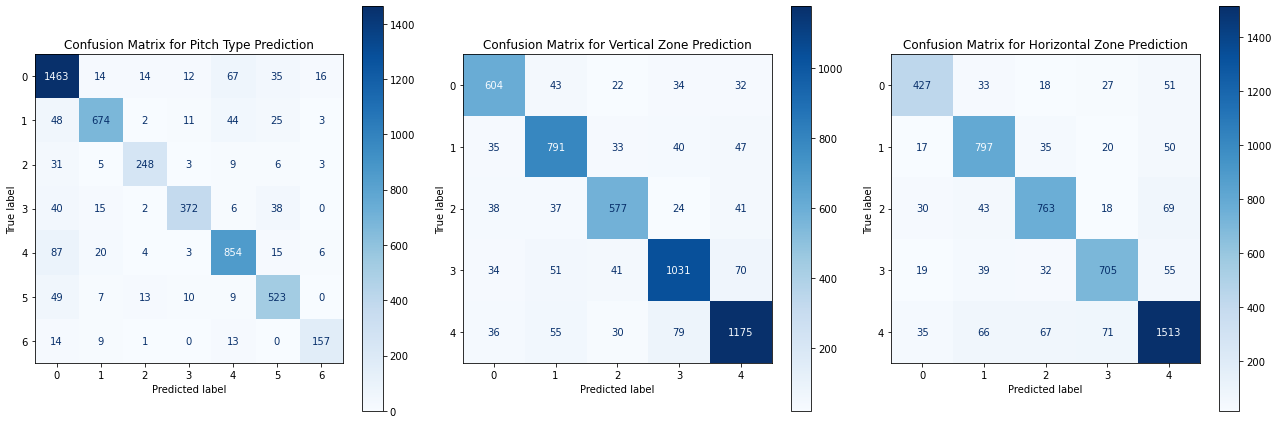

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set up a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix for pitch type prediction
conf_matrix_pitch_type = confusion_matrix(true_labels_pitch_type, predicted_pitch_type)
ConfusionMatrixDisplay(conf_matrix_pitch_type).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix for Pitch Type Prediction')

# Confusion Matrix for vertical zone prediction
conf_matrix_Vzone = confusion_matrix(true_labels_Vzone, predicted_Vzone)
ConfusionMatrixDisplay(conf_matrix_Vzone).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix for Vertical Zone Prediction')

# Confusion Matrix for horizontal zone prediction
conf_matrix_Hzone = confusion_matrix(true_labels_Hzone, predicted_Hzone)
ConfusionMatrixDisplay(conf_matrix_Hzone).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('Confusion Matrix for Horizontal Zone Prediction')

# Adjust layout so titles and labels don't overlap
plt.tight_layout()
plt.show()

# Ensembled Model

In [303]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# True labels
true_labels_pitch_type = random_rows_rf['pitch_type']
true_labels_Vzone = random_rows_rf['Vertical Zone']
true_labels_Hzone = random_rows_rf['Horizontal Zone']

# Predict
predicted_pitch_type = stacking_model2_1.predict(sample)
predicted_Vzone = voting_classifier3.predict(sample)
predicted_Hzone = voting_classifier2.predict(sample)

# Evaluate Accuracy
accuracy_pitch_type = accuracy_score(true_labels_pitch_type, predicted_pitch_type)
accuracy_Vzone = accuracy_score(true_labels_Vzone, predicted_Vzone)
accuracy_Hzone = accuracy_score(true_labels_Hzone, predicted_Hzone)

# Print accuracy
print(f'Accuracy for pitch type prediction: {accuracy_pitch_type:.2f}')
print(f'Accuracy for vertical zone prediction: {accuracy_Vzone:.2f}')
print(f'Accuracy for horizontal zone prediction: {accuracy_Hzone:.2f}')

# Print classification reports
print("Classification report for Ensembled pitch type:") 
print(classification_report(true_labels_pitch_type, predicted_pitch_type))

print("Classification report for Ensembled vertical zone:")
print(classification_report(true_labels_Vzone, predicted_Vzone))

print("Classification report for Ensembled horizontal zone:")
print(classification_report(true_labels_Hzone, predicted_Hzone))


Accuracy for pitch type prediction: 0.87
Accuracy for vertical zone prediction: 0.84
Accuracy for horizontal zone prediction: 0.85
Classification report for Ensembled pitch type:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1621
           1       0.92      0.83      0.87       807
           2       0.86      0.86      0.86       305
           3       0.85      0.83      0.84       473
           4       0.86      0.88      0.87       989
           5       0.82      0.88      0.85       611
           6       0.89      0.82      0.86       194

    accuracy                           0.87      5000
   macro avg       0.87      0.86      0.86      5000
weighted avg       0.87      0.87      0.87      5000

Classification report for Ensembled vertical zone:
              precision    recall  f1-score   support

           1       0.82      0.83      0.83       735
           2       0.82      0.84      0.83       946
          

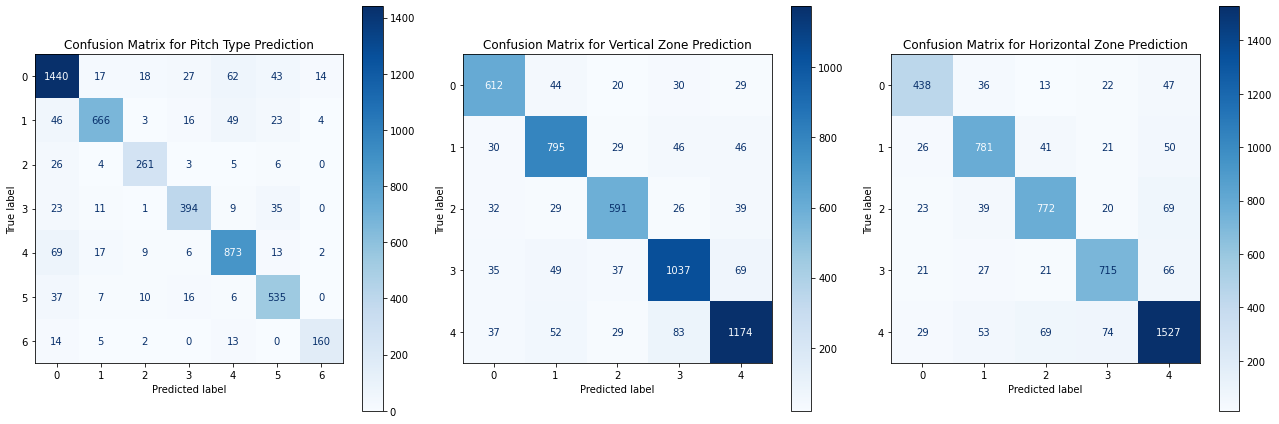

In [304]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set up a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix for pitch type prediction
conf_matrix_pitch_type = confusion_matrix(true_labels_pitch_type, predicted_pitch_type)
ConfusionMatrixDisplay(conf_matrix_pitch_type).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix for Pitch Type Prediction')

# Confusion Matrix for vertical zone prediction
conf_matrix_Vzone = confusion_matrix(true_labels_Vzone, predicted_Vzone)
ConfusionMatrixDisplay(conf_matrix_Vzone).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix for Vertical Zone Prediction')

# Confusion Matrix for horizontal zone prediction
conf_matrix_Hzone = confusion_matrix(true_labels_Hzone, predicted_Hzone)
ConfusionMatrixDisplay(conf_matrix_Hzone).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('Confusion Matrix for Horizontal Zone Prediction')

# Adjust layout so titles and labels don't overlap
plt.tight_layout()
plt.show()